# 앙상블(Ensemble)

- 머신러닝 앙상블이란 여러개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법

 여러모델을 이용하여 데이터를 학습하고 모든 모델의 예측결과를 평균하여 예측

 **앙상블 기법의 종류**

 - 보팅(voting): 투표를 통해 결과 도출

 - 배깅(Bagging): 샘플 중복 생성을 통해 결과 도출

 - 부스팅(Boosting): 이전 오차를 보완하면서 가중치 부여


 - 스태킹(stacking): 여러 모델을 기반으로 예측된 결과를 통해 meta 모델이 다시 한번예측

 

In [3]:
# 표 형태 데이터(DataFrame)를 다루기 위한 라이브러리
import pandas as pd
# 숫자 계산을 위한 라이브러리
import numpy as np
# 주피터에서 이미지 출력용 (여기서는 아직 사용 안 함)
from IPython.display import Image

# 넘파이 숫자 출력 시 과학적 표기법(e+00) 사용하지 않도록 설정
np.set_printoptions(suppress=True)

In [4]:
# OpenML에서 데이터셋을 가져오기 위한 함수
from sklearn.datasets import fetch_openml

# 보스턴 집값 데이터셋 불러오기
# as_frame=True → pandas DataFrame 형태로 받기
data=fetch_openml(name="boston",version=1,as_frame=True)

## 컬럼 소개
### 속성 수 : 13
CRIM: 범죄율

ZN: 25,000 평방 피트 당 주거용 토지의 비율

INDUS: 비소매(non-retail) 비즈니스 면적 비율

CHAS: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)

NOX: 산화 질소 농도 (천만 분의 1)

RM:주거 당 평균 객실 수

AGE: 1940 년 이전에 건축된 자가 소유 점유 비율

DIS: 5 개의 보스턴 고용 센터까지의 가중 거리

RAD: 고속도로 접근성 지수

TAX: 10,000 달러 당 전체 가치 재산 세율

PTRATIO 도시 별 학생-교사 비율

B: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.

LSTAT: 인구의 낮은 지위

MEDV: 자가 주택의 중앙값 (1,000 달러 단위)

In [5]:
# 입력 데이터(X)를 DataFrame으로 변환
# data['data'] → 입력 변수들
# data['feature_names'] → 컬럼 이름들
df=pd.DataFrame(data['data'],columns=data['feature_names'])

# 정답 값(집값 MEDV)을 새로운 컬럼으로 추가
df['MEDV']=data['target']

# 데이터가 잘 만들어졌는지 위에서 5줄 확인
df.head()

CRIM    ZN  INDUS CHAS    NOX  ...    TAX  PTRATIO       B LSTAT  MEDV
0  0.00632  18.0   2.31    0  0.538  ...  296.0     15.3  396.90  4.98  24.0
1  0.02731   0.0   7.07    0  0.469  ...  242.0     17.8  396.90  9.14  21.6
2  0.02729   0.0   7.07    0  0.469  ...  242.0     17.8  392.83  4.03  34.7
3  0.03237   0.0   2.18    0  0.458  ...  222.0     18.7  394.63  2.94  33.4
4  0.06905   0.0   2.18    0  0.458  ...  222.0     18.7  396.90  5.33  36.2

[5 rows x 14 columns]

### train/test 데이터를 분활한다

In [6]:
# 데이터 분할 함수 불러오기
from sklearn.model_selection import train_test_split


# -----------------------------------------
# 입력 데이터(X)와 정답(y)을
# 학습용(train)과 테스트용(test)으로 나누기
# -----------------------------------------
x_train,x_test,y_train,y_test=train_test_split(df.drop("MEDV",axis=1),  # 입력 데이터(X): 집값(MEDV) 컬럼 제거
                                               df['MEDV'], # 정답(y): 집값
                                               random_state=42)# 항상 같은 방식으로 섞이도록 고정


In [7]:
# 학습용 / 테스트용 데이터 크기 확인
x_train.shape,x_test.shape

((379, 13), (127, 13))

In [8]:
# 학습용 입력 데이터 상위 5개 확인
x_train.head()

CRIM    ZN  INDUS CHAS     NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
182  0.09103   0.0   2.46    0  0.4880  ...    3  193.0     17.8  394.12   4.82
155  3.53501   0.0  19.58    1  0.8710  ...    5  403.0     14.7   88.01  15.02
280  0.03578  20.0   3.33    0  0.4429  ...    5  216.0     14.9  387.31   3.76
126  0.38735   0.0  25.65    0  0.5810  ...    2  188.0     19.1  359.29  27.26
329  0.06724   0.0   3.24    0  0.4600  ...    4  430.0     16.9  375.21   7.34

[5 rows x 13 columns]

In [9]:
# 학습용 정답(집값) 상위 5개 확인
y_train.head()

182    37.9
155    15.6
280    45.4
126    15.7
329    22.6
Name: MEDV, dtype: float64

### sklearn 평가지표 만들기


**모델별 성능 확인을 위한 함수**

In [10]:
import matplotlib.pyplot as plt   # 그래프 그리기
from sklearn.metrics import mean_squared_error # MSE 계산 (여기서는 아직 사용 안 함)
import seaborn as sns   # 그래프를 예쁘게 만드는 라이브러리

# 여러 모델의 예측 결과를 저장할 딕셔너리
my_predictions={}


# 여러 그래프에서 사용할 색상 리스트 (확장용)
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
]


# -----------------------------------------
# 예측값과 실제값을 비교해서 시각화하는 함수
# -----------------------------------------
def plot_predictions(name_,pred,actual):

     # 예측값과 실제값을 하나의 DataFrame으로 생성
    df=pd.DataFrame({'prediction':pred,
                     'actual':y_test})# 실제로는 actual을 쓰는 게 더 깔끔함
    
     # 실제값 기준으로 정렬 (그래프를 보기 좋게)
    df=df.sort_values(by='actual').reset_index(drop=True)

    # 그래프 크기 설정
    plt.figure(figsize=(12,9))
    # 예측값 산점도 (빨간 X)
    plt.scatter(df.index,df['prediction'],marker='x',color='r')
    # 실제값 산점도 (검정 동그라미)
    plt.scatter(df.index,df['actual'],alpha=0.7,marker='o',color='black')
    # 그래프 제목
    plt.title(name_,fontsize=15)
    # 범례 표시
    plt.legend(['prediction','actual'],fontsize=12)
     # 그래프 출력
    plt.show()

def mse_eval(name_,pred,actual):
    global my_predictions # 모델별 MSE 저장 딕셔너리
    global colors # 막대그래프 색상 리스트

    # 1️⃣ 예측값 vs 실제값 시각화
    plot_predictions(name_,pred,actual)
    
    # 2️⃣ 평균제곱오차(MSE) 계산
    mse=mean_squared_error(pred,actual)

    # 3️⃣ 모델 이름을 키로 MSE 저장
    my_predictions[name_]=mse

    # 4️⃣ MSE 기준으로 내림차순 정렬
    y_value=sorted(my_predictions.items(),key=lambda x:x[1],reverse=True)


    # 5️⃣ 표(DataFrame)로 변환
    df=pd.DataFrame(y_value,columns=['model','mse'])
    print(df)
    
    # 6️⃣ 그래프 여백 계산
    min_=df['mse'].min()-10

    max_=df['mse'].max()+10

    # 7️⃣ 모델 수에 따라 그래프 크기 조절
    length=len(df)

    plt.figure(figsize=(10,length))

    ax=plt.subplot()

     # y축 위치 및 라벨 설정
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'],fontsize=15)

    # 가로 막대그래프 생성
    bars=ax.barh(np.arange(len(df)),df['mse'])


    # 8️⃣ 막대 색상과 수치 표시
    for i ,v in enumerate(df['mse']):
        idx=np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v+2,i,str(round(v,3)),color='k',fontsize=15,fontweight='bold')

    # 9️⃣ 제목 및 범위 설정
    plt.title('MSE Error',fontsize=18)
    plt.xlim(min_,max_)

    # 10️⃣ 그래프 출력
    plt.show()

def remove_model(name_):
    global my_predictions  # 모델별 MSE 저장 딕셔너리 사용
    try:
        # 모델 이름(key)이 있으면 삭제
        del my_predictions[name_]
    except KeyError:
         # 없는 모델 이름이면 False 반환
        return False
    # 정상적으로 삭제되면 True 반환
    return True

def plot_coef(columns,coef):
    # 피처 이름과 계수를 하나의 표로 묶기
    coef_df=pd.DataFrame(list(zip(columns,coef)))
    # 컬럼 이름 지정
    coef_df.columns=['feature','coef']
     # 계수 크기 기준으로 내림차순 정렬
    coef_df=coef_df.sort_values('coef',ascending=False).reset_index(drop=True)

     # 그래프 생성
    fig,ax=plt.subplots(figsize=(9,7))
    # 가로 막대그래프 (계수 크기)
    ax.barh(np.arange(len(coef_df)),coef_df['coef'])
     # y축 위치 지정
    idx=np.arange(len(coef_df))
    ax.set_yticks(idx)
    # y축 라벨을 피처 이름으로 설정
    ax.set_yticklabels(coef_df['feature'])
     # 여백 자동 조절
    fig.tight_layout()
     # 그래프 출력
    plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [12]:
# -----------------------------------------
# 데이터 타입을 float으로 통일
# (모델 학습 안정성을 위해)
# -----------------------------------------

x_train=x_train.astype(float)
x_test=x_test.astype(float)

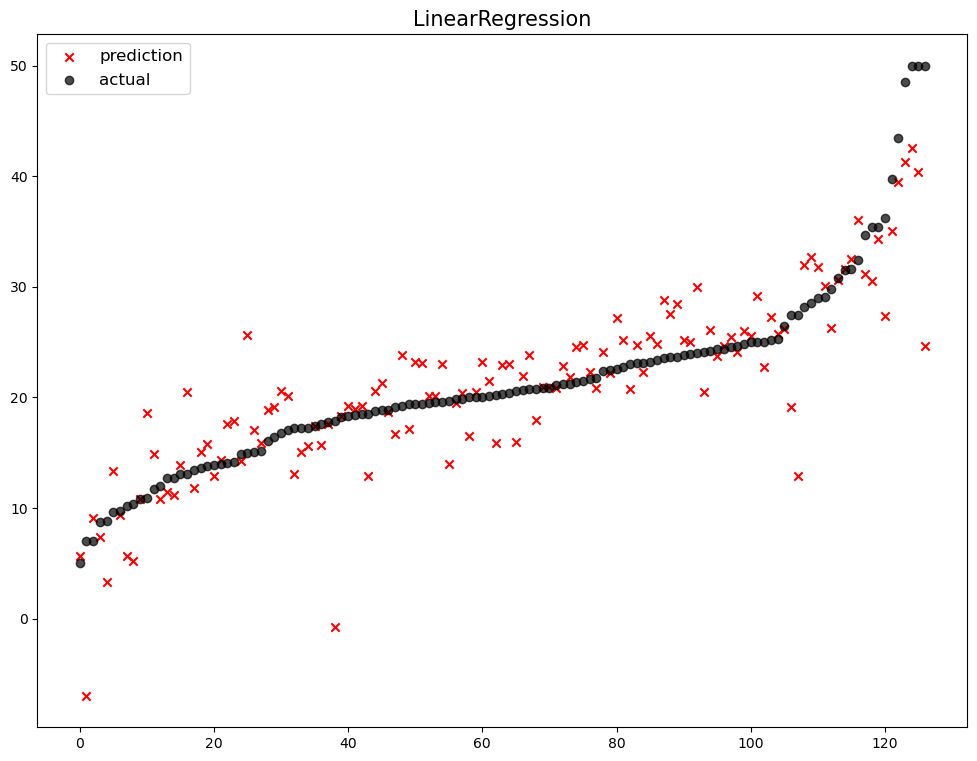

              model        mse
0  LinearRegression  22.098695


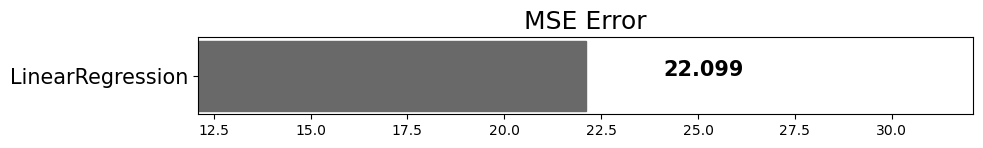

In [13]:
# -----------------------------------------
# 1️⃣ 선형 회귀 모델
# -----------------------------------------

# 선형 회귀 모델 생성
# n_jobs=-1 → CPU 코어 전부 사용
linear_reg=LinearRegression(n_jobs=-1)

# 학습 (공부)
linear_reg.fit(x_train,y_train)

# 테스트 데이터로 예측
pred=linear_reg.predict(x_test)

# 예측 결과 평가 (그래프 + MSE)
mse_eval('LinearRegression',pred,y_test)

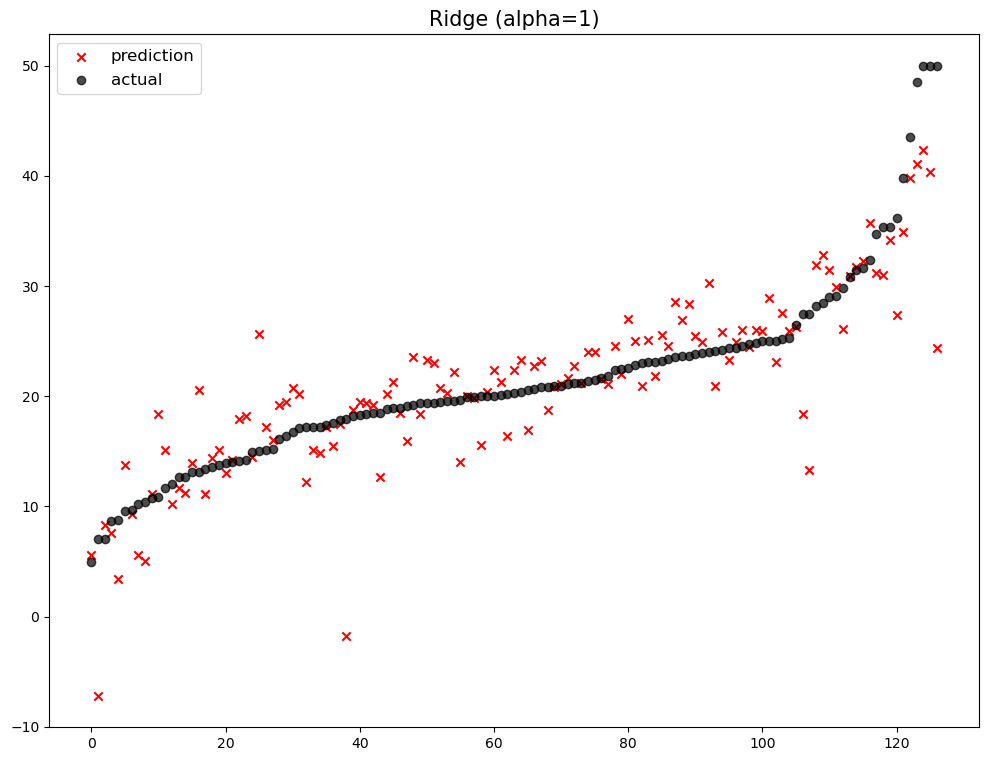

              model        mse
0   Ridge (alpha=1)  22.480476
1  LinearRegression  22.098695


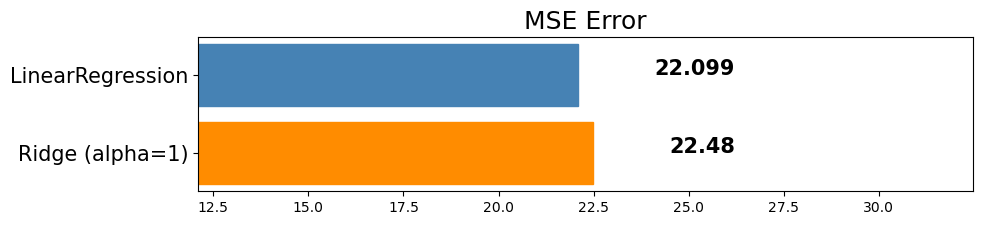

In [14]:
# -----------------------------------------
# 2️⃣ Ridge 회귀 모델
# -----------------------------------------


# Ridge 모델 생성
# alpha → 규제 강도 (1은 기본값 느낌)
ridge=Ridge(alpha=1)

# 학습
ridge.fit(x_train,y_train)

# 예측
pred=ridge.predict(x_test)

# 평가
mse_eval('Ridge (alpha=1)',pred,y_test)

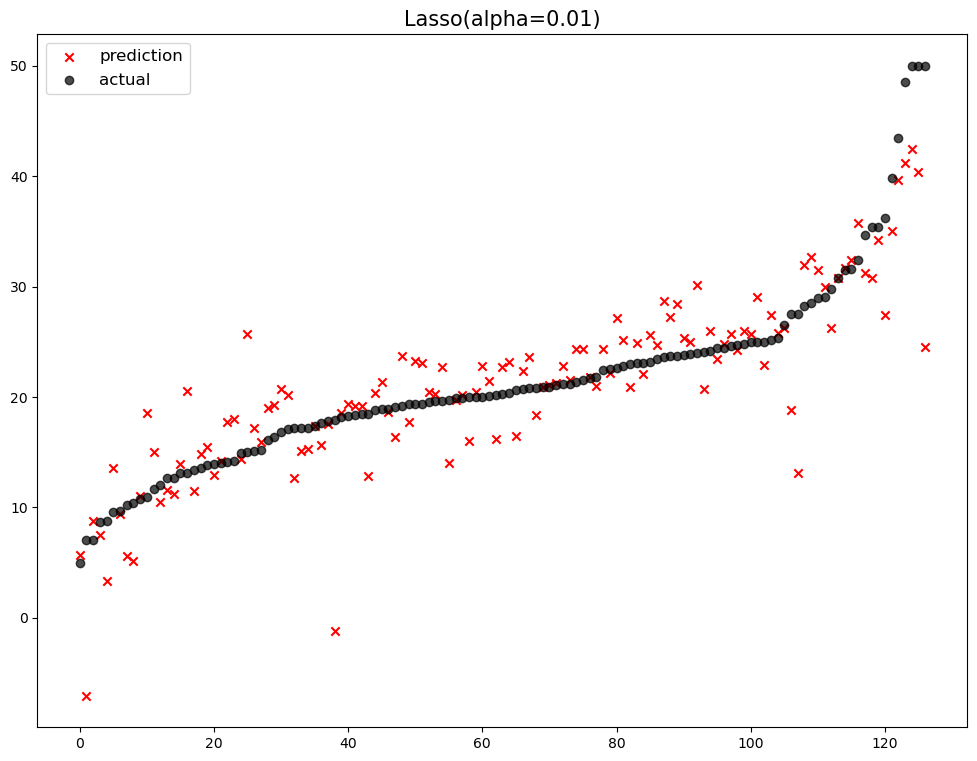

               model        mse
0    Ridge (alpha=1)  22.480476
1  Lasso(alpha=0.01)  22.210557
2   LinearRegression  22.098695


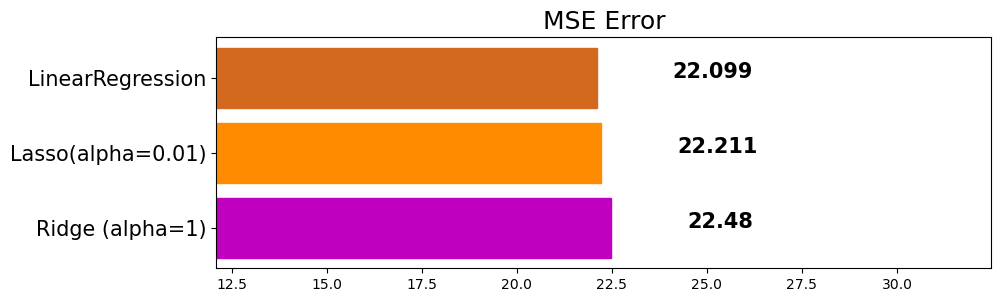

In [15]:
# -----------------------------------------
# 1️⃣ Lasso 회귀 (L1 규제)
# -----------------------------------------
lasso=Lasso(alpha=0.01) # 규제 강도 0.01
lasso.fit(x_train,y_train) # 학습
pred=lasso.predict(x_test)  # 예측
mse_eval('Lasso(alpha=0.01)',pred,y_test)

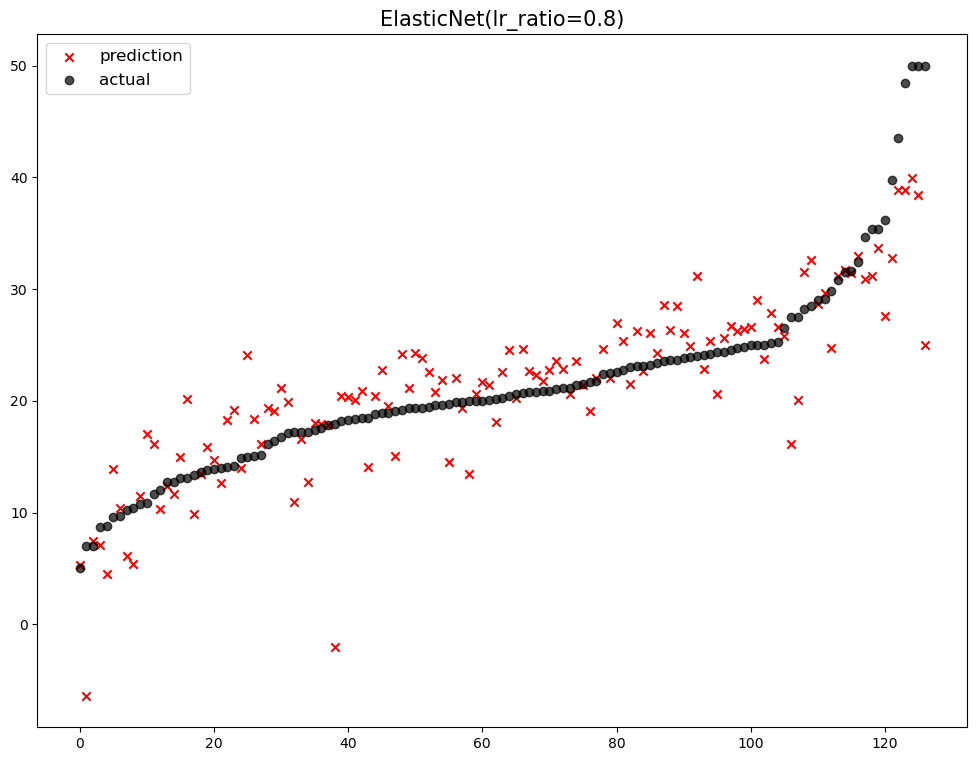

                      model        mse
0  ElasticNet(lr_ratio=0.8)  23.156236
1           Ridge (alpha=1)  22.480476
2         Lasso(alpha=0.01)  22.210557
3          LinearRegression  22.098695


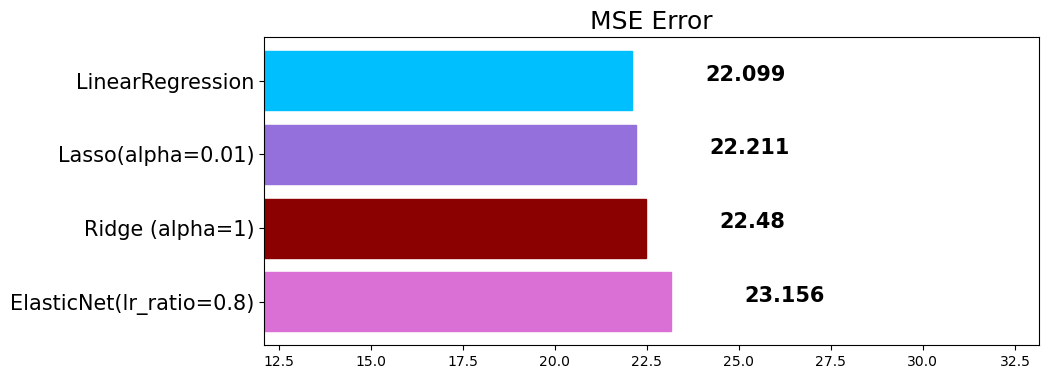

In [16]:
# -----------------------------------------
# 2️⃣ ElasticNet (L1 + L2)
# -----------------------------------------
elasticnet=ElasticNet(alpha=0.5,l1_ratio=0.8)
elasticnet.fit(x_train,y_train)
pred=elasticnet.predict(x_test)
mse_eval('ElasticNet(lr_ratio=0.8)',pred,y_test)

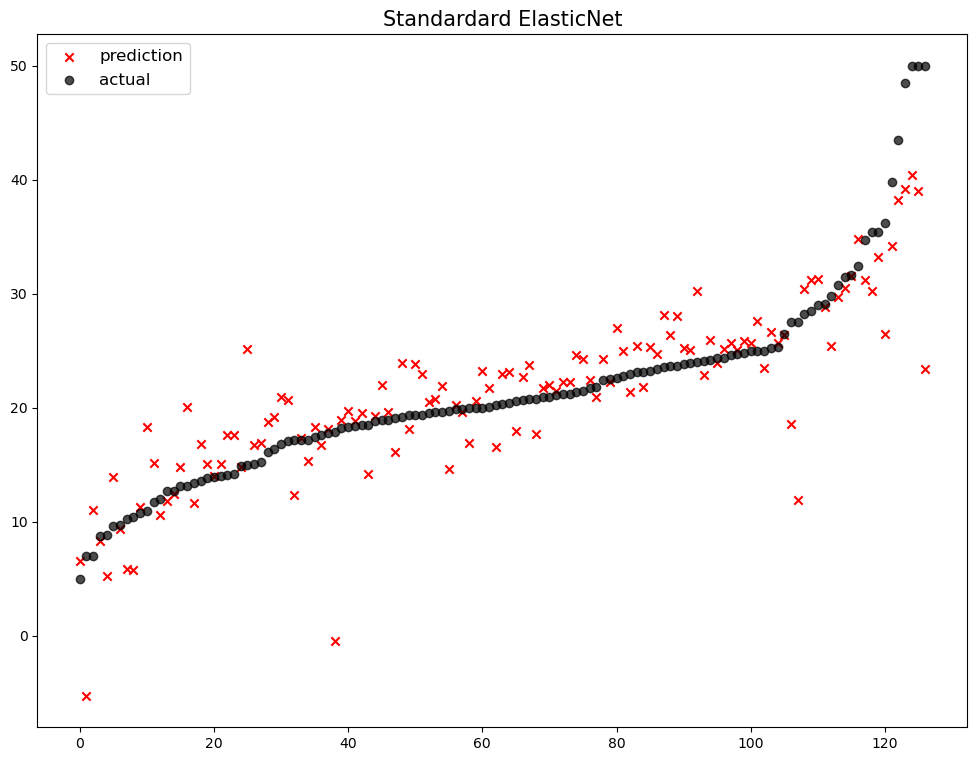

                      model        mse
0  ElasticNet(lr_ratio=0.8)  23.156236
1    Standardard ElasticNet  22.694970
2           Ridge (alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695


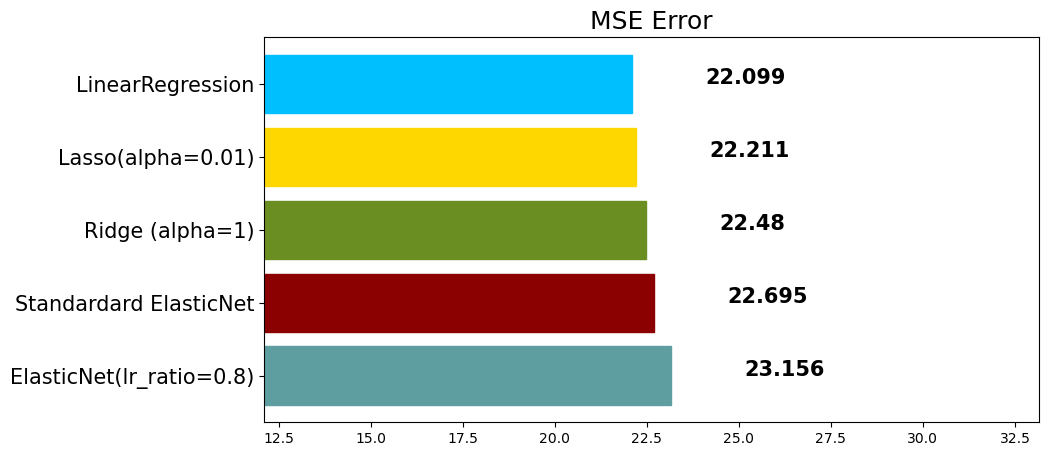

In [17]:
# -----------------------------------------
# 3️⃣ 표준화 + ElasticNet (파이프라인)
# -----------------------------------------
elasticnet_pipeline=make_pipeline(
    StandardScaler(),   # 스케일 맞추기
    ElasticNet(alpha=0.1,l1_ratio=0.2)
)

elasticnet_pred=elasticnet_pipeline.fit(x_train,y_train).predict(x_test)
mse_eval('Standardard ElasticNet',elasticnet_pred,y_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.782e+01, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(


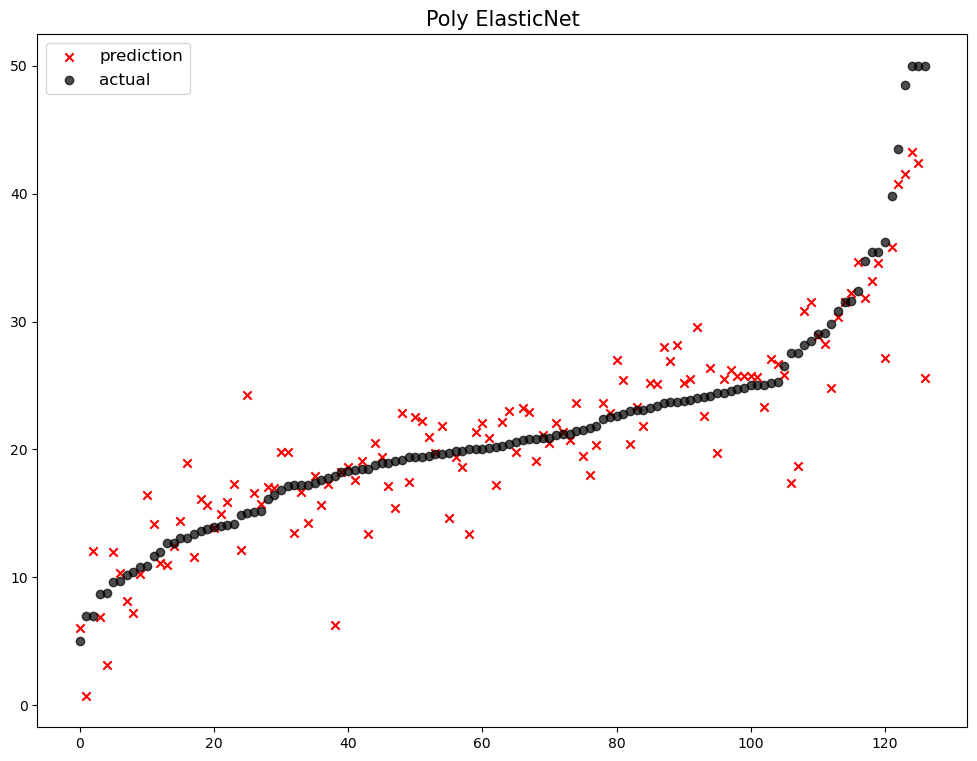

                      model        mse
0  ElasticNet(lr_ratio=0.8)  23.156236
1    Standardard ElasticNet  22.694970
2           Ridge (alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695
5           Poly ElasticNet  15.710492


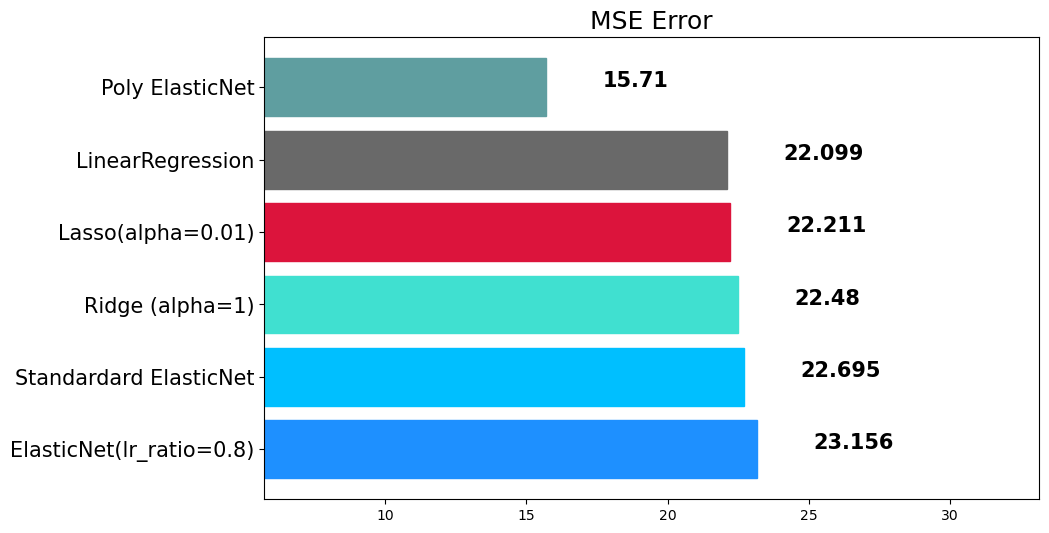

In [18]:

# -----------------------------------------
# 4️⃣ 다항식 + 표준화 + ElasticNet
# -----------------------------------------
poly_pipeline=make_pipeline(
    PolynomialFeatures(degree=2,include_bias=False), # 비선형 피처 생성
    StandardScaler(), # 스케일링
    ElasticNet(alpha=0.1,l1_ratio=0.2)
)
poly_pred=poly_pipeline.fit(x_train,y_train).predict(x_test)
mse_eval("Poly ElasticNet",poly_pred,y_test)

## 보팅(Voting)- 회귀(Regression)

voting은 단어 뜻 그대로 투표를 통해 결정하는 방식입니다. Voting은 Bagging과 투표방식이라는 점에서 유사하지만 다음과 같은 큰 차이점이 있습니다.

In [19]:
# =========================================
# 1️⃣ 보팅 앙상블에 필요한 클래스 불러오기
# =========================================
from sklearn.ensemble import VotingRegressor,VotingClassifier

# =========================================
# 2️⃣ 사용할 개별 모델들을 리스트로 묶기
# =========================================
single_models=[
    ('linear_reg',linear_reg),
    ('ridge',ridge),
    ('lasso',lasso),
    ('elasticnet_pipeline',elasticnet_pipeline),
    ('poly_pipeline',poly_pipeline)
]

In [20]:
# =========================================
# 3️⃣ VotingRegressor 생성
# =========================================
voting_regressor=VotingRegressor(single_models,n_jobs=-1)

In [21]:
# =========================================
# 4️⃣ 보팅 앙상블 모델 학습
# =========================================
voting_regressor.fit(x_train,y_train)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet_pipeline',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))])),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))]))],
                n_jobs=-1)

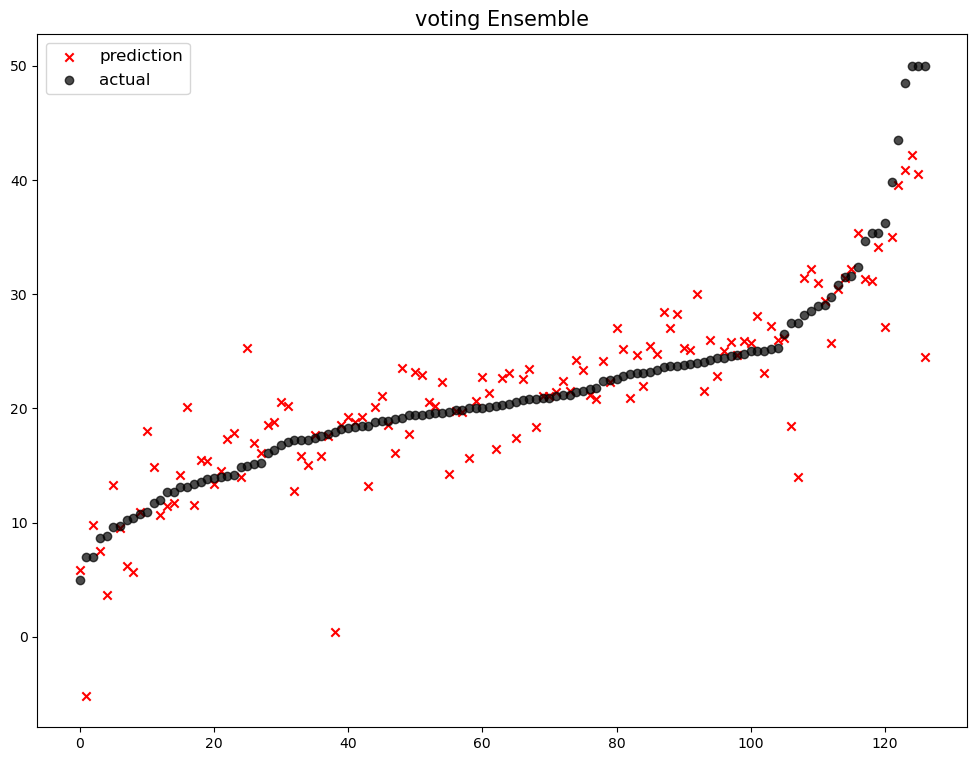

                      model        mse
0  ElasticNet(lr_ratio=0.8)  23.156236
1    Standardard ElasticNet  22.694970
2           Ridge (alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695
5           voting Ensemble  20.474757
6           Poly ElasticNet  15.710492


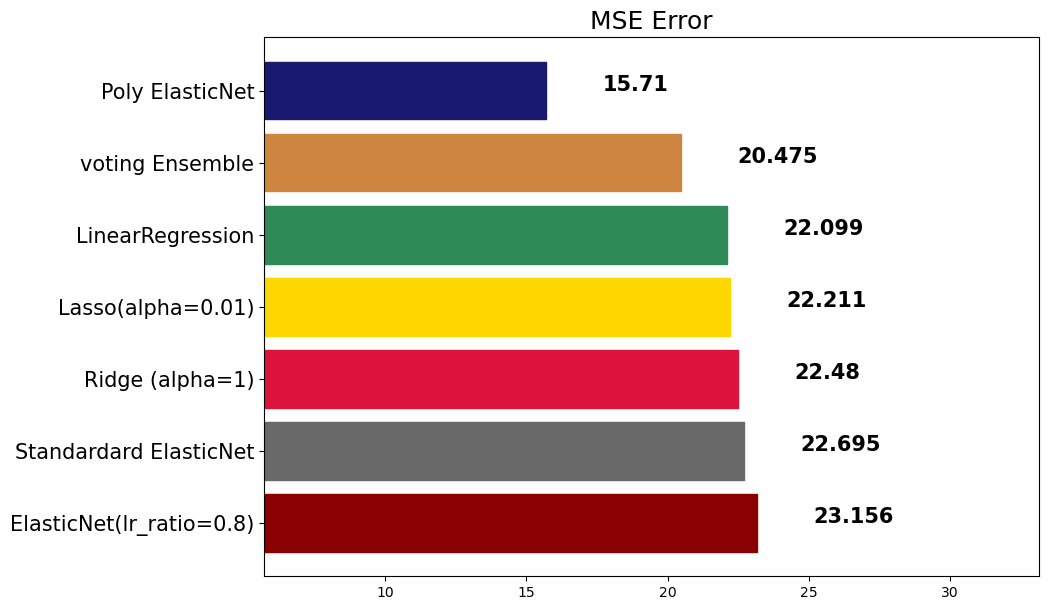

In [22]:
# =========================================
# 5️⃣ 테스트 데이터로 예측
# =========================================
voting_pred=voting_regressor.predict(x_test)


# =========================================
# 6️⃣ 성능 평가 (MSE)
# =========================================
mse_eval('voting Ensemble',voting_pred,y_test)

## 보팅 (Voting) - 분류 (Classification)
분류기 모델을 만들때 Voting 앙상블은 1가지의 중요한 parameter가 있습니다

- voting={'hard','soft'}

#### hard로 설정한 경우
class를 0,1로 분류 예측을 하는 이진분류를 예로 들어 보겠습니다

Hard Voting 방식에서는 결과 값에 대한 다수 class를 차용합니다.

classification을 예로 들어 보자면, 분류를 예측한 값이 1, 0, 0, 1, 1 이었다고 가정한다면 1이 3표, 0이 2표를 받았기 때문에 Hard Voting 방식

에서는 1이 최종 값으로 예측을 하게 됩니다.

#### soft
soft vote 방식은 각각의 확률의 평균 값을 계산한다음에 가장 확률이 높은 값으로 확정짓게 됩니다.

가령 class 0이 나올 확률이 (0.4, 0.9, 0.9, 0.4, 0.4)이었고, class 1이 나올 확률이 (0.6, 0.1, 0.1, 0.6, 0.6) 이었다면,
class 0이 나올 최종 확률은 (0.4+0.9+0.9+0.4+0.4) / 5 = 0.44,

class 1이 나올 최종 확률은 (0.6+0.1+0.1+0.6+0.6) / 5 = 0.4

가 되기 때문에 앞선 Hard Vote의 결과와는 다른 결과 값이 최종 으로 선출되게 됩니다.

In [23]:
# =========================================
# 1️⃣ 보팅 분류기와 사용할 모델 불러오기
# =========================================
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier


# =========================================
# 2️⃣ 사용할 개별 분류 모델들을 리스트로 묶기
# =========================================
models=[
    ('Logi',LogisticRegression()),
    ('ridge',RidgeClassifier())
]

# =========================================
# 3️⃣ VotingClassifier 생성 (하드 보팅)
# =========================================
vc=VotingClassifier(models,voting='hard')

## 배깅(Bagging)

Bagging은 Bootstrap Aggregating의 줄임말입니다.
Bootstrap = Sample(샘플) + Aggregating = 합산
Bootstrap은 여러 개의 dataset을 중첩을 허용하게 하여 샘플링하여 분할하는 방식
데이터 셋의 구성이 [1, 2, 3, 4, 5 ]로 되어 있다면,
1. group 1 = [1, 2, 3]
2. group 2 = [1, 3, 4]
3. group 3 = [2, 3, 5]

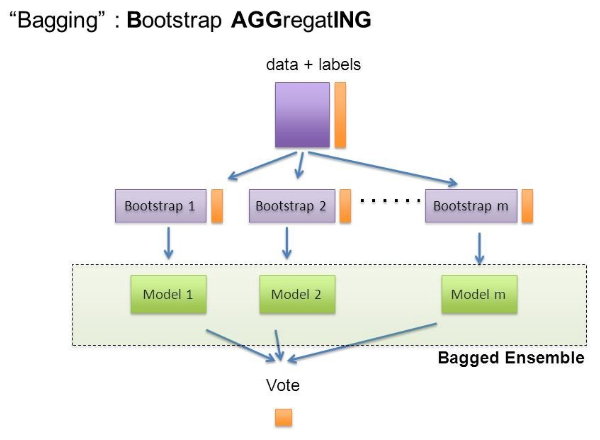

In [24]:
Image('https://teddylee777.github.io/images/2019-12-17/image-20191217015537872.png')

## Voting VS Bagging
Voting은 여러 알고리즘의 조합에 대한 앙상블

Bagging은 하나의 단일 알고리즘에 대하여 여러 개의 샘플 조합으로 앙상블

대표적인 Bagging 앙상블

1. RandomForest

2. Bagging

In [25]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

# ===============================
# 1️⃣ 기본 랜덤 포레스트 모델
# ===============================
rfr=RandomForestRegressor() # 기본 설정 모델 생성
rfr.fit(x_train,y_train) # 학습

RandomForestRegressor()

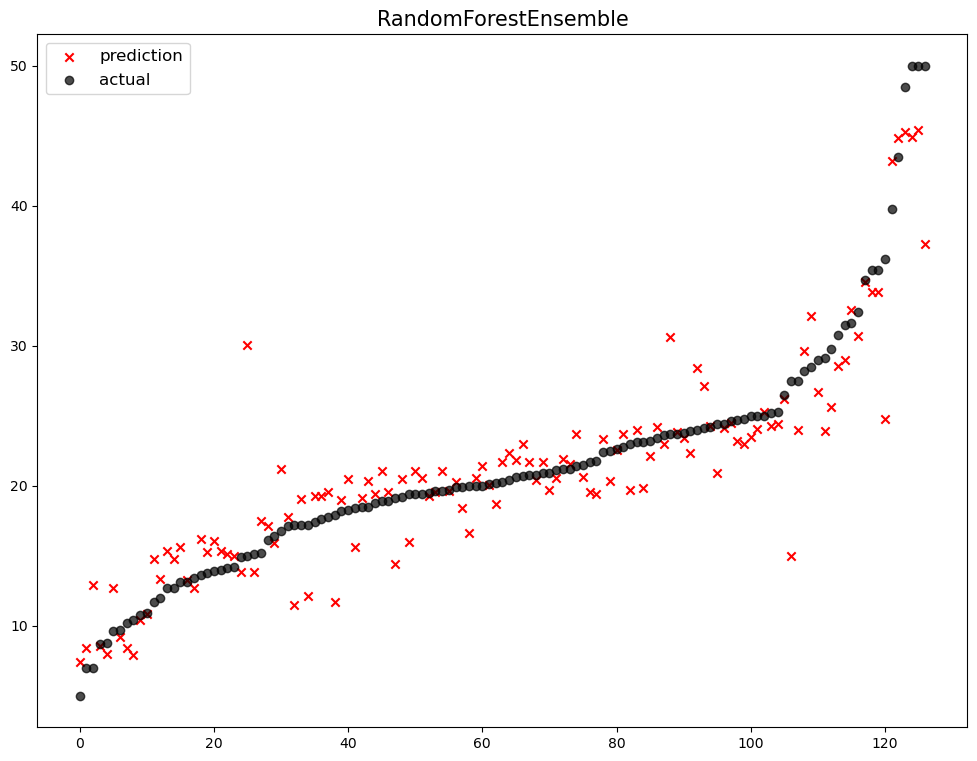

                      model        mse
0  ElasticNet(lr_ratio=0.8)  23.156236
1    Standardard ElasticNet  22.694970
2           Ridge (alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695
5           voting Ensemble  20.474757
6           Poly ElasticNet  15.710492
7      RandomForestEnsemble  10.536140


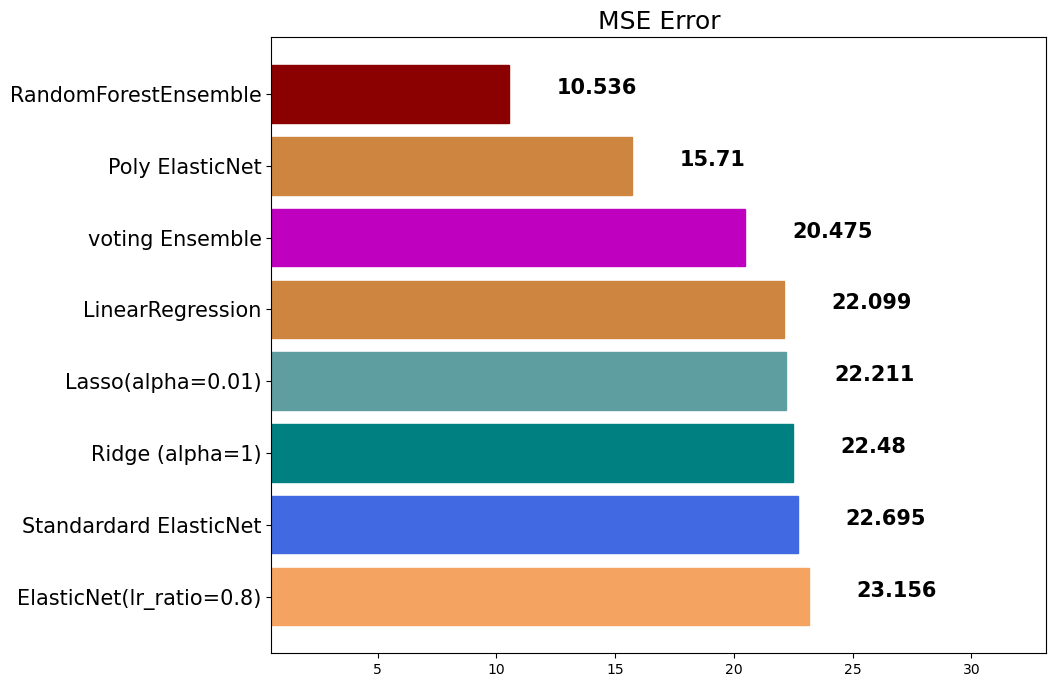

In [26]:
rfr_pred=rfr.predict(x_test) # 테스트 데이터 예측
mse_eval('RandomForestEnsemble',rfr_pred,y_test) # 성능 평가

n_jobs: CPU 사용 갯수

max_depth: 깊어질 수 있는 최대 깊이. 과대적합 방지용

n_estimators: 앙상블하는 트리의 갯수

max_features: 최대로 사용할 feature의 갯수. 과대적합 방지용

min_samples_split: 트리가 분할할 때 최소 샘플의 갯수. default=2. 과대적합 방지용

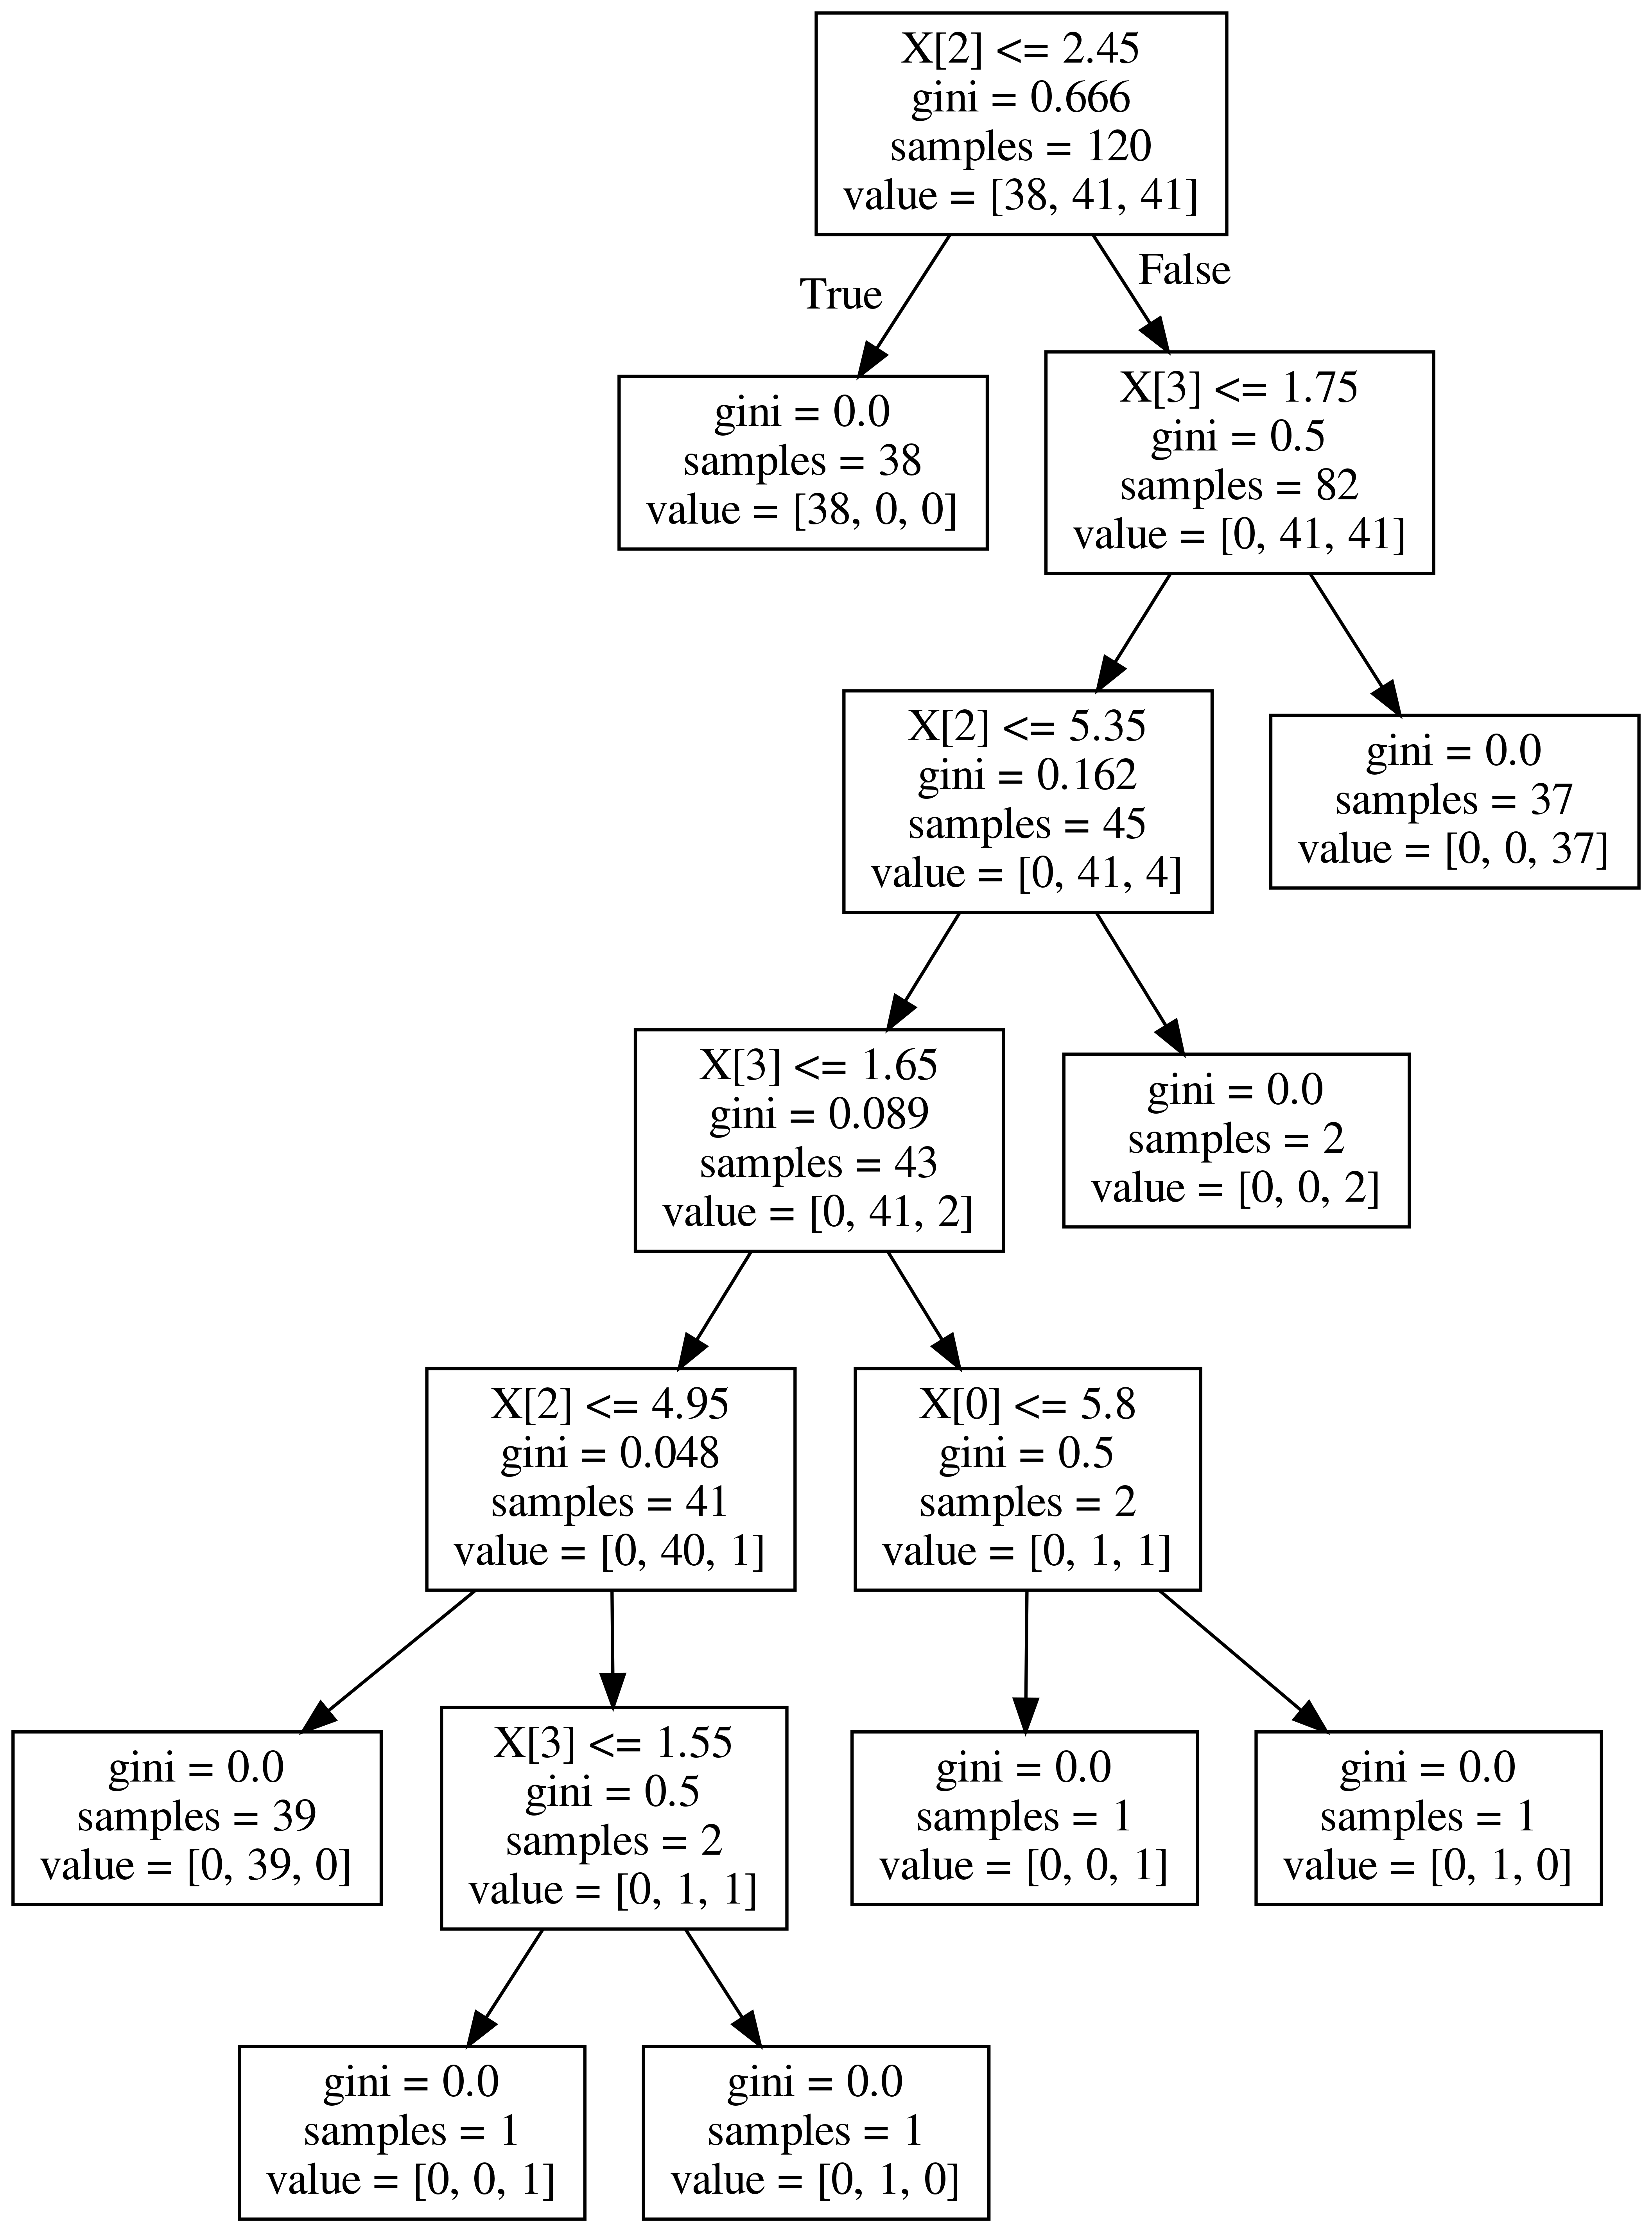

In [27]:
Image('https://teddylee777.github.io/images/2020-01-09/decistion-tree.png', width=600)

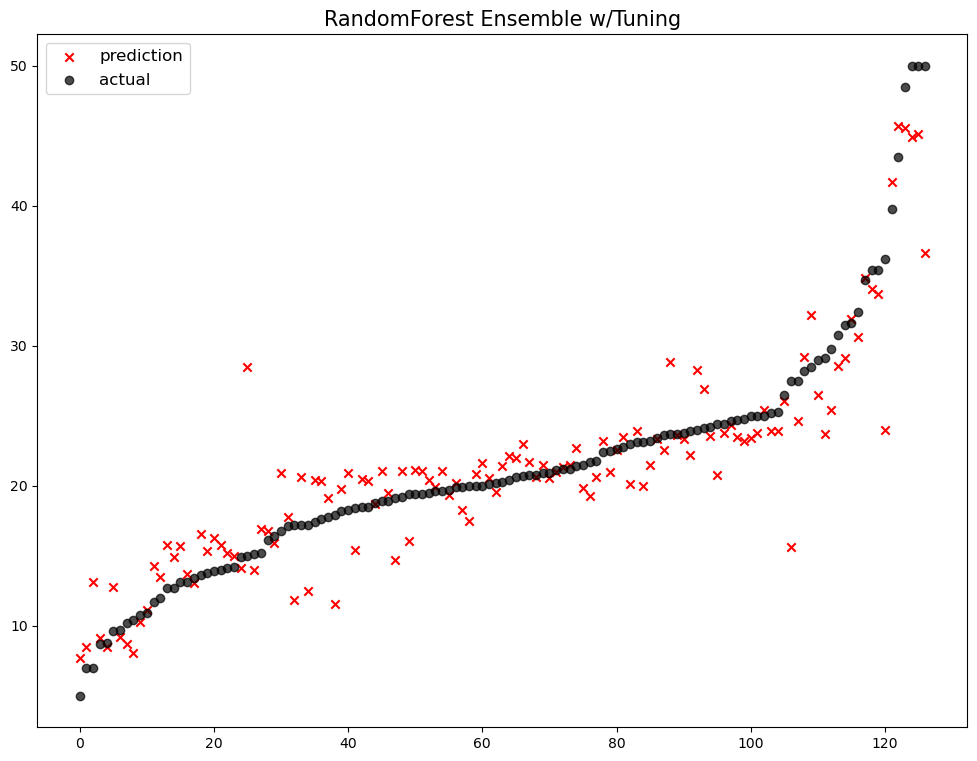

                            model        mse
0        ElasticNet(lr_ratio=0.8)  23.156236
1          Standardard ElasticNet  22.694970
2                 Ridge (alpha=1)  22.480476
3               Lasso(alpha=0.01)  22.210557
4                LinearRegression  22.098695
5                 voting Ensemble  20.474757
6                 Poly ElasticNet  15.710492
7            RandomForestEnsemble  10.536140
8  RandomForest Ensemble w/Tuning  10.196040


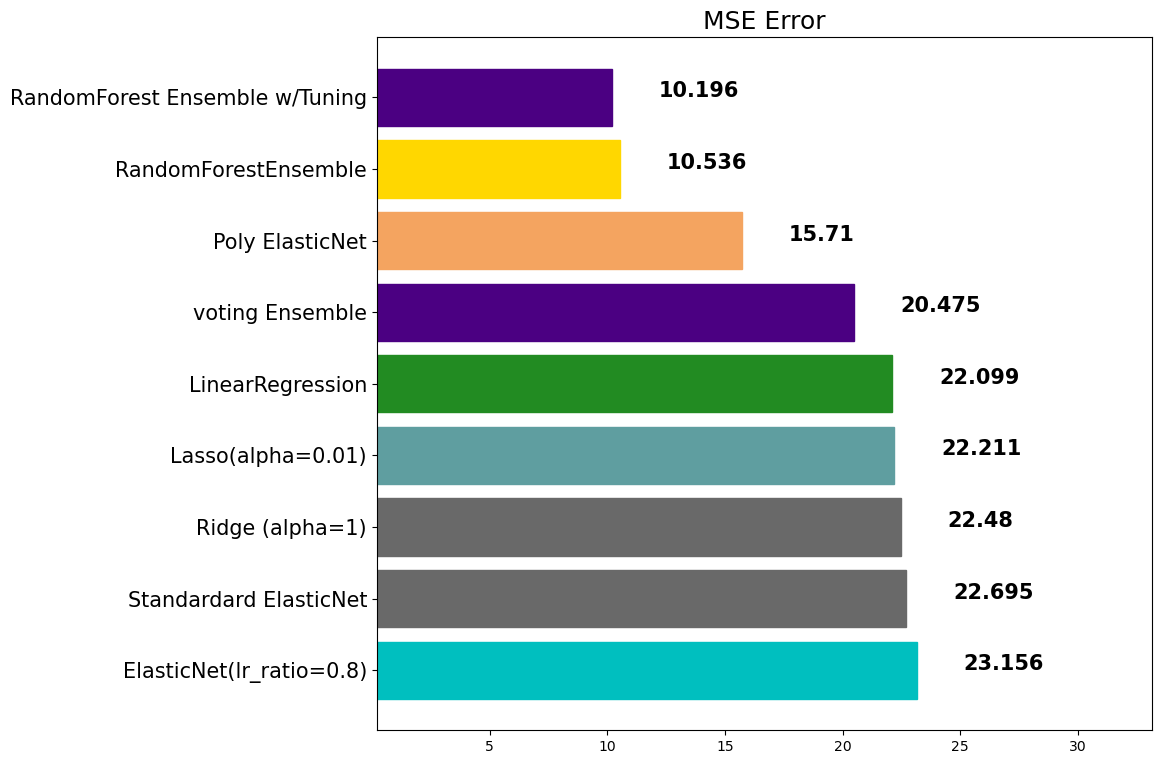

In [28]:
# ===============================
# 2️⃣ 튜닝된 랜덤 포레스트 모델
# ===============================
rfr=RandomForestRegressor(random_state=42,# 결과 고정
                          n_estimators=1000, # 트리 1000개
                          max_depth=7, # 트리 깊이 제한
                          max_features=0.9) # 특성의 90%만 사용
# 다시 학습
rfr.fit(x_train,y_train)

# 예측
rfr_pred=rfr.predict(x_test)


# mse성능평가
mse_eval('RandomForest Ensemble w/Tuning',rfr_pred,y_test)

약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식입니다.
장점

성능이 매우 우수하다 (Lgbm, XGBoost)

### 단점
부스팅 알고리즘의 특성상 계속 약점(오분류/잔차)을 보완하려고 하기 때문에 잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감할
수 있다
다른 앙상블 대비 학습 시간이 오래걸린다는 단점이 존재

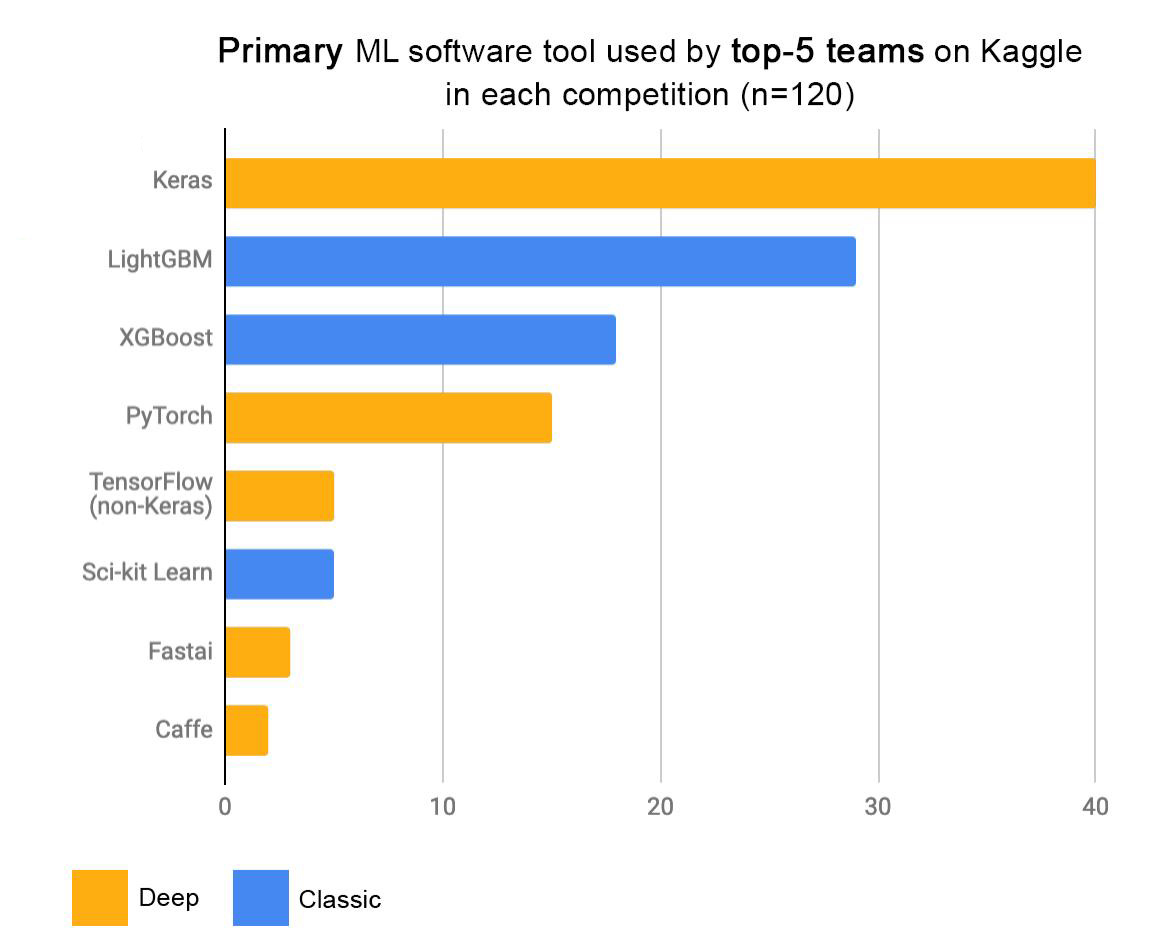

In [29]:
Image('https://keras.io/img/graph-kaggle-1.jpeg', width=800)

## GradientBoost

성능이 우수함

학습시간이 해도해도 너무 느리다

1. AdaBoost

2. GradientBoost

3. LightGBM (LGBM)

4. XGBoost

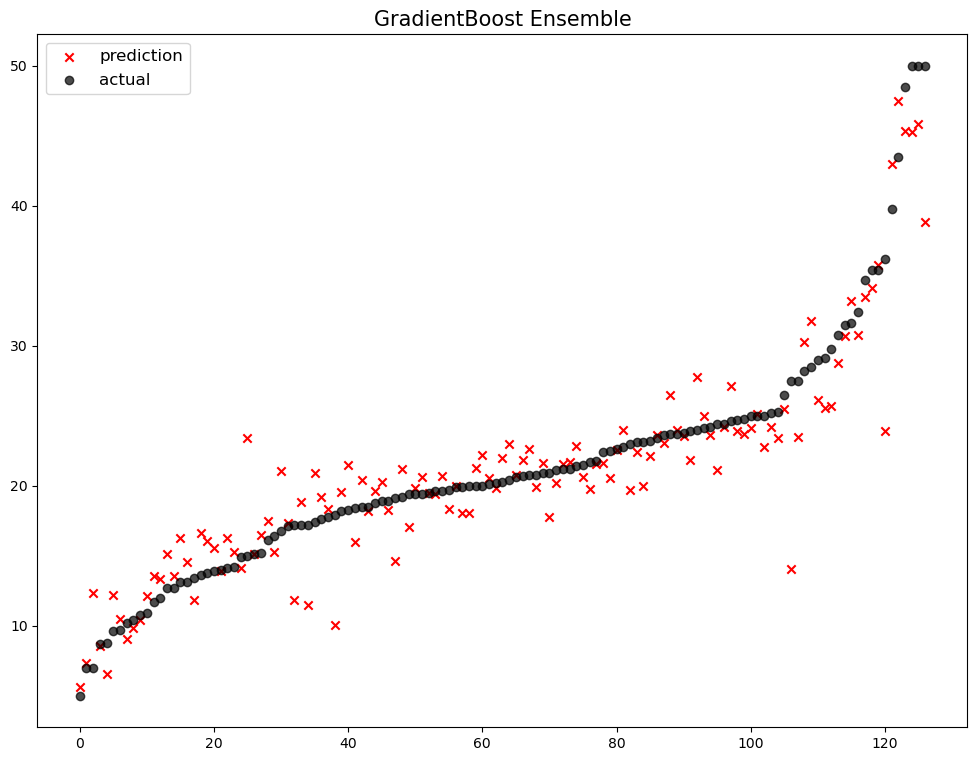

                            model        mse
0        ElasticNet(lr_ratio=0.8)  23.156236
1          Standardard ElasticNet  22.694970
2                 Ridge (alpha=1)  22.480476
3               Lasso(alpha=0.01)  22.210557
4                LinearRegression  22.098695
5                 voting Ensemble  20.474757
6                 Poly ElasticNet  15.710492
7            RandomForestEnsemble  10.536140
8  RandomForest Ensemble w/Tuning  10.196040
9          GradientBoost Ensemble   8.956141


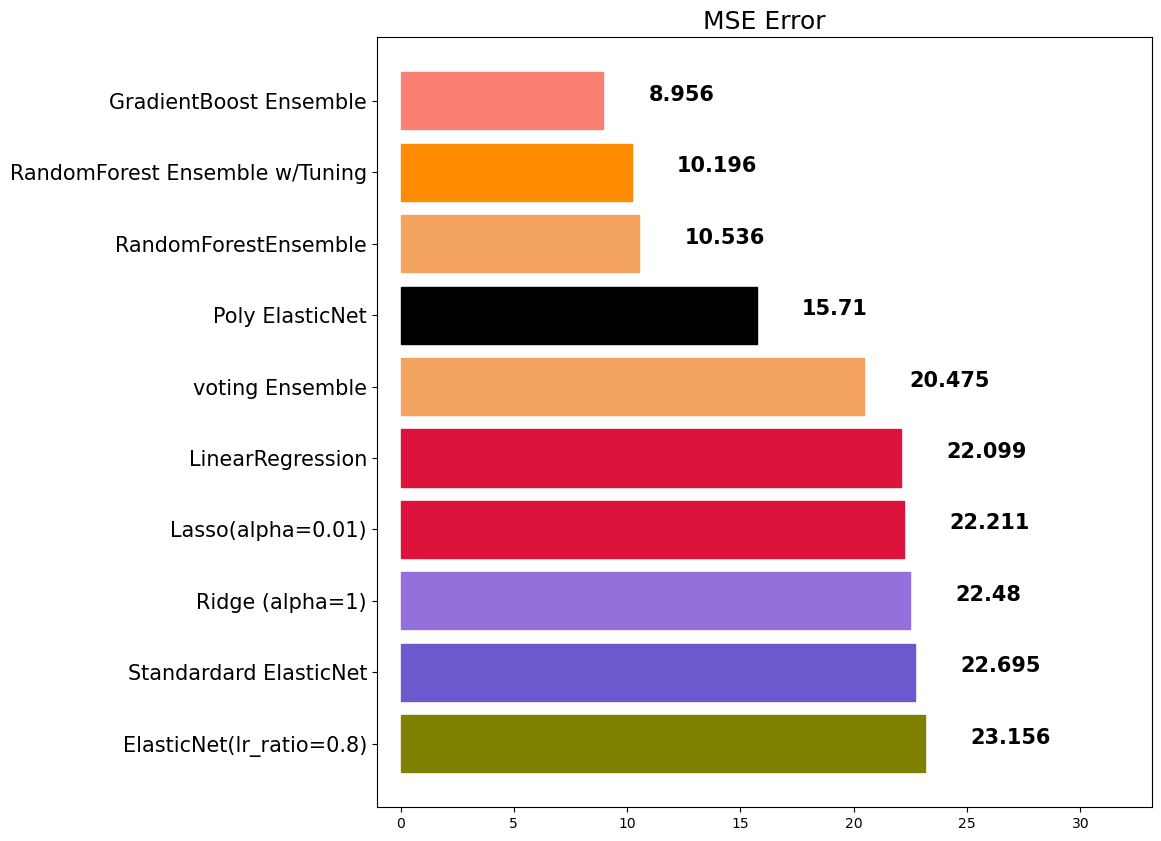

In [30]:
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier

# GradientBoostingRegressor
# : 여러 개의 '작은 결정트리'를 순서대로 만들어서
#   앞에서 틀린 부분을 뒤에서 하나씩 고쳐가는 회귀 모델

# ======================================================
# 1️⃣ 기본 Gradient Boosting 모델 (기본 설정)
# ======================================================

# 기본 옵션으로 Gradient Boosting 모델 생성
# random_state=42 :
# → 실행할 때마다 결과가 달라지지 않도록 랜덤성을 고정


gbr=GradientBoostingRegressor(random_state=42)

# 모델 학습
# x_train : 입력 데이터(문제)
# y_train : 정답 데이터
# → 모델이 "어떤 입력이면 어떤 값이 나오는지" 공부하는 단계
gbr.fit(x_train,y_train)

# 테스트 데이터로 예측
# x_test : 학습에 사용하지 않은 새로운 데이터
# gbr_pred : 모델이 예측한 값(숫자)
gbr_pred=gbr.predict(x_test)

# 성능 평가 (MSE)
# 'GradientBoost Ensemble' : 결과를 구분하기 위한 이름
# gbr_pred : 예측값
# y_test   : 실제 정답
mse_eval('GradientBoost Ensemble',gbr_pred,y_test)

random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!

n_jobs: CPU 사용 갯수

learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 
적절한 값을 찾아야함. n_estimators와
같이 튜닝. default=0.1

n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100

subsample: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용

min_samples_split: 노드 분할시 최소 샘플의 갯수. default=2. 과대적합 방지용

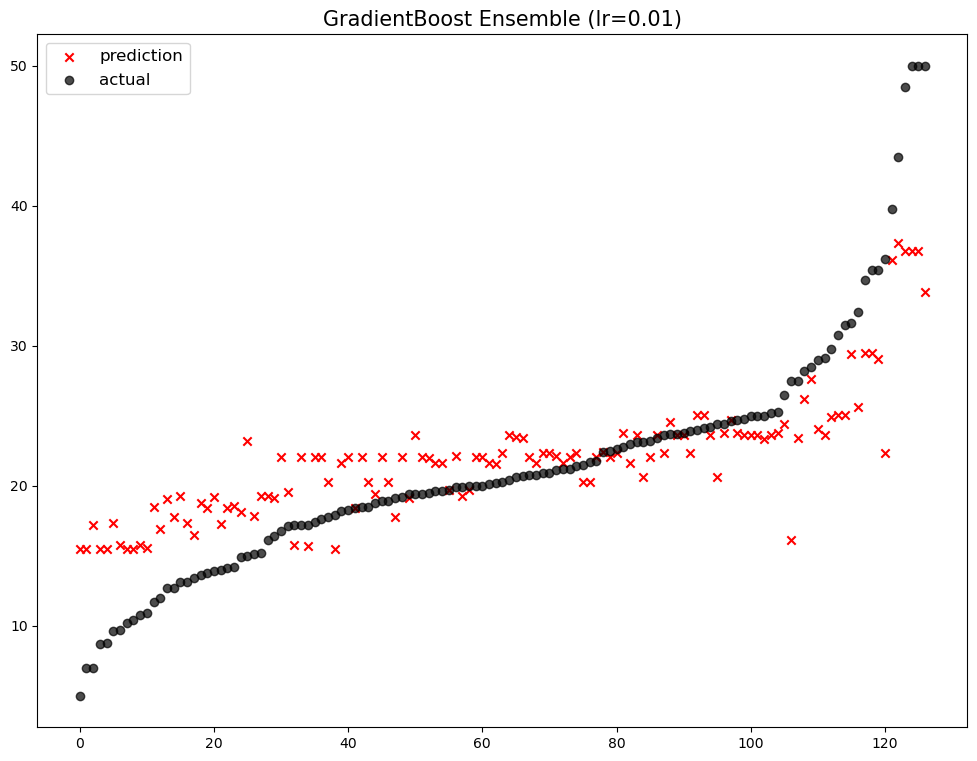

                               model        mse
0           ElasticNet(lr_ratio=0.8)  23.156236
1             Standardard ElasticNet  22.694970
2                    Ridge (alpha=1)  22.480476
3                  Lasso(alpha=0.01)  22.210557
4                   LinearRegression  22.098695
5   GradientBoost Ensemble (lr=0.01)  21.982151
6                    voting Ensemble  20.474757
7                    Poly ElasticNet  15.710492
8               RandomForestEnsemble  10.536140
9     RandomForest Ensemble w/Tuning  10.196040
10            GradientBoost Ensemble   8.956141


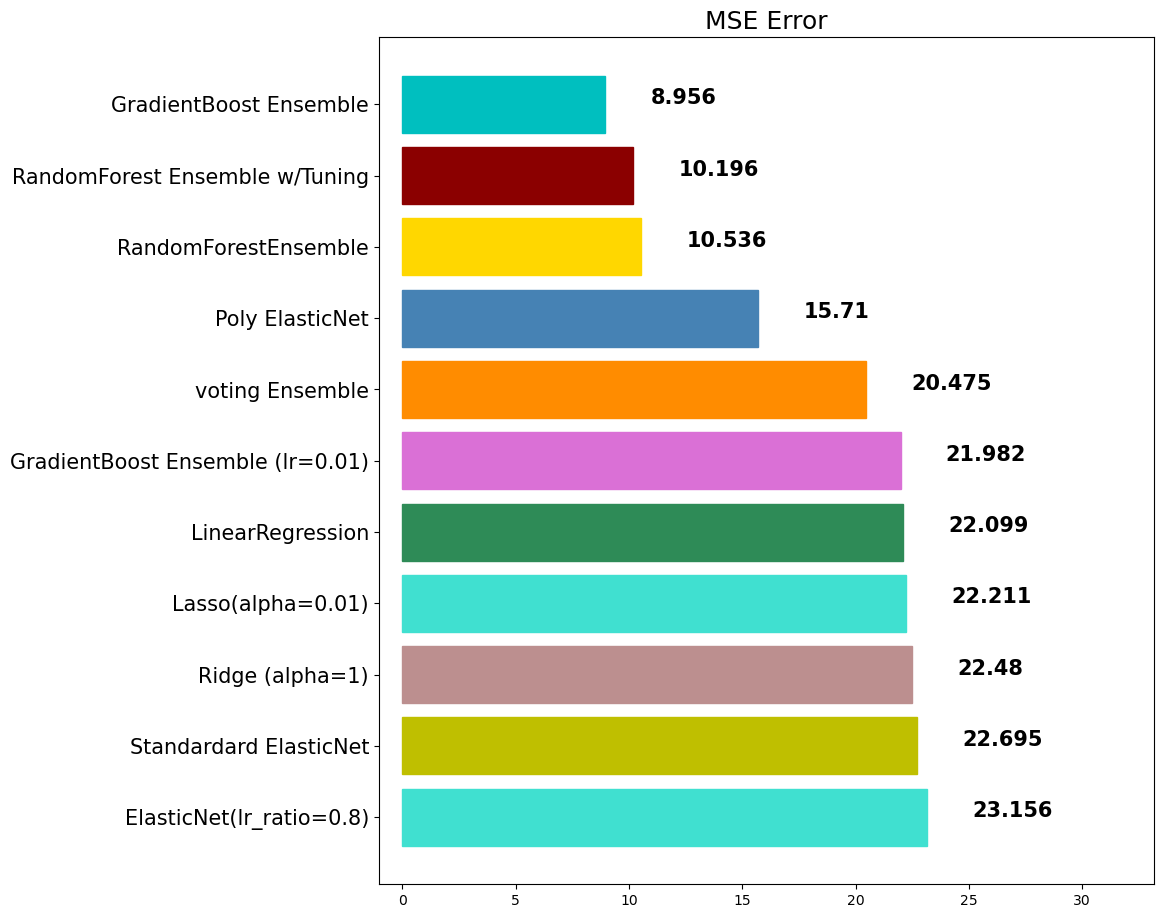

In [31]:
# ======================================================
# 2️⃣ 학습률(learning_rate)을 낮춘 모델
# ======================================================

# learning_rate=0.01
# → 한 번에 크게 고치지 않고, 아주 조금씩 천천히 고치게 함
# → 과적합을 줄이고 안정적인 학습을 기대
gbr=GradientBoostingRegressor(random_state=42,learning_rate=0.01) # 기본값(0.1)보다 훨씬 작음

# 다시 학습
gbr.fit(x_train,y_train)
# 다시 예측
gbr_pred=gbr.predict(x_test)

# 성능 평가
# 기본 모델과 "학습을 천천히 했을 때"의 차이를 비교
mse_eval('GradientBoost Ensemble (lr=0.01)',gbr_pred,y_test)



## ❓ `# 결정트리 1000개 생성` 이게 무슨 말이야?

이 주석은 아래 코드 때문이야 👇

```python
gbr = GradientBoostingRegressor(
    random_state=42,
    learning_rate=0.01,
    n_estimators=1000
)
```

여기서 핵심은 **`n_estimators=1000`** 이야.

---

## 🧠 아주 한 줄 요약

> **결정트리 1000개 = "작은 결정트리 모델을 1000번 차례대로 만든다"**

---

## 🧩 하나씩 뜯어서 보자

### 1️⃣ 결정트리란?

> **질문을 계속 던지면서 답을 찾는 규칙 덩어리**

예를 들면:

```text
키 > 170 ?
 ├─ YES → 몸무게 > 65 ?
 │        ├─ YES → 80
 │        └─ NO  → 70
 └─ NO  → 60
```

이게 **결정트리 1개**야.

---

### 2️⃣ Gradient Boosting에서의 결정트리

중요 ❗
Gradient Boosting에서 쓰는 결정트리는:

* ❌ 크고 복잡한 트리 아님
* ✅ **아주 얕고 단순한 트리**

보통 이런 수준이야 👇

```text
하나 질문 → 바로 예측
```

📌 이유:

* **하나가 실수를 크게 바꾸지 않게**
* 조금씩 조금씩 고치기 위해서

---

### 3️⃣ 그럼 "1000개"는 무슨 뜻?

> ❝ 이런 작은 결정트리를 **하나씩 순서대로 1000번 만든다** ❞

📈 진행 과정:

```
1번째 트리 → 첫 예측
2번째 트리 → 1번째가 틀린 부분 보완
3번째 트리 → 2번째까지의 실수 보완
...
1000번째 트리 → 아주 미세한 오차까지 보정
```

📌 **동시에 1000개 만드는 게 아님!**
📌 **차례차례 하나씩 만든다!**

---

## 🎯 중요한 오해 정리

### ❌ 오해

> "트리 1000개를 한꺼번에 만들어서 평균내는 거야?"

### ✅ 정답

> ❝ 아니다 ❞
> **앞에서 만든 트리의 실수를 다음 트리가 고친다**

➡️ 이게 바로 **Boosting**

---

## 🆚 RandomForest랑 비교하면 더 쉬워

| 모델               | 트리 생성 방식                 |
| ---------------- | ------------------------ |
| RandomForest     | 트리 여러 개를 **한꺼번에** 만들고 평균 |
| GradientBoosting | 트리를 **하나씩 순서대로** 만들며 보완  |

📌 그래서:

* RandomForest → 병렬 작업
* GradientBoosting → 순차 작업

---

## 🎒 비유로 한 번 더!

### 📚 공부 비유

* **RandomForest**

  > 학생 100명이 동시에 시험 보고 평균 점수

* **Gradient Boosting**

  > 한 학생이 문제 풀고
  > 틀린 문제만 다시 풀고
  > 또 틀린 문제만 다시 풀고
  > 이걸 **1000번 반복**

---

## 🔑 왜 `learning_rate`랑 같이 써?

```text
learning_rate ↓
→ 한 번에 고치는 양 ↓
→ 그래서 더 많은 트리 필요
→ n_estimators ↑
```

📌 그래서 실무 공식처럼 쓰여:

```python
learning_rate=0.01
n_estimators=1000
```

---

## ✅ 진짜 핵심만 다시 정리

✔️ **결정트리 1000개 = 작은 트리를 1000번 순서대로 생성**
✔️ 각 트리는 **이전 트리의 실수를 보완**
✔️ 동시에 만드는 게 아니라 **차례차례**
✔️ learning_rate가 작을수록 트리 개수는 많아야 함

---




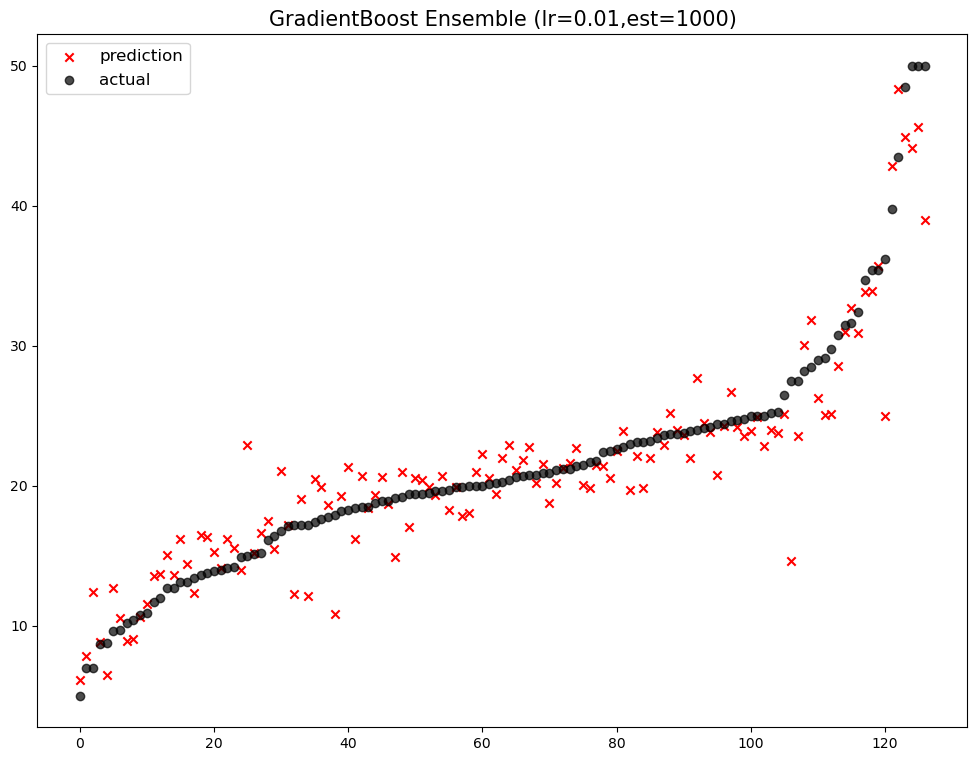

                                        model        mse
0                    ElasticNet(lr_ratio=0.8)  23.156236
1                      Standardard ElasticNet  22.694970
2                             Ridge (alpha=1)  22.480476
3                           Lasso(alpha=0.01)  22.210557
4                            LinearRegression  22.098695
5            GradientBoost Ensemble (lr=0.01)  21.982151
6                             voting Ensemble  20.474757
7                             Poly ElasticNet  15.710492
8                        RandomForestEnsemble  10.536140
9              RandomForest Ensemble w/Tuning  10.196040
10                     GradientBoost Ensemble   8.956141
11  GradientBoost Ensemble (lr=0.01,est=1000)   8.546408


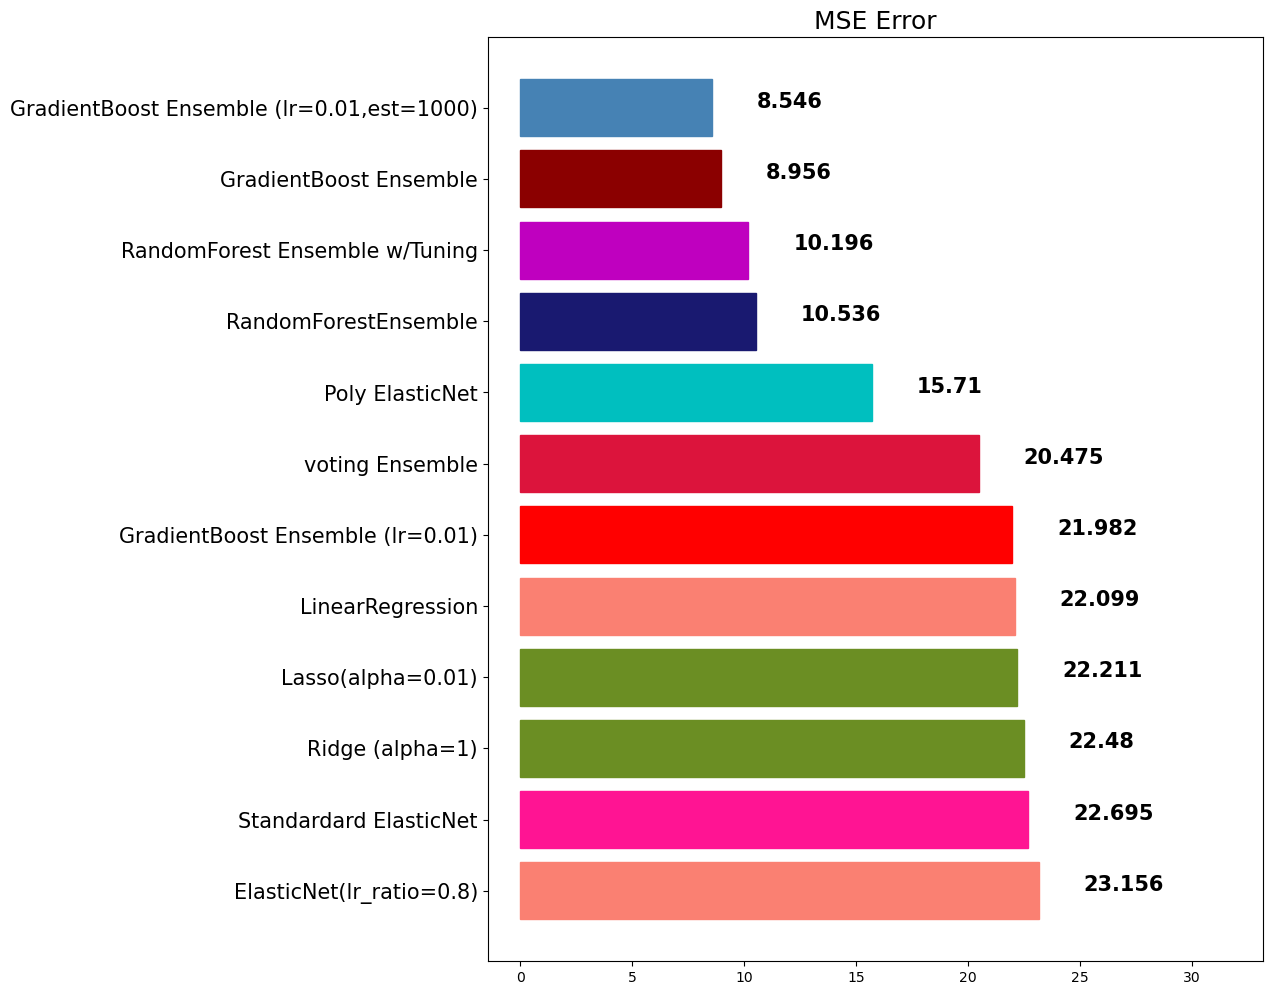

In [32]:
# ======================================================
# 3️⃣ 학습률 ↓ + 트리 수 ↑
# ======================================================

# learning_rate를 아주 작게 설정했기 때문에
# → 보완 작업을 해줄 트리 개수를 많이 만들어 줌

gbr=GradientBoostingRegressor(random_state=42,learning_rate=0.01, # 아주 조금씩 수정
                              n_estimators=1000)# 결정트리 1000개 생성

# 모델 학습
# → 이전 모델들보다 훨씬 많은 트리를 순서대로 만들며
#   오차를 점점 줄여나감
gbr.fit(x_train,y_train)
# 예측
gbr_pred=gbr.predict(x_test)

# 성능 평가
# 가장 정교한 모델의 성능 확인
mse_eval('GradientBoost Ensemble (lr=0.01,est=1000)',gbr_pred,y_test)

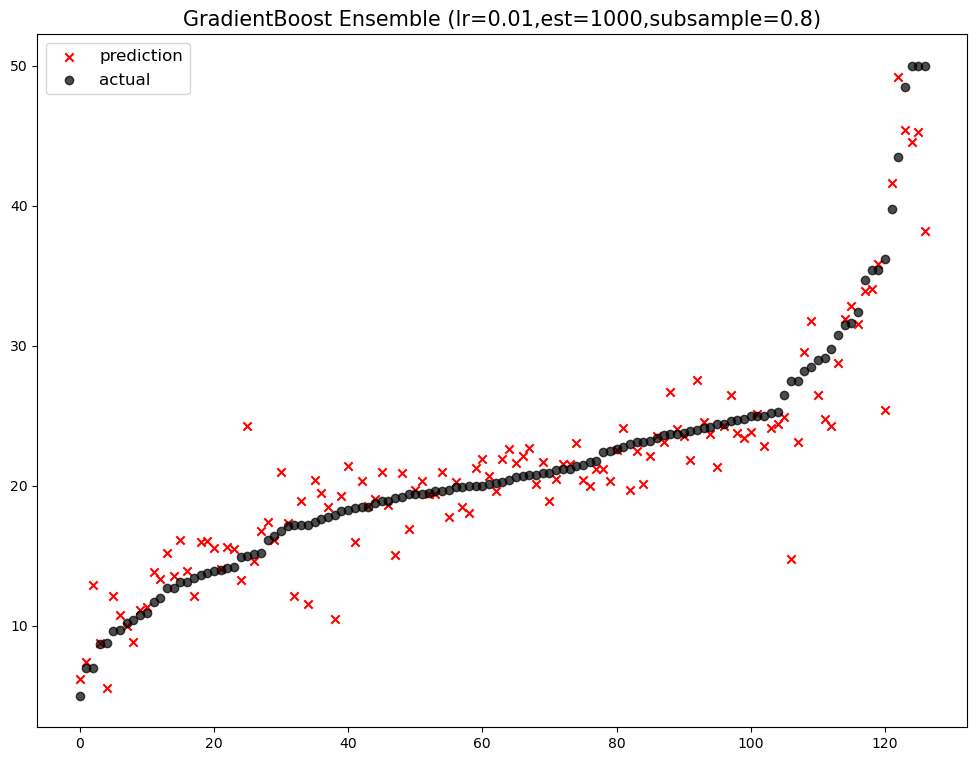

                                                model        mse
0                            ElasticNet(lr_ratio=0.8)  23.156236
1                              Standardard ElasticNet  22.694970
2                                     Ridge (alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                    GradientBoost Ensemble (lr=0.01)  21.982151
6                                     voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                                RandomForestEnsemble  10.536140
9                      RandomForest Ensemble w/Tuning  10.196040
10                             GradientBoost Ensemble   8.956141
11  GradientBoost Ensemble (lr=0.01,est=1000,subsa...   8.887780
12          GradientBoost Ensemble (lr=0.01,est=1000)   8.546408


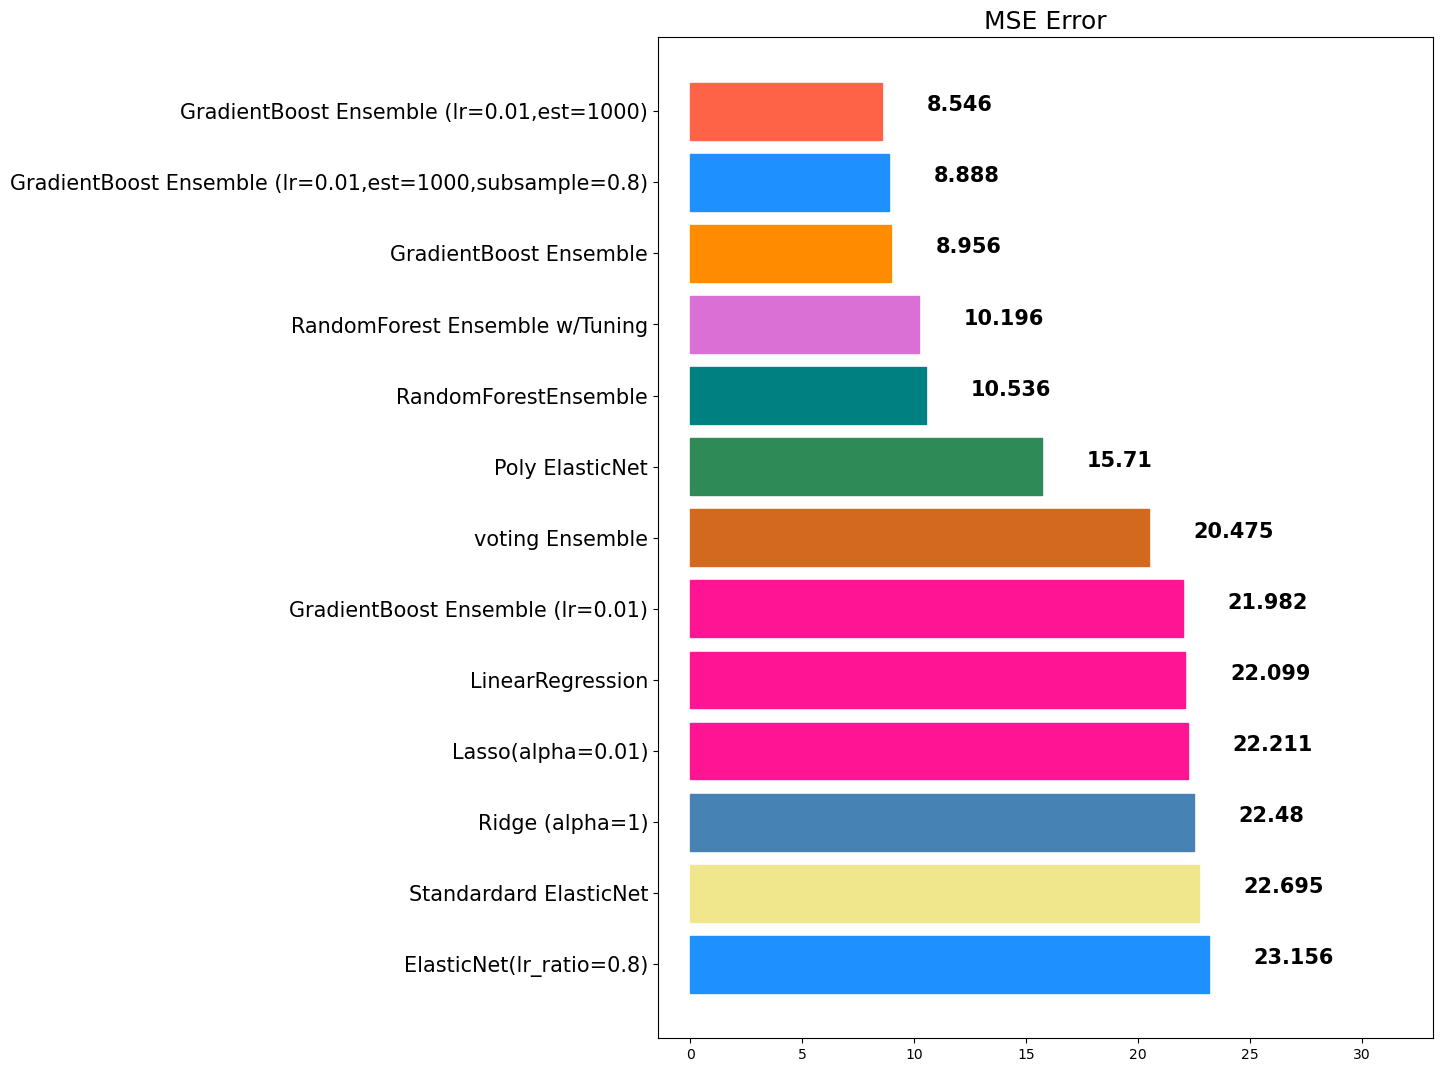

In [33]:
# Gradient Boosting 회귀 모델 생성
# - 작은 결정트리를 순서대로 여러 개 만들어
# - 이전 실수를 다음 트리가 보완하는 방식
gbr=GradientBoostingRegressor(random_state=42, # 실행 할 때마다 결과 고정
                              learning_rate=0.01,# 한 번에 아주 조금씩만 수정
                              n_estimators=1000, # 결정트리 1000개를 순서대로 생성
                              subsample=0.8) # 각 트리마다 전체 데이터의 80%만 사용

# 모델 학습
gbr.fit(x_train,y_train)
# 테스트 데이터 예측
gbr_pred=gbr.predict(x_test)
# 성능 평가 (평균제곱오차)
mse_eval('GradientBoost Ensemble (lr=0.01,est=1000,subsample=0.8)',gbr_pred,y_test)

## XGBOOST


- scikit-learn 패키지가 아닙니다.
- 성능이 우수함
- GBM보다는 빠르고 성능도 향상되었습니다.
- 여전히 학습시간이 매우 느리다

In [34]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



👉 **부스팅(Boosting)**

---

## ✅ 한 줄 요약 (이거 먼저!)

> **부스팅이란?
> 👉 틀린 문제를 계속 집중해서 다시 배우는 공부 방법**

---

## 📌 부스팅을 “공부”로 비유하면

### ❌ 일반적인 공부 (단일 모델)

* 문제집 한 권
* 한 번 쭉 풀고 끝
* 틀린 문제를 깊게 안 봄

### ✅ 부스팅 공부법

* 문제집을 여러 번 푼다
* **틀린 문제만 모아서 다시 푼다**
* 또 틀리면 **그 문제만 더 집중**
* 점점 약점이 사라짐 💪

👉 이게 바로 **부스팅**

---

## 🔄 아까 말한 XGBoost 내부 흐름 다시 보기 (핵심!)

> ### 🔹 XGBoost 내부에서 일어나는 일 (아주 쉽게)
>
> 1️⃣ 처음엔 **대충 예측**
> 2️⃣ 틀린 부분 확인
> 3️⃣ “왜 틀렸지?” → 오차 분석
> 4️⃣ 이전 실수를 보완하는 **새 나무(Tree)** 추가
> 5️⃣ 이 과정을 여러 번 반복 (**부스팅**)

이걸 하나씩 **그림 그리듯이** 설명해볼게 👇

---

## 1️⃣ 처음엔 대충 예측

* 첫 번째 모델(나무)은 **완전 초보**
* 데이터 패턴을 잘 모름
* 그래서 예측이 많이 틀림 ❌

📌 예:

```
실제값: 100
예측값: 60  (많이 틀림)
```

---

## 2️⃣ 틀린 부분 확인

* 모델이 스스로 말함:

> “어? 여기서 많이 틀렸네?”

* **오차(error)** 를 계산함

📌 예:

```
오차 = 실제값 - 예측값 = 100 - 60 = 40
```

---

## 3️⃣ 왜 틀렸는지 분석

* “어떤 데이터에서 유독 틀렸지?”
* “이 패턴을 내가 못 배웠네?”

👉 **틀린 데이터에 더 큰 중요도(가중치)** 를 줌

📌 핵심 포인트 ⭐

> **부스팅은 잘 맞춘 데이터엔 관심 없음
> → 틀린 데이터만 집요하게 봄**

---

## 4️⃣ 새 나무(Tree)를 추가

* 기존 모델을 버리지 않음 ❌
* **새 모델을 하나 더 만듦**
* 이 새 모델은:

> “아까 틀린 것만 잘 맞추는 게 목표”

📌 느낌:

```
1번 나무 : 전체적으로 대충
2번 나무 : 아까 틀린 애들 전담
3번 나무 : 그래도 또 틀린 애들 전담
```

---

## 5️⃣ 계속 반복 = 부스팅

* 나무 하나 → 약함 🌱
* 나무 여러 개 → 강함 🌳🌳🌳

👉 최종 예측은?

* **모든 나무의 결과를 합쳐서 판단**

---

## 🧠 시각적으로 한 번에 이해하기

![Image](https://miro.medium.com/1%2A4XuD6oRrgVqtaSwH-cu6SA.png)

![Image](https://www.researchgate.net/publication/351542039/figure/fig1/AS%3A11431281172877200%401688685833363/Flow-diagram-of-gradient-boosting-machine-learning-method-The-ensemble-classifiers.png)

![Image](https://media.geeksforgeeks.org/wp-content/uploads/20250521100554969405/XG-Boost.webp)

---

## ⚖️ 부스팅 vs 랜덤포레스트 (아주 중요!)

| 구분     | 랜덤포레스트      | 부스팅             |
| ------ | ----------- | --------------- |
| 학습 방식  | 나무들 **동시에** | 나무들 **순서대로**    |
| 실수 반영  | 안 함         | **이전 실수 계속 반영** |
| 집중 포인트 | 전체 데이터      | **틀린 데이터**      |
| 성능     | 안정적         | 🔥 매우 강력        |

📌 한 줄 요약

* 랜덤포레스트 👉 **여러 명이 각자 풀기**
* 부스팅 👉 **한 명이 틀린 문제 복습 무한 반복**

---

## 🎯 그래서 XGBoost가 강한 이유

1. 틀린 것만 집요하게 학습
2. 이전 모델의 실수를 반드시 반영
3. 약한 모델들을 모아서 강하게 만듦

👉 **“약한 모델 여러 개 = 강한 모델 하나”**

---

## ✅ 진짜 핵심 문장 (이 문장만 기억해도 됨)

> **부스팅은
> “이전 모델이 틀린 문제를
> 다음 모델이 꼭 맞히도록 만드는 방식”이다**




In [35]:
# XGBoost 라이브러리에서
# 회귀 모델(XGBRegressor)과 분류 모델(XGBClassifier)을 불러옴
from xgboost import XGBRegressor,XGBClassifier

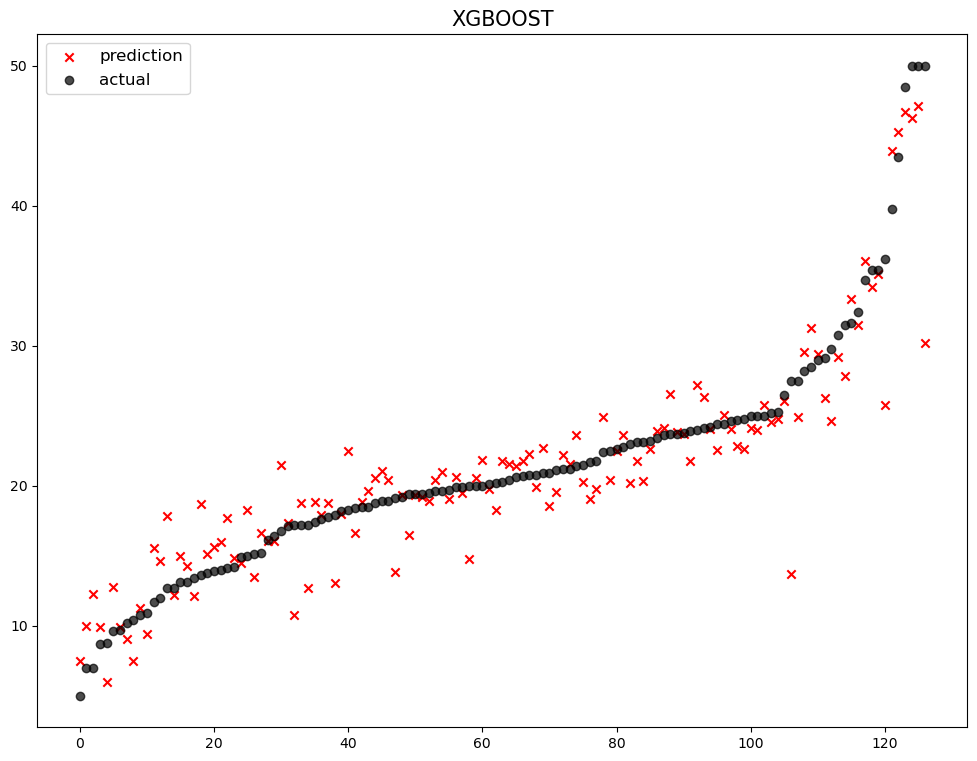

                                                model        mse
0                            ElasticNet(lr_ratio=0.8)  23.156236
1                              Standardard ElasticNet  22.694970
2                                     Ridge (alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                    GradientBoost Ensemble (lr=0.01)  21.982151
6                                     voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                                RandomForestEnsemble  10.536140
9                                             XGBOOST  10.518450
10                     RandomForest Ensemble w/Tuning  10.196040
11                             GradientBoost Ensemble   8.956141
12  GradientBoost Ensemble (lr=0.01,est=1000,subsa...   8.887780
13          GradientBoost Ensemble (lr=0.01,est=1000)   8.546408


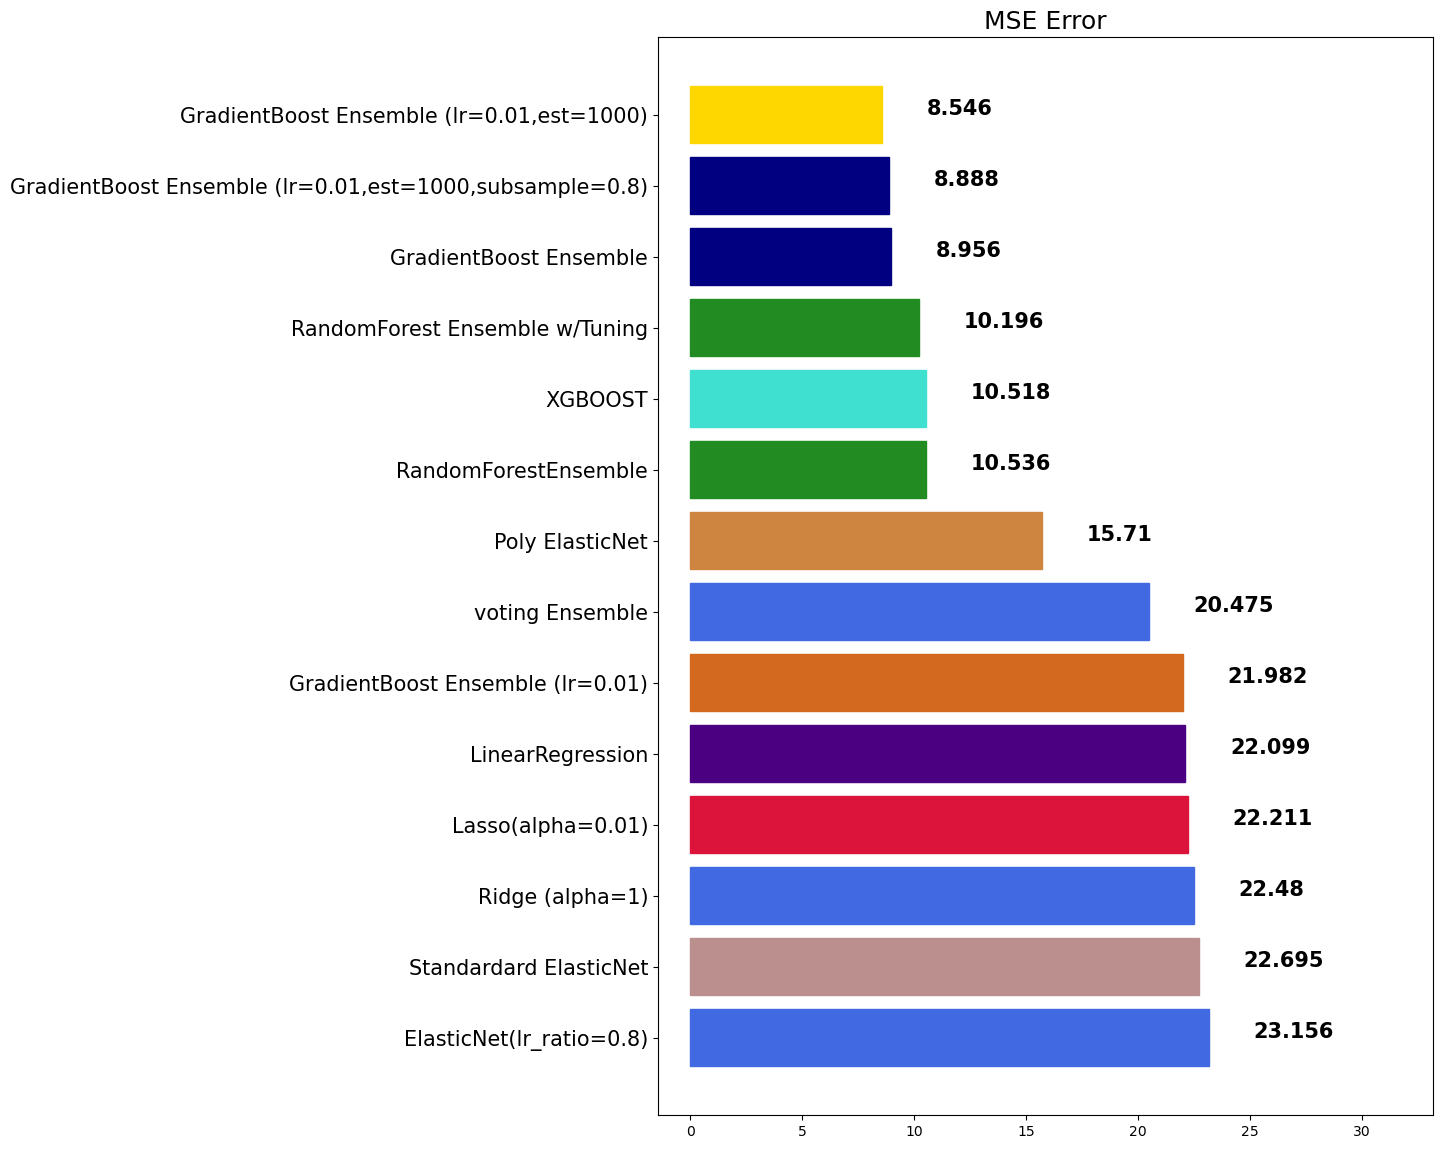

In [36]:
# XGBoost 회귀 모델 생성
# random_state=42 → 실행할 때마다 같은 결과를 얻기 위해 랜덤 고정
xgb=XGBRegressor(random_state=42)

# 모델 학습
# x_train : 입력 데이터(문제)
# y_train : 정답 데이터(답)
xgb.fit(x_train,y_train)

# 학습이 끝난 모델로 테스트 데이터 예측
# x_test : 처음 보는 데이터
# xgb_pred : 예측 결과
xgb_pred=xgb.predict(x_test)

# 모델 성능 평가
# 'XGBOOST' : 모델 이름
# xgb_pred : 예측값
# y_test   : 실제값
# → MSE(평균 제곱 오차) 계산
mse_eval('XGBOOST',xgb_pred,y_test)

## 주요 Hyperparameter
random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!

n_jobs: CPU 사용 갯수

learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와
같이 튜닝. default=0.1

n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100

max_depth: 트리의 깊이. 과대적합 방지용. default=3.

subsample: 샘플 사용 비율. 과대적합 방지용. default=1.0

max_features: 최대로 사용할 feature의 비율. 과대적합 방지용. default=1.0

아주 좋은 질문이야 👍
이거 **많이 헷갈리는 포인트**라서 정확히 짚고 갈게.

---

## ✅ 결론부터 한 줄로

> **네, 맞아.
> 트리 하나를 만들 때 전체 데이터 중 “랜덤으로 80%만 골라서” 만든다는 뜻이야.**

하지만 ❗
👉 **매번 같은 80%가 아니다** ← 이게 핵심이야.

---

## 🔍 subsample = 0.8 이 정확히 의미하는 것

```python
subsample = 0.8
```

### 뜻

* **각 트리(tree)를 만들 때**
* 전체 훈련 데이터의 **80%만 랜덤 추출해서 사용**
* 나머지 20%는 **그 트리에서는 사용 안 함**

---

## 🧠 중요한 오해 정리 (이게 포인트!)

### ❌ 잘못된 생각

> “처음에 80%만 뽑아서
> 그걸로 계속 트리를 만든다”

### ⭕ 진짜 의미

> **트리 하나 만들 때마다
> 매번 다른 80%를 랜덤으로 뽑는다**

---

## 📌 예시로 이해해보자

### 전체 데이터가 100개라면

#### 🌳 1번째 트리

* 데이터: 1 ~ 100 중 **랜덤 80개**

#### 🌳 2번째 트리

* 또 다시 **다른 랜덤 80개**

#### 🌳 3번째 트리

* 또 다른 80개

👉 그래서 **트리마다 조금씩 다른 시각**을 가짐

---

## 📚 왜 이렇게 할까? (진짜 중요한 이유)

### 1️⃣ 과적합 방지

* 모든 트리가 **같은 데이터만 보면**
  → 외워버림 ❌
* 일부만 보게 하면
  → 일반화 능력 ⬆️

### 2️⃣ 모델 다양성 증가

* 트리마다 학습 데이터가 다름
* 각 트리가 **조금씩 다른 판단**을 함
* 최종 결과가 더 안정적

---

## 🎓 공부 비유 (제일 이해 잘 됨)

* 학생이 문제집 **전부**를 매번 풀면
  → 답 외움 ❌
* 매번 **80%만 랜덤으로** 풀게 하면
  → 진짜 이해 ⭕

👉 subsample = 0.8 은
**“문제집 일부만 골라서 매번 다르게 공부”**

---

## ⚖️ RandomForest랑 헷갈리지 말기

| 모델                  | 데이터 사용 방식                |
| ------------------- | ------------------------ |
| RandomForest        | **항상 bootstrap (중복 허용)** |
| Boosting (XGB/LGBM) | **선택 사항 (subsample)**    |

* 부스팅은 원래 **전체 데이터 사용**
* `subsample < 1` → 일부러 랜덤성 추가

---

## 🔑 최종 정리 (이 문장 기억!)

> **subsample=0.8은
> “트리를 하나 만들 때마다
> 전체 데이터 중 80%만 랜덤으로 사용한다”는 뜻이다**

---

다음으로 자연스럽게 이어지는 질문 👇

* ❓ 그럼 **80%가 항상 좋은가?**
* ❓ subsample 너무 작으면 무슨 일 생김?
* ❓ colsample_bytree랑 뭐가 다른지

👉 뭐부터 볼까?


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [10:42:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "max_features" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


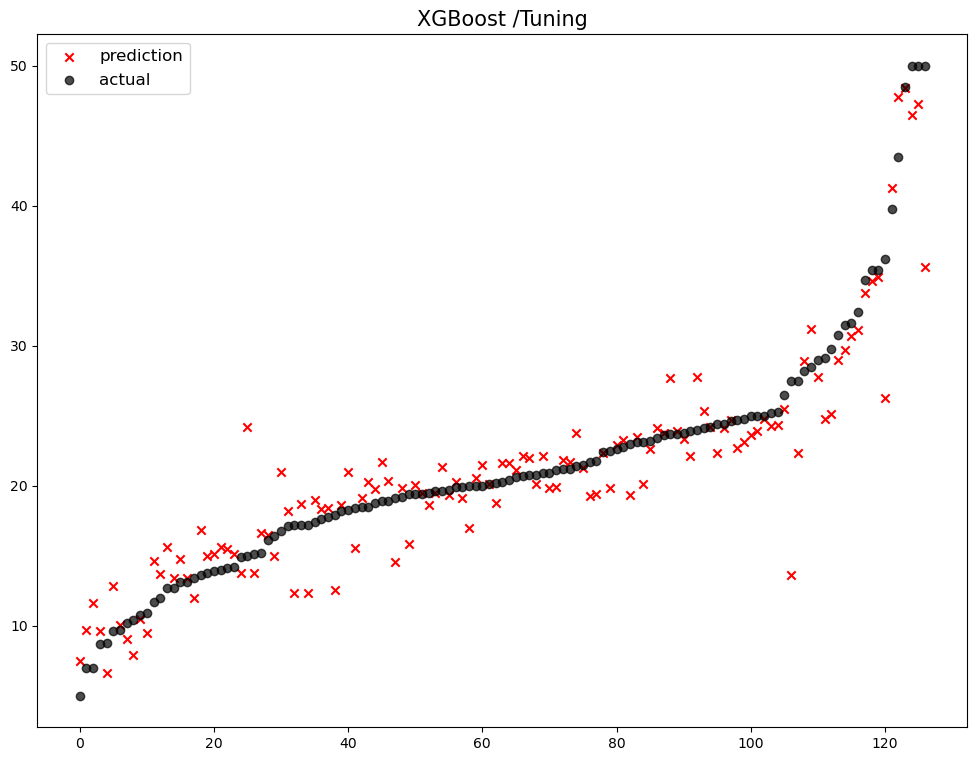

                                                model        mse
0                            ElasticNet(lr_ratio=0.8)  23.156236
1                              Standardard ElasticNet  22.694970
2                                     Ridge (alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                    GradientBoost Ensemble (lr=0.01)  21.982151
6                                     voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                                RandomForestEnsemble  10.536140
9                                             XGBOOST  10.518450
10                     RandomForest Ensemble w/Tuning  10.196040
11                             GradientBoost Ensemble   8.956141
12  GradientBoost Ensemble (lr=0.01,est=1000,subsa...   8.887780
13                                    XGBoost /Tuning   8.770194
14          GradientBoost

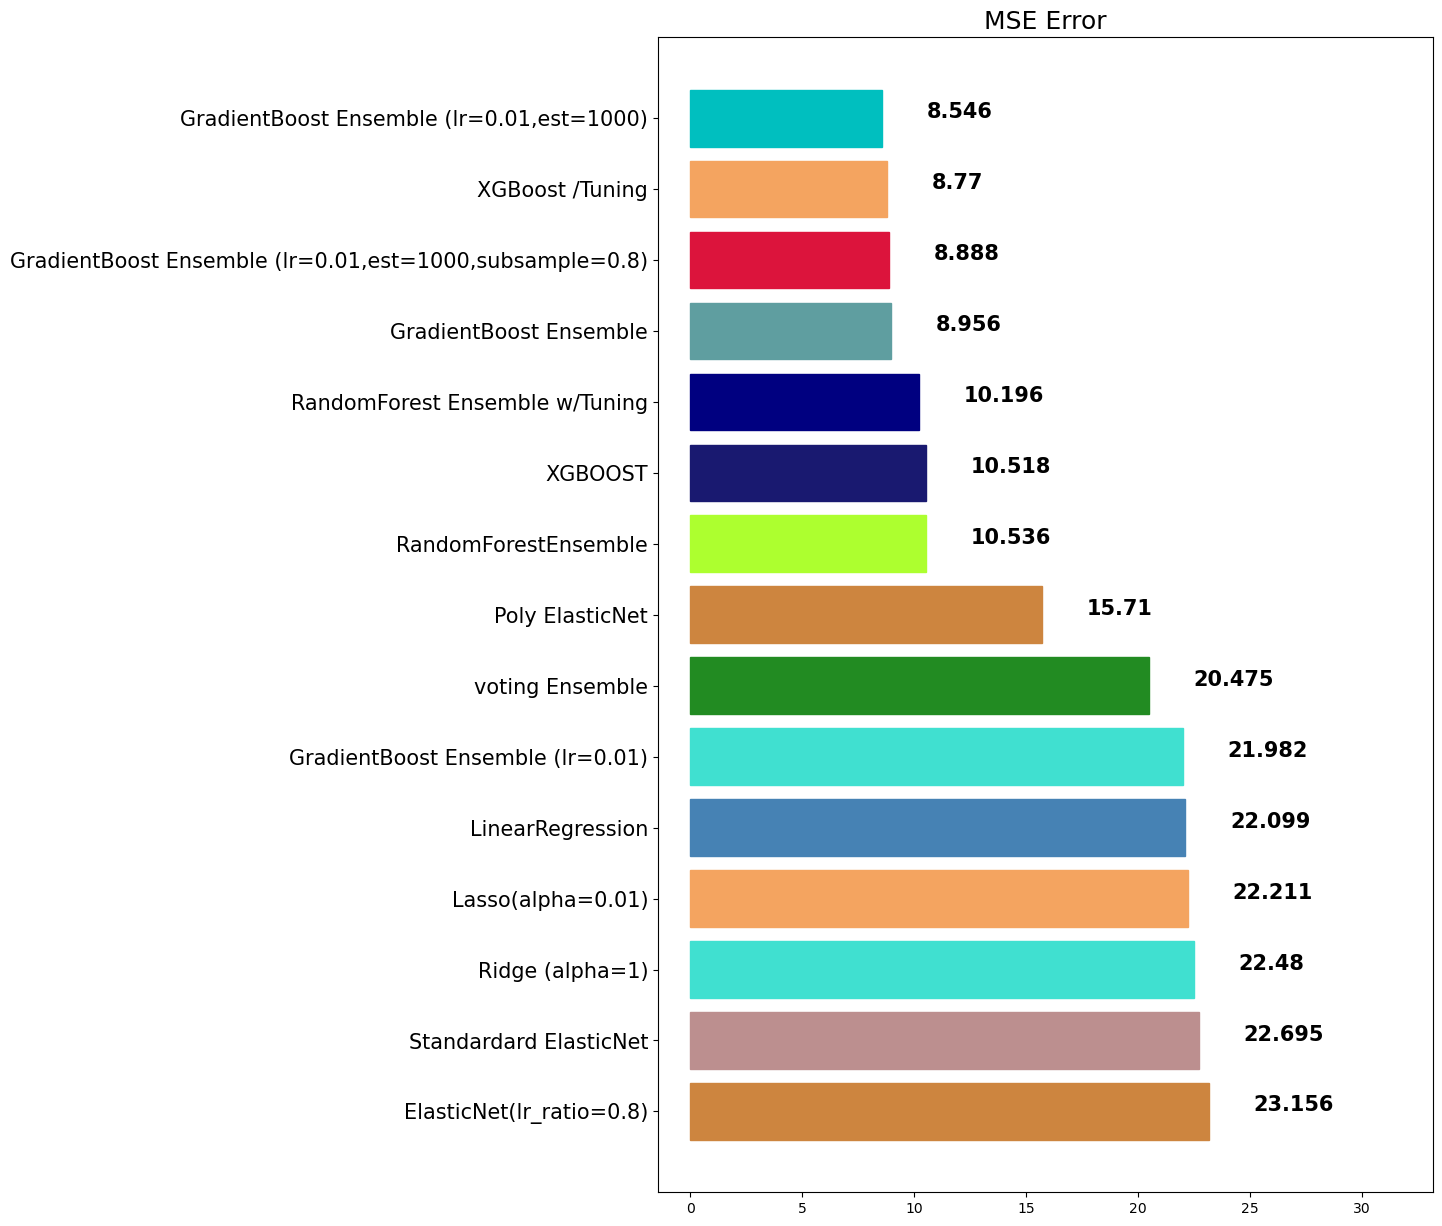

In [37]:
# XGBoost 회귀 모델 생성 (튜닝 버전)
xgb=XGBRegressor(random_state=42,# 결과 재현을 위해 랜덤 고정
                 learning_rate=0.01,# 한 번에 아주 조금씩 학습 (천천히, 안정적으로)
                 n_estimators=1000, # 나무를 1000개 만들어 반복 학습
                 subsample=0.8,# 각 나무마다 데이터의 80%만 사용 (과적합 방지)
                 max_features=0.8,# 각 나무마다 변수의 80%만 사용
                 max_depth=7) # 나무 하나의 최대 깊이 (너무 복잡하지 않게 제한)


# 모델 학습
xgb.fit(x_train,y_train)

# 테스트 데이터 예측
xgb_pred=xgb.predict(x_test)

# 평균 제곱 오차(MSE)로 성능 평가
mse_eval('XGBoost /Tuning',xgb_pred,y_test)

## LightGBM

### 주요 특징
scikit-learn 패키지가 아닙니다.

성능이 우수함

속도도 매우 빠릅니다.

In [38]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


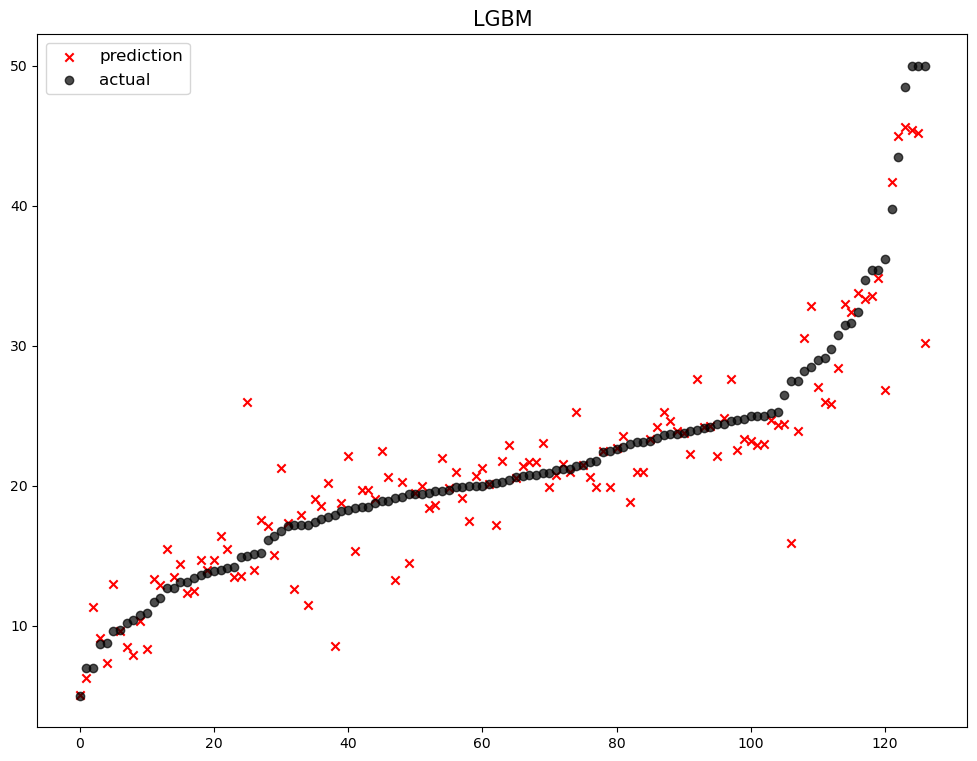

                                                model        mse
0                            ElasticNet(lr_ratio=0.8)  23.156236
1                              Standardard ElasticNet  22.694970
2                                     Ridge (alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                    GradientBoost Ensemble (lr=0.01)  21.982151
6                                     voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                                                LGBM  10.937726
9                                RandomForestEnsemble  10.536140
10                                            XGBOOST  10.518450
11                     RandomForest Ensemble w/Tuning  10.196040
12                             GradientBoost Ensemble   8.956141
13  GradientBoost Ensemble (lr=0.01,est=1000,subsa...   8.887780
14                       

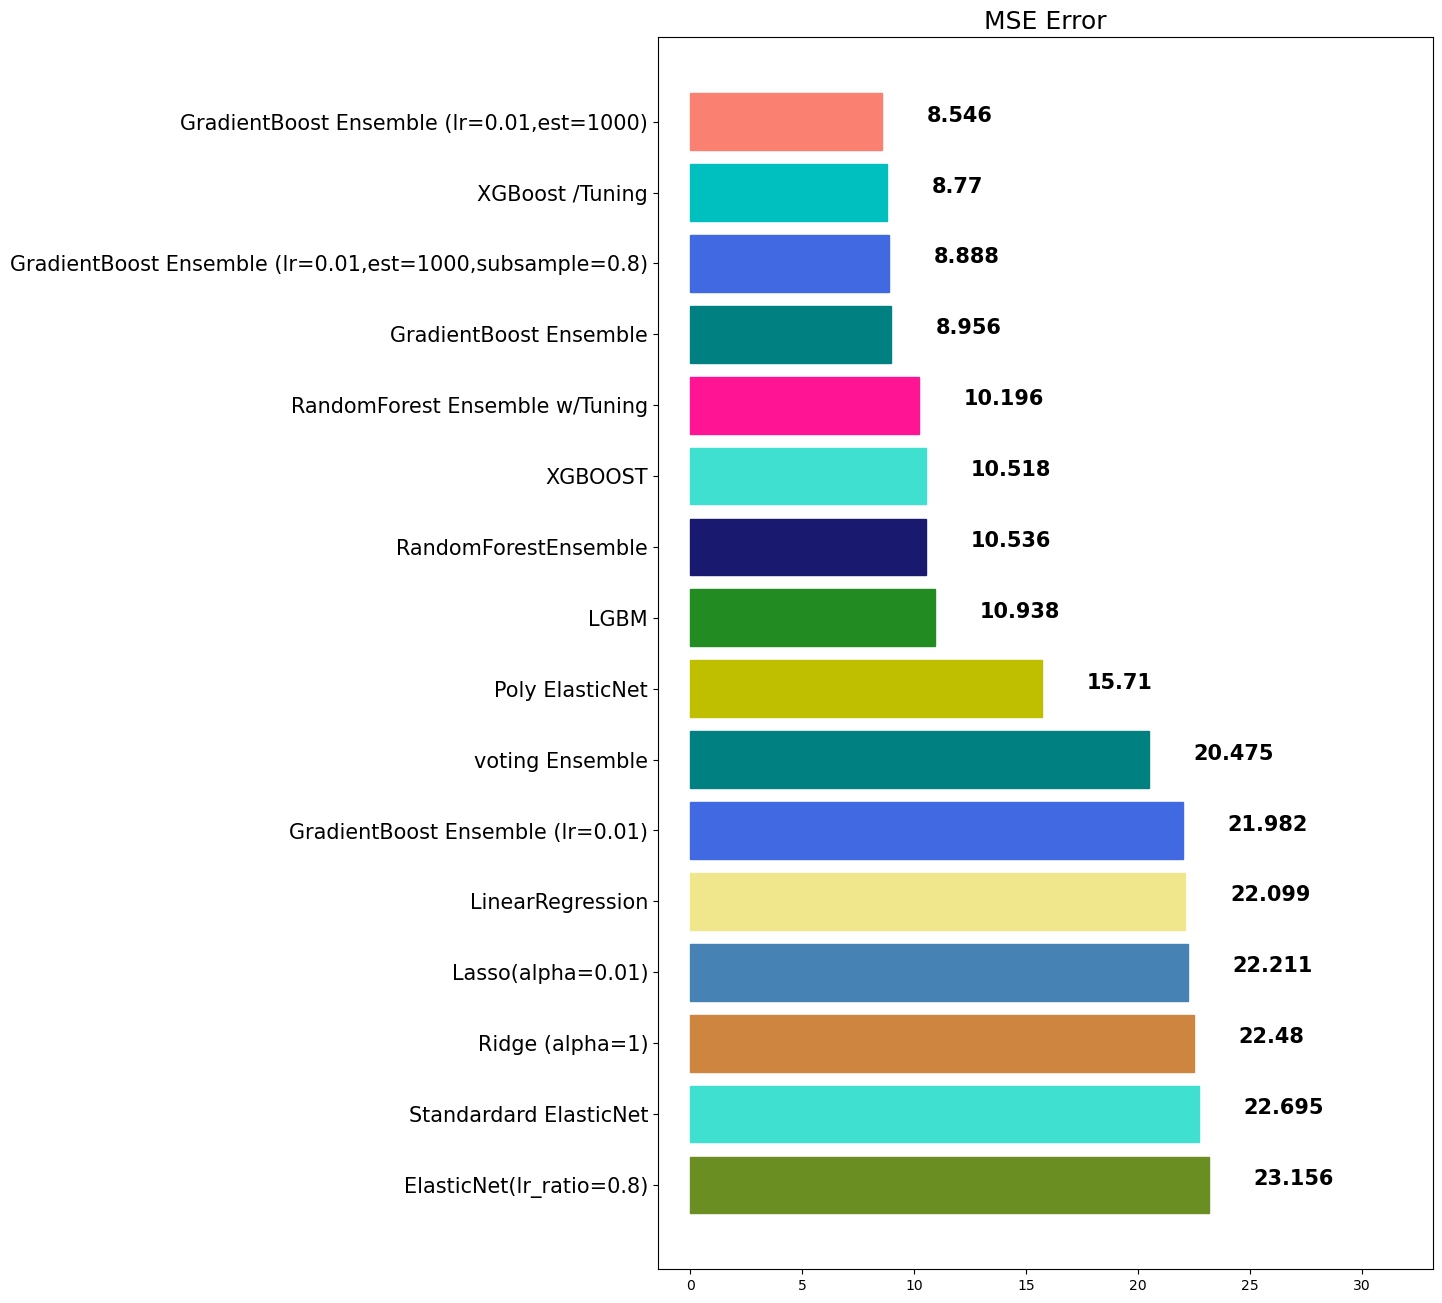

In [39]:
# LightGBM 라이브러리에서
# 회귀 모델과 분류 모델 불러오기
from lightgbm import LGBMRegressor,LGBMClassifier

lgbm=LGBMRegressor(random_state=42, # 실행할 때마다 동일한 결과를 얻기 위해 랜덤 고정
                   verbose=-1)# 학습 중 출력 메시지 끄기 (로그 정리용)


# 모델 학습
# x_train : 입력 데이터 (문제)
# y_train : 정답 데이터 (답)
lgbm.fit(x_train,y_train)
# 테스트 데이터로 예측
# lgbm_pred : 예측 결과
lgbm_pred=lgbm.predict(x_test)



# 모델 성능 평가
# MSE(평균 제곱 오차) 계산
mse_eval('LGBM',lgbm_pred,y_test)

## 주요 Hyperparameter
random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!

n_jobs: CPU 사용 갯수

learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 
적절한 값을 찾아야함. n_estimators와
같이 튜닝. default=0.1

n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100

max_depth: 트리의 깊이. 과대적합 방지용. default=3.
colsample_bytree: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

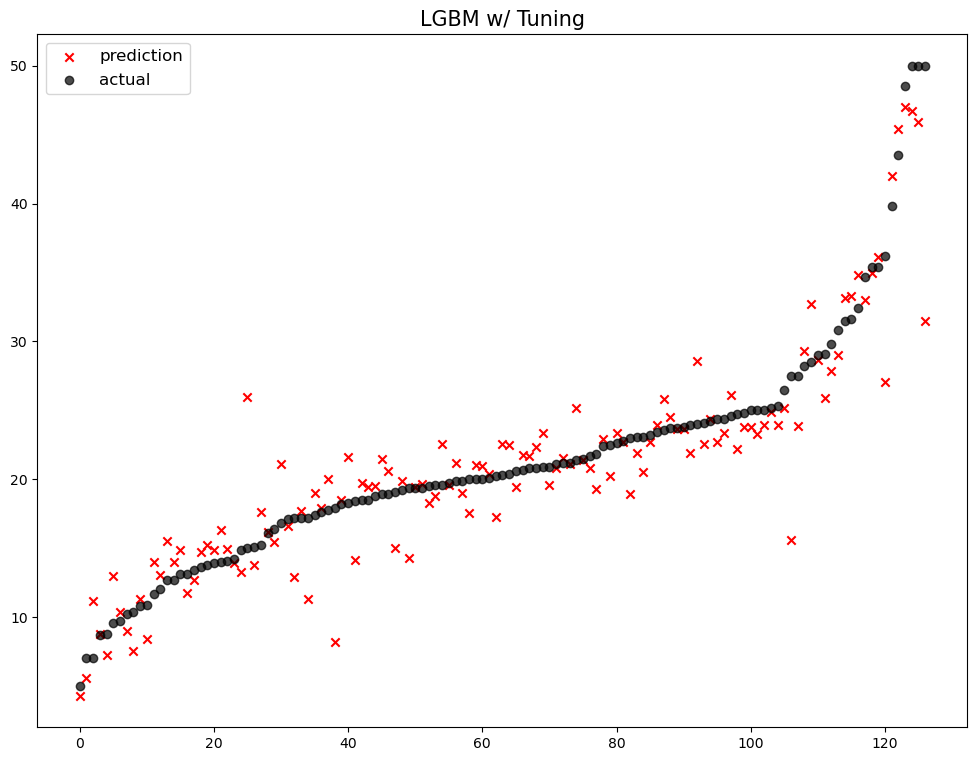

                                                model        mse
0                            ElasticNet(lr_ratio=0.8)  23.156236
1                              Standardard ElasticNet  22.694970
2                                     Ridge (alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                    GradientBoost Ensemble (lr=0.01)  21.982151
6                                     voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                                                LGBM  10.937726
9                                RandomForestEnsemble  10.536140
10                                            XGBOOST  10.518450
11                                     LGBM w/ Tuning  10.252945
12                     RandomForest Ensemble w/Tuning  10.196040
13                             GradientBoost Ensemble   8.956141
14  GradientBoost Ensembl

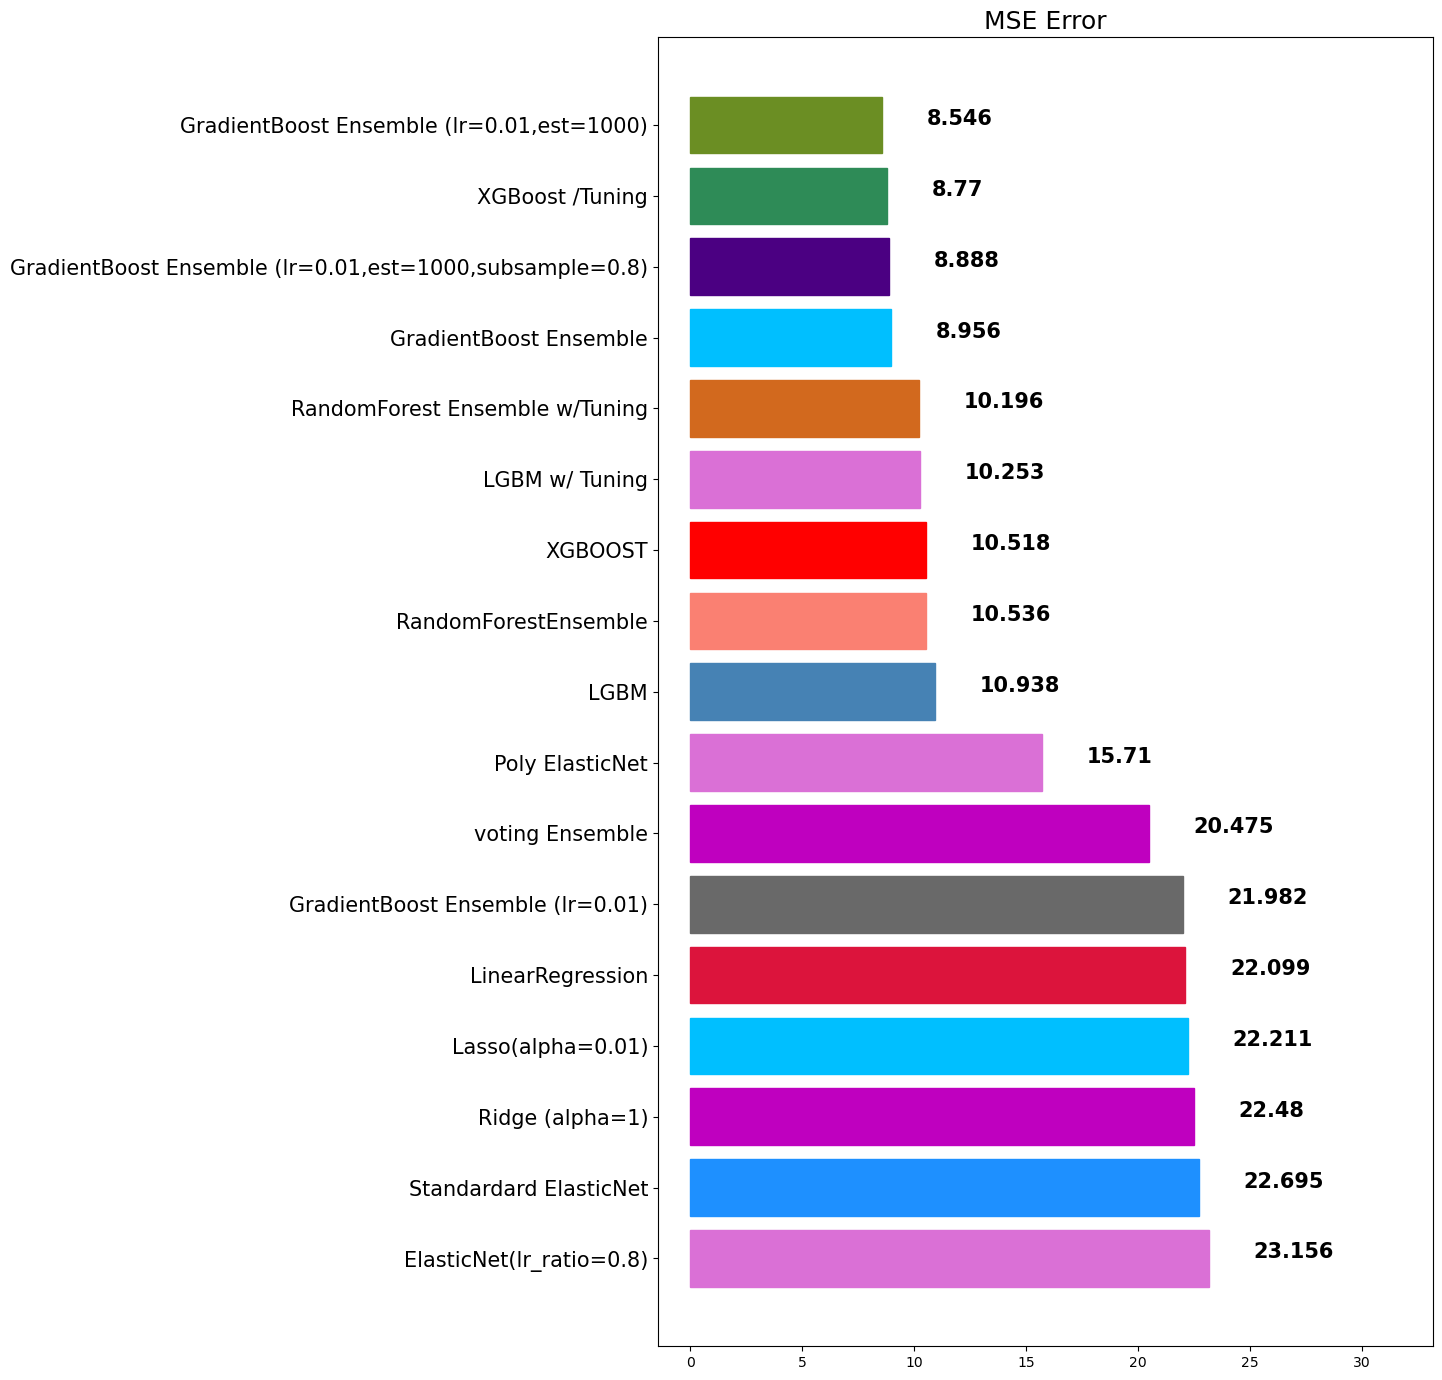

In [40]:
# LightGBM 회귀 모델 생성 (튜닝 버전)
lgbm=LGBMRegressor(random_state=42, # 랜덤 고정 → 실행할 때마다 같은 결과
                   learning_rate=0.01, # 아주 천천히 학습 (안정적)
                   n_estimators=2000, # 나무 2000개로 반복 학습
                   colsample_bytree=0.9,# 각 나무가 feature의 90%만 사용
                   max_depth=7)# 나무 깊이 제한 → 과적합 방지


# 모델 학습
lgbm.fit(x_train,y_train)

# 테스트 데이터 예측
lgbm_pred=lgbm.predict(x_test)

# 평균 제곱 오차(MSE)로 성능 평가
mse_eval('LGBM w/ Tuning',lgbm_pred,y_test)

# Stacking
**개별 모델이 예측한 데이터를 기반으로 final_estimator 종합하여 예측을 수행합니다**


성능을 극으로 끌어올릴 때 활용하기도 합니다.
과대적합을 유발할 수 있습니다. (특히, 데이터셋이 적은 경우)


 **앙상블 중에서도 제일 헷갈리는 Stacking**


---

## ✅ 한 줄 요약 (이거 먼저!)

> **스태킹(Stacking)은
> “여러 모델의 답안을 다시 한 번 모아서
> 최종 선생님이 채점하는 방식”이다**

---

## 🧠 문장 하나씩 아주 쉽게 풀어보자

### 📌 원문

> **개별 모델이 예측한 데이터를 기반으로 final_estimator 종합하여 예측을 수행합니다**

### 🔽 초등학생 버전

> 여러 명의 학생이 문제를 풀고
> 그 답들을 모아서
> **마지막 선생님이 최종 답을 정한다**

---

## 👨‍🎓👩‍🎓👨‍🎓 스태킹을 공부로 비유하면

### 1️⃣ 개별 모델들 (학생들)

* 랜덤포레스트
* XGBoost
* LightGBM
* 선형회귀 등

👉 각자 **다른 방식으로 문제를 품**

---

### 2️⃣ 개별 모델의 예측값 = 새로운 데이터

* 원래 데이터 ❌
* **모델들이 낸 답안들 ⭕**

📌 예:

```
모델 A 예측: 90
모델 B 예측: 100
모델 C 예측: 95
```

👉 이 숫자들이 **새로운 입력 데이터**가 됨

---

### 3️⃣ final_estimator (최종 선생님)

* 위 예측값들을 보고
* **어떤 모델 말을 더 믿을지 학습**

📌 예:

```
“이 상황에선 A가 잘 맞네”
“저 상황에선 C가 더 정확하네”
```

---

## 🔄 전체 흐름 한 번에 보기

```
원본 데이터
   ↓
모델 A 예측
모델 B 예측   →  예측값들을 모음  → final_estimator → 최종 예측
모델 C 예측
```

---

## 🧠 왜 성능이 좋아질까?

> **모델마다 잘하는 영역이 다르기 때문**

* 모델 A → 단순한 패턴 강함
* 모델 B → 복잡한 패턴 강함
* 모델 C → 노이즈에 강함

👉 final_estimator가
**상황별로 잘하는 모델을 골라 씀**

---

## ⚠️ 근데 왜 과적합이 생길까?

### 이유 1️⃣ 데이터가 적을 때

* 학습 데이터가 적음
* 모델이 많음
* final_estimator가 **답을 외워버림**

### 이유 2️⃣ 예측값 자체도 “학습 데이터”

* 이미 한 번 학습한 결과를
* 다시 학습에 사용

👉 **이중 학습 → 과적합 위험**

---

## 📌 비유로 한 번에 이해하기

* 학생 3명이
* 같은 문제를 풀고
* 선생님이 “누가 맞았는지” 외워버림

→ 시험 바뀌면 망함 ❌

---

## ⚖️ 다른 앙상블이랑 차이

| 방법           | 설명            |
| ------------ | ------------- |
| Voting       | 다수결           |
| Bagging      | 여러 번 뽑아서 평균   |
| Boosting     | 틀린 거 계속 보완    |
| **Stacking** | **답안을 다시 학습** |

👉 **가장 강력하지만 가장 위험**

---

## ✅ 진짜 핵심 문장 (이거 꼭 기억!)

> **Stacking은
> 모델의 예측 결과를
> 다시 데이터로 써서
> 또 하나의 모델이 학습하는 방식이다**

---

## 📌 언제 쓰면 좋을까?

* 데이터 많음 ⭕
* 다양한 모델 있음 ⭕
* 성능을 **끝까지 끌어올리고 싶을 때** ⭕

❌ 데이터 적을 때는 조심!

---




In [41]:
# 스태킹 회귀 모델 불러오기
from sklearn.ensemble import StackingRegressor



# 1단계(base) 모델들 정의
# 서로 성격이 다른 모델들을 섞음
stack_models=[
    ('elasticnet',poly_pipeline),  # 선형 모델 (기본 패턴)
    ('randomforest',rfr), # 배깅 모델 (안정적)
    ('gbr',gbr),# 부스팅 모델 (오차 보완)
    ('lgbm',lgbm) # 빠른 부스팅 모델
]

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [10:42:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "max_features" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


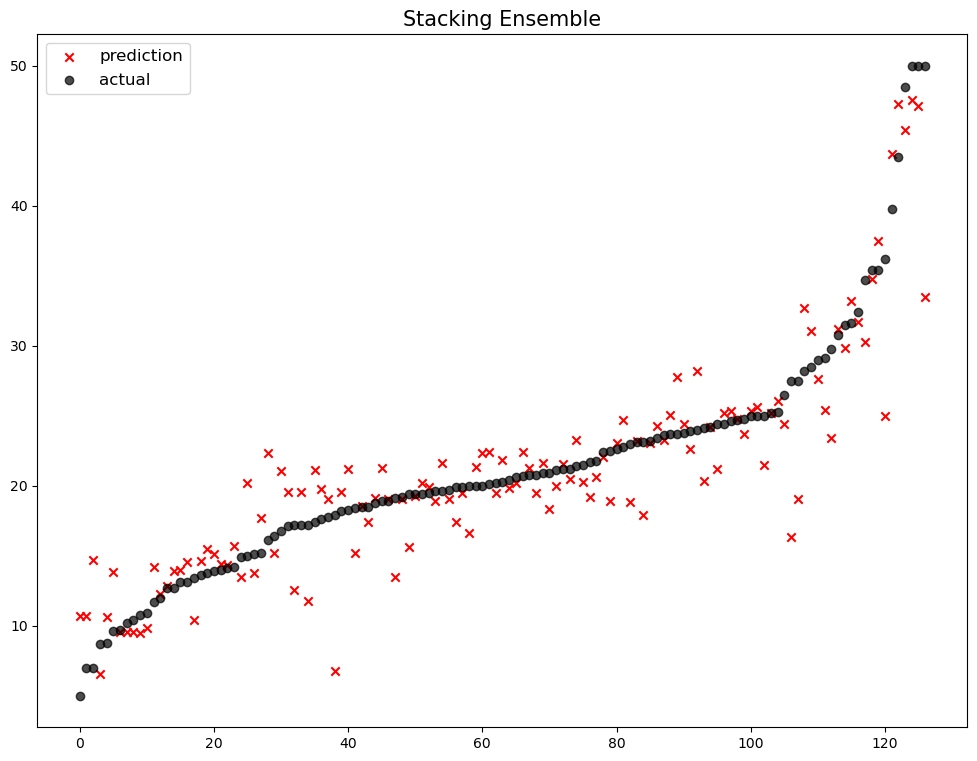

                                                model        mse
0                            ElasticNet(lr_ratio=0.8)  23.156236
1                              Standardard ElasticNet  22.694970
2                                     Ridge (alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                    GradientBoost Ensemble (lr=0.01)  21.982151
6                                     voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                                   Stacking Ensemble  11.892075
9                                                LGBM  10.937726
10                               RandomForestEnsemble  10.536140
11                                            XGBOOST  10.518450
12                                     LGBM w/ Tuning  10.252945
13                     RandomForest Ensemble w/Tuning  10.196040
14                       

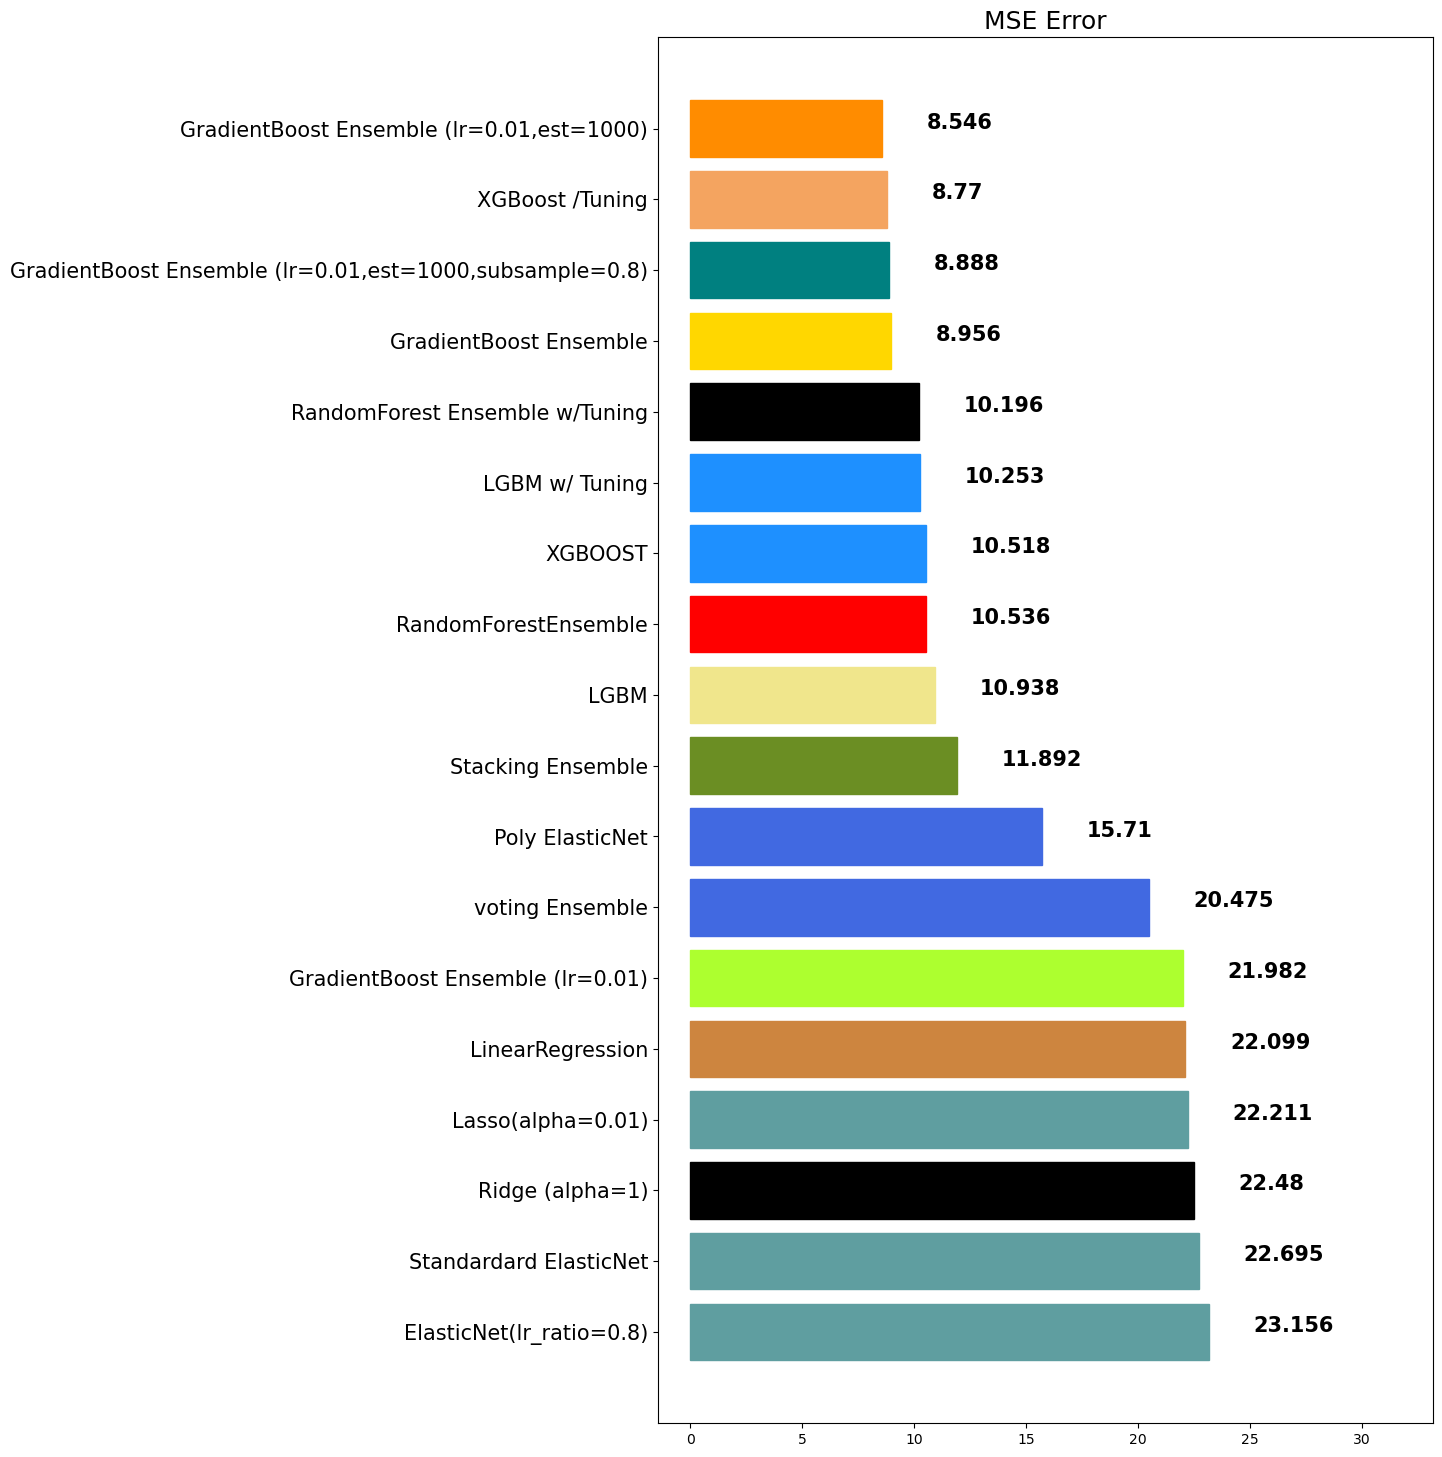

In [42]:
# 스태킹 모델 생성
stack_reg=StackingRegressor(stack_models,# 1단계 모델들
                            final_estimator=xgb, # 최종 판단 모델 (XGBoost)
                            n_jobs=-1)# CPU 전부 사용


# 스태킹 모델 학습
stack_reg.fit(x_train,y_train)
# 테스트 데이터 예측
stack_pred=stack_reg.predict(x_test)
# 성능 평가 (MSE)
mse_eval('Stacking Ensemble',stack_pred,y_test)

## Weighted Blending

각 모델의 예측값에 대하여 weight를 곱하여 최종 output 계산

모델에 대한 가중치를 조절하여, 최종 output을 산출합니다.

가중치의 합은 1.0이 되도록 합니다.

In [43]:
# 각 모델의 예측 결과를 하나의 딕셔너리에 정리

final_outputs={
    'elasticnet':poly_pred, # 선형 모델 예측
    'randomforest':rfr_pred,# 랜덤포레스트 예측
    'gbr':gbr_pred,# 그래디언트 부스팅 예측
    'xgb':xgb_pred,# XGBoost 예측

    'lgbm':lgbm_pred, # LightGBM 예측
    'stacking':stack_pred # 스태킹 앙상블 예측
}

In [44]:
# 각 모델의 예측값에 가중치를 곱해 최종 예측 생성
# 성능이 좋은 모델일수록 가중치를 크게 설정

final_prediction=\
final_outputs['elasticnet']*0.1\
+final_outputs['randomforest']*0.1\
+final_outputs['gbr']*0.2\
+final_outputs['xgb']*0.25\
+final_outputs['lgbm']*0.15\
+final_outputs['stacking']*0.2

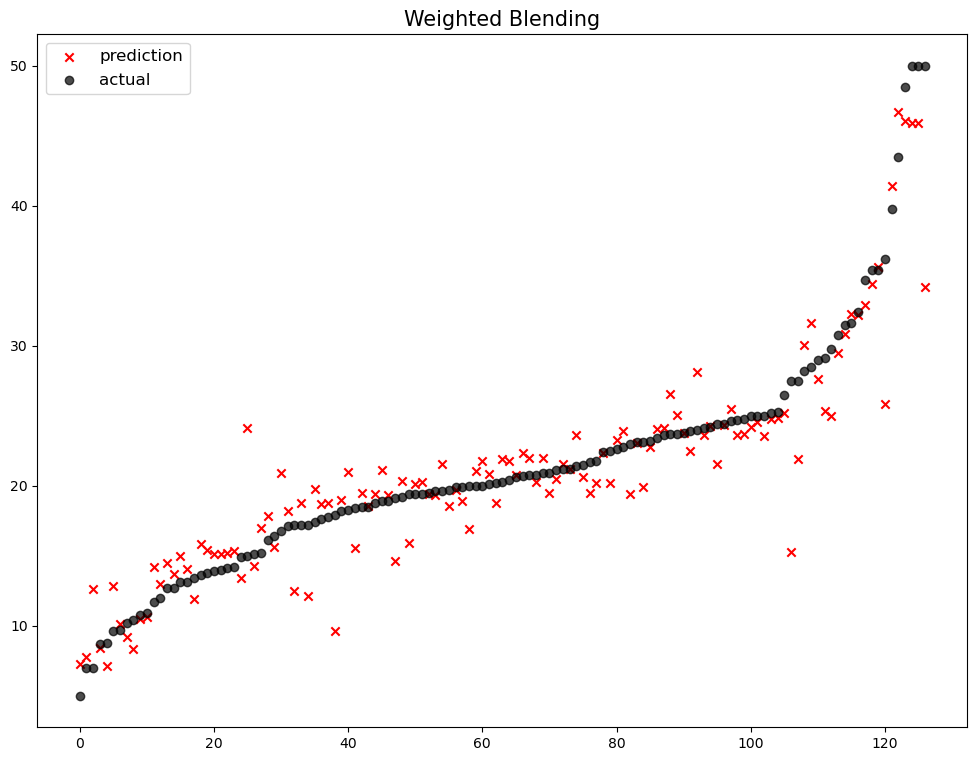

                                                model        mse
0                            ElasticNet(lr_ratio=0.8)  23.156236
1                              Standardard ElasticNet  22.694970
2                                     Ridge (alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                    GradientBoost Ensemble (lr=0.01)  21.982151
6                                     voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                                   Stacking Ensemble  11.892075
9                                                LGBM  10.937726
10                               RandomForestEnsemble  10.536140
11                                            XGBOOST  10.518450
12                                     LGBM w/ Tuning  10.252945
13                     RandomForest Ensemble w/Tuning  10.196040
14                       

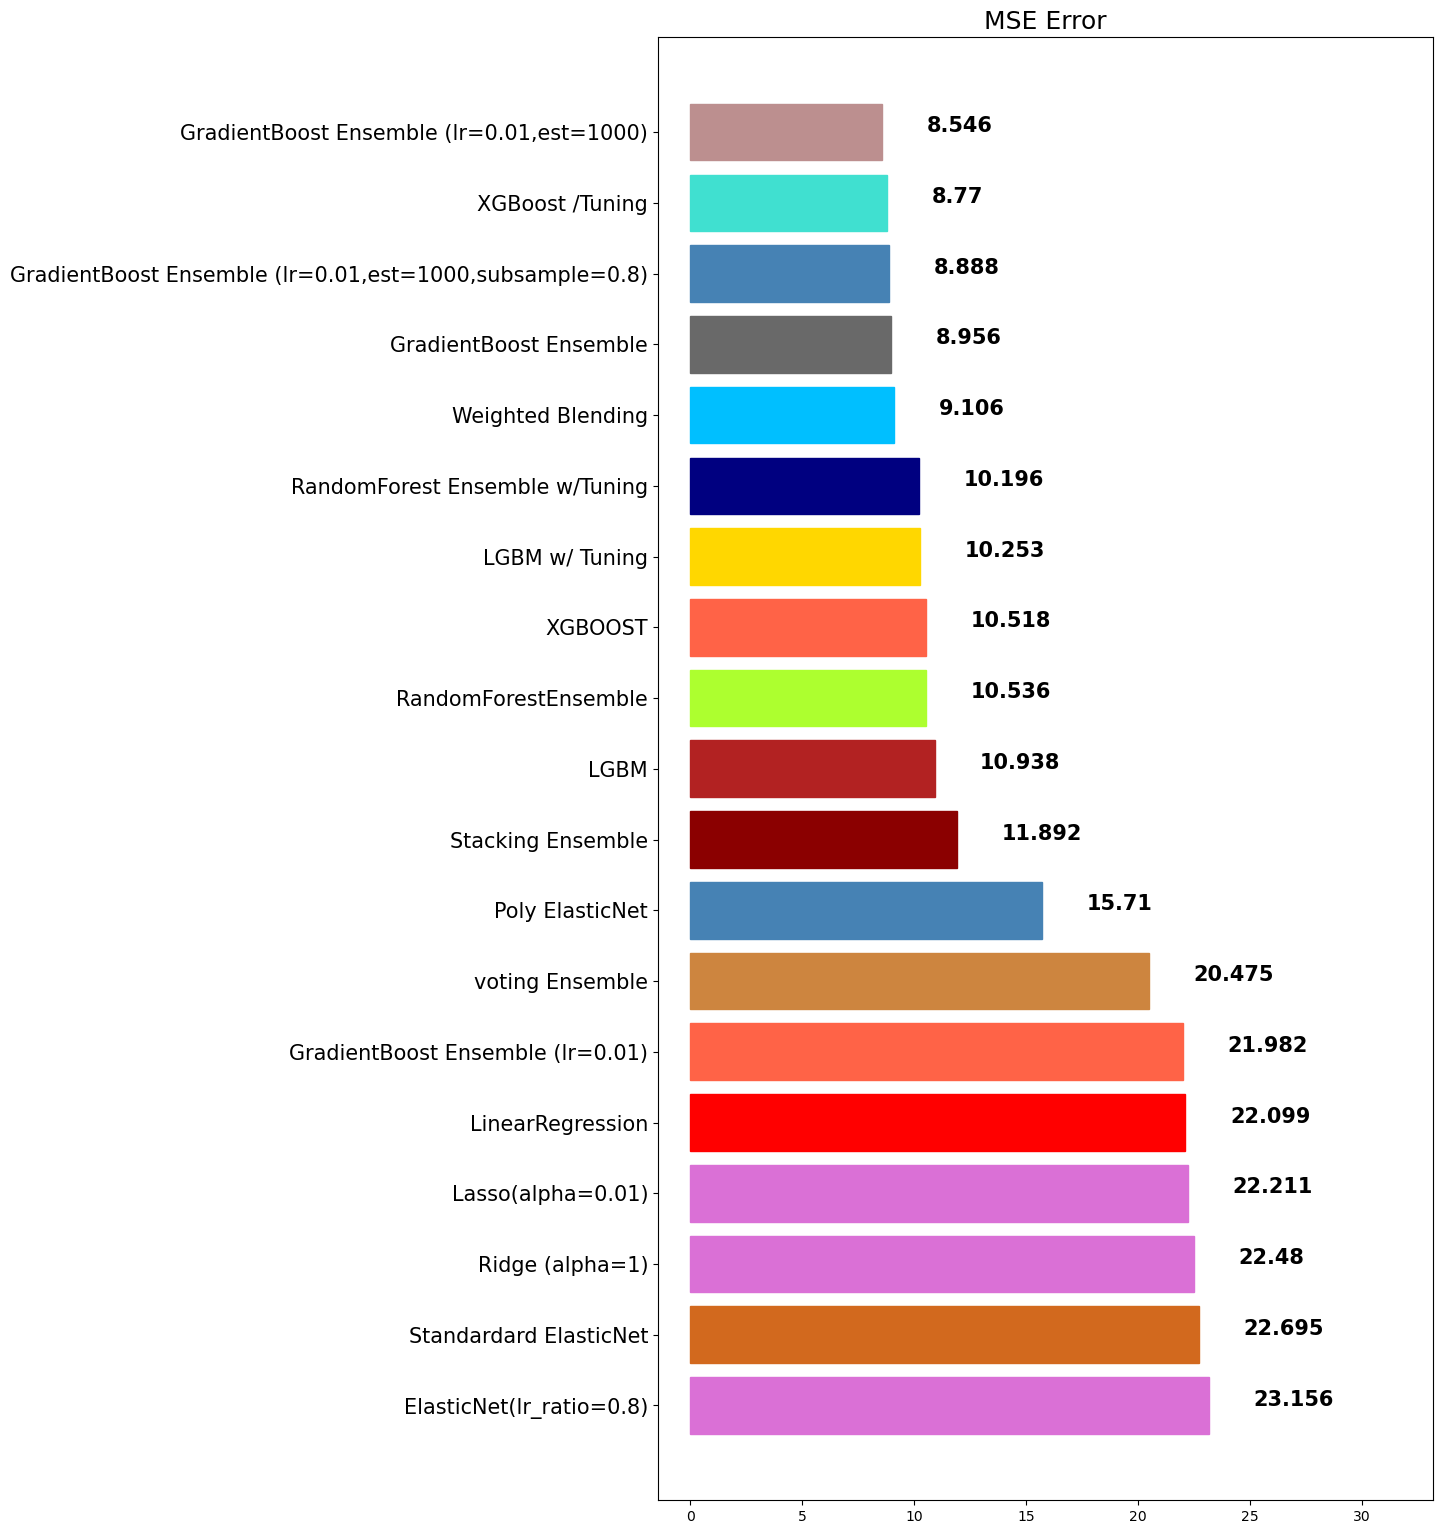

In [45]:
# 가중 평균 앙상블 성능 평가 (MSE)
mse_eval('Weighted Blending',final_prediction,y_test)

앙상블 모델을 정리하며

1. 앙상블은 대체적으로 단일 모델 대비 성능이 좋습니다.

2. 앙상블을 앙상블하는 기법인 Stacking과 Weighted Blending도 참고해 볼만 합니다.

3. 앙상블 모델은 적절한 Hyperparameter 튜닝이 중요합니다.

4. 앙상블 모델은 대체적으로 학습시간이 더 오래 걸립니다.

5. 따라서, 모델 튜닝을 하는 데에 걸리는 시간이 오래 소요됩니다.

## Cross Validation

- Cross Validation이란 모델을 평가하는 하나의 방법입니다.
- K-겹 교차검증(K-fold Cross Validation)을 많이 활용합니다.


K-겹 교차 검증은 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 합니다. 아래의 그림을 보면, 데이터를 5개로 쪼개 매번 테스트셋
을 바꿔나가는 것을 볼 수 있습니다.

In [46]:
# K-Fold 교차검증을 위한 도구 불러오기
# 데이터를 여러 번 나눠서 학습/평가할 수 있게 해줌
from sklearn.model_selection import KFold

# -------------------------------
# 1️⃣ 데이터를 몇 조각으로 나눌지 설정
# -------------------------------
n_splits=5  # 데이터를 5등분 → 5번 시험을 본다는 의미



# -------------------------------
# 2️⃣ K-Fold 객체 생성
# -------------------------------
kfold=KFold(n_splits=n_splits,  # 5개의 fold로 나눔
            random_state=42,  # 데이터를 먼저 섞어서 나눔 (편향 방지)
            shuffle=True) # 섞는 방식 고정 → 실행할 때마다 동일한 결과

In [47]:
df.head()

CRIM    ZN  INDUS CHAS    NOX  ...    TAX  PTRATIO       B LSTAT  MEDV
0  0.00632  18.0   2.31    0  0.538  ...  296.0     15.3  396.90  4.98  24.0
1  0.02731   0.0   7.07    0  0.469  ...  242.0     17.8  396.90  9.14  21.6
2  0.02729   0.0   7.07    0  0.469  ...  242.0     17.8  392.83  4.03  34.7
3  0.03237   0.0   2.18    0  0.458  ...  222.0     18.7  394.63  2.94  33.4
4  0.06905   0.0   2.18    0  0.458  ...  222.0     18.7  396.90  5.33  36.2

[5 rows x 14 columns]

In [48]:
# -------------------------------
# 3️⃣ 입력(X)과 정답(Y) 분리
# -------------------------------
# X : 문제(입력값) → 집의 여러 특징들
X=np.array(df.drop('MEDV',axis=1))

# Y : 정답(타겟) → 예측해야 할 집값
Y=np.array(df['MEDV'])

In [49]:
# -------------------------------
# 4️⃣ 사용할 모델 생성
# -------------------------------
# K-Fold에서는 이 모델을 매 fold마다 새로 학습함

lgbm_fold=LGBMRegressor(random_state=42)

In [50]:
# -------------------------------
# 5️⃣ 출력 및 평균 계산을 위한 변수
# -------------------------------
i=1   # 몇 번째 fold인지 표시하기 위한 변수
total_error=0 # 모든 fold의 에러(MSE)를 누적할 변수



# -------------------------------
# 6️⃣ K-Fold 교차검증 시작 (핵심)
# -------------------------------
# kfold.split(X)는
# → 학습용 인덱스(train_index)와
# → 테스트용 인덱스(test_index)를 만들어 줌
for train_index,test_index in kfold.split(X):

    # ---------------------------
    # 6-1️⃣ 인덱스를 이용해 데이터 나누기
    # ---------------------------
    # train_index에 해당하는 데이터 → 학습용
    # test_index에 해당하는 데이터 → 테스트용
    x_train_fold,x_test_fold=X[train_index],X[test_index]
    y_train_fold,y_test_fold=Y[train_index],Y[test_index]

    # ---------------------------
    # 6-2️⃣ 모델 학습 후 예측
    # ---------------------------
    # fit()    : 학습
    # predict(): 테스트 데이터 예측
    lgbm_pred_fold=lgbm_fold.fit(x_train_fold,y_train_fold).predict(x_test_fold)

    # ---------------------------
    # 6-3️⃣ 성능 평가 (MSE 계산)
    # ---------------------------
    # 예측값과 실제값의 차이를 제곱해서 평균낸 값
    # 값이 작을수록 성능이 좋음
    error=mean_squared_error(lgbm_pred_fold,y_test_fold)

    # ---------------------------
    # 6-4️⃣ fold별 결과 출력
    # ---------------------------
    print("Fold ={}, predicttion score ={:.2f}".format(i,error))
    # ---------------------------
    # 6-5️⃣ 에러 누적 및 fold 번호 증가
    # ---------------------------
    total_error +=error  # 이번 fold 에러 누적
    i+=1    # 다음 fold로 이동


# -------------------------------
# 7️⃣ 전체 평균 성능 출력
# -------------------------------
print('----'*10)
# 5번의 fold에서 나온 에러의 평균
print("Average Error :%s" % (total_error/n_splits))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fold =1, predicttion score =8.34
Fold =2, predicttion score =10.40
Fold =3, predicttion score =17.58
Fold =4, predicttion score =6.94
Fold =5, predicttion score =12.16
----------------------------------------
Average Error :11.083201392666322


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## Hyperparameter 튜닝
hypterparameter 튜닝시 경우의 수가 너무 많습니다.
따라서, 우리는 자동화할 필요가 있습니다.
sklearn 패키지에서 자주 사용되는 hyperparameter 튜닝을 돕는 클래스는 다음 2가지가 있습니다.

1. RandomizedSearchCV
2. GridSearchCV
적용하는 방법
1. 사용할 Search 방법을 선택합니다.
2. hyperparameter 도메인을 설정합니다. ( max_depth , n_estimators ..등등)
3. 학습을 시킨 후, 기다립니다.
4. 도출된 결과 값을 모델에 적용하고 성능을 비교합니다.

**RandomizedSearchCV**
모든 매개 변수 값이 시도되는 것이 아니라 지정된 분포에서 고정 된 수의 매개 변수 설정이 샘플링됩니다.
시도 된 매개 변수 설정의 수는 n_iter 에 의해 제공됩니다.

## 주요 Hyperparameter (LGBM)
random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!

n_jobs: CPU 사용 갯수

learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와
같이 튜닝. default=0.1

n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100

max_depth: 트리의 깊이. 과대적합 방지용. default=3.

colsample_bytree: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

In [ ]:
# ===============================
# 1. 하이퍼파라미터 후보 목록 정의
# ===============================
# 모델이 사용할 수 있는 "설정 값 후보들"을 딕셔너리로 정리
# RandomizedSearchCV는 여기서 값을 랜덤으로 뽑아 조합을 만

params={
    # 사용할 트리 개수
    # 트리가 많을수록 학습은 정교해지지만 속도는 느려짐
    'n_estimators':[200,500,1000,2000],
     # 학습률 (한 번에 얼마나 배우는지)
    # 크면 빠르지만 불안정, 작으면 느리지만 안정적
    'learning_rate':[0.1,0.05,0.01],
    # 트리의 최대 깊이
    # 깊을수록 복잡한 패턴 학습 가능 (과적합 주의)
    'max_depth':[6,7,8],
    # 하나의 트리를 만들 때 사용할 feature(컬럼) 비율
    # 일부만 쓰면 과적합 방지 효과
    'colsample_bytree':[0.8,0.9,1.0],
    # 학습에 사용할 데이터 샘플 비율
    # 전체 데이터가 아닌 일부만 사용 → 일반화 성능 향상
    'subsample':[0.8,0.9,1.0],
}

In [ ]:
# ===================================
# 2. RandomizedSearchCV 불러오기
# ===================================
# 하이퍼파라미터를 "랜덤 탐색"으로 찾아주는 도구
from sklearn.model_selection import RandomizedSearchCV

# ===================================
# 3. RandomizedSearchCV 객체 생성
# ===================================
# 여러 파라미터 조합 중 랜덤으로 n_iter개를 뽑아
# 교차검증(cv)을 통해 가장 성능 좋은 조합을 찾음

clf=RandomizedSearchCV( # 튜닝할 모델
                        # LightGBM 회귀 모델
                       LGBMRegressor(),
                        # 위에서 정의한 하이퍼파라미터 후보들
                       params,
                       # 랜덤 결과 고정 (실행할 때마다 같은 결과)
                       random_state=42,
                       
                        # 교차검증 개수
                        # 데이터를 3등분해서 학습/검증을 반복
                       cv=3,
                        # 랜덤으로 시도할 파라미터 조합 개수
                        # 전체 조합(324개) 중 25개만 랜덤으로 테스트
                       n_iter=25,
                        # 평가 지표
                        # MSE는 작을수록 좋기 때문에 음수(-)를 붙여 사용
                       scoring='neg_mean_squared_error')

In [ ]:

# ===================================
# 4. 모델 학습 시작
# ===================================
# 내부적으로 일어나는 일:
# 1) 파라미터 조합 랜덤 선택
# 2) 3겹 교차검증 수행
# 3) MSE 계산
# 4) 위 과정을 25번 반복
# 5) 가장 성능 좋은 조합 저장
clf.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=25,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [6, 7, 8],
                                        'n_estimators': [200, 500, 1000, 2000],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# ===================================
# 5. 최고 성능 점수 확인
# ===================================
# 랜덤 탐색 중 가장 성능이 좋았던
# "평균 MSE 점수 (음수값)"
clf.best_score_

np.float64(-13.707228623244996)

In [ ]:

# ===================================
# 6. 최고 성능을 낸 파라미터 조합 확인
# ===================================
# 실제로 가장 잘 나온 설정값들
clf.best_params_

{'subsample': 0.9,
 'n_estimators': 2000,
 'max_depth': 6,
 'learning_rate': 0.01,
 'colsample_bytree': 0.8}

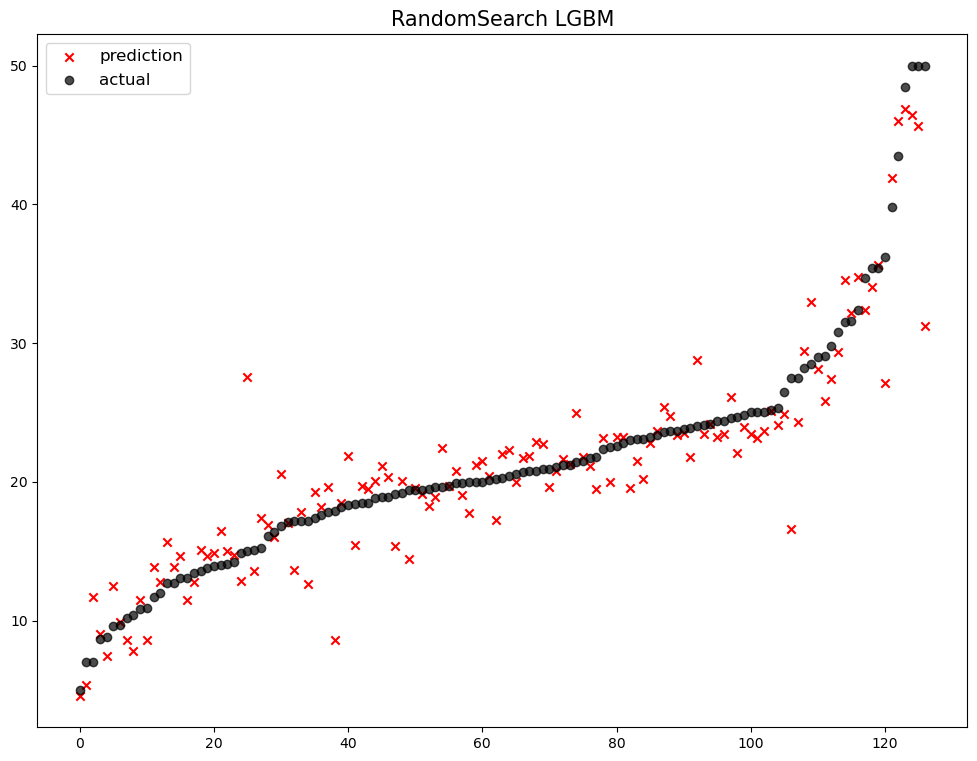

                                                model        mse
0                            ElasticNet(lr_ratio=0.8)  23.156236
1                              Standardard ElasticNet  22.694970
2                                     Ridge (alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                    GradientBoost Ensemble (lr=0.01)  21.982151
6                                     voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                                   Stacking Ensemble  11.892075
9                                                LGBM  10.937726
10                               RandomForestEnsemble  10.536140
11                                            XGBOOST  10.518450
12                                     LGBM w/ Tuning  10.252945
13                     RandomForest Ensemble w/Tuning  10.196040
14                       

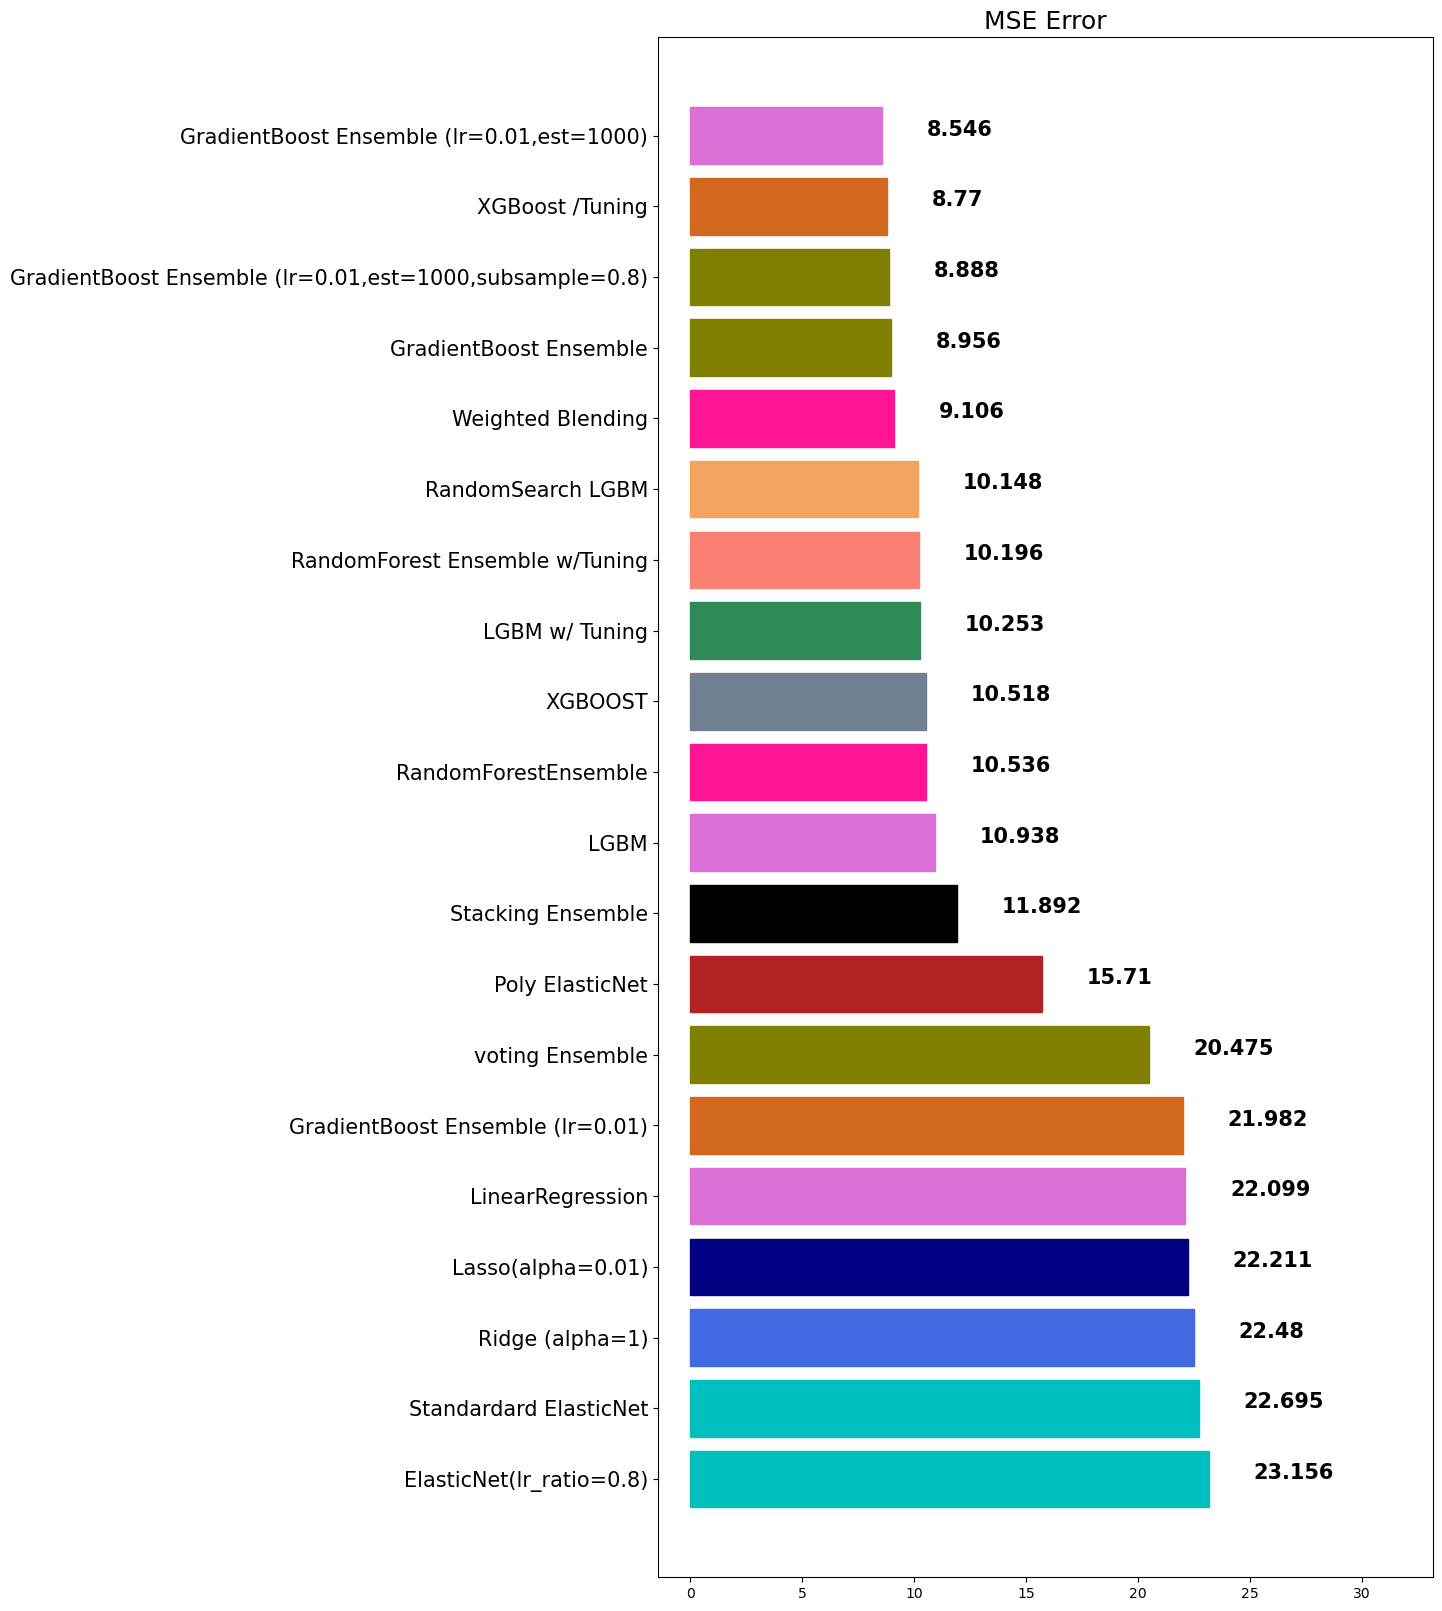

In [ ]:
# =========================================
# 1. RandomizedSearchCV로 찾은
#    "최적의 파라미터"를 직접 넣어
#    LightGBM 회귀 모델 생성
# =========================================

lgbm_best=LGBMRegressor( # 트리 개수
                         # 많을수록 성능은 좋아질 수 있지만 학습 시간 증가
                        n_estimators=2000,
                        # 학습에 사용할 데이터 비율
                        # 전체 데이터의 80%만 사용 → 과적합 방지
                        subsample=0.8,
                        # 트리 최대 깊이
                        # 너무 깊으면 과적합, 너무 얕으면 표현력 부족
                        max_depth=7,
                        # 학습률
                        # 매우 천천히 학습 → 안정적 성능
                        learning_rate=0.01,
                        # 각 트리에서 사용할 feature 비율
                        # 일부 feature만 사용 → 일반화 성능 향상
                        colsample_bytree=0.8)


# =========================================
# 2. 모델 학습 + 예측 (한 줄에 연결)
# =========================================
# 1️⃣ 학습
 # 2️⃣ 학습이 끝난 모델로 테스트 데이터 예측
lgbm_best_pred=lgbm_best.fit(x_train,y_train).predict(x_test)



# =========================================
# 3. 모델 성능 평가
# =========================================

# mse_eval 함수는
# 실제 값(y_test)과 예측 값(lgbm_best_pred)을 비교해서
# 평균제곱오차(MSE)를 계산하고 출력하는 사용자 정의 함수

mse_eval('RandomSearch LGBM',# 결과를 구분하기 위한 모델 이름
         lgbm_best_pred, # 모델이 예측한 값
         y_test)          # 실제 정답 값

## GridSearchCV
모든 매개 변수 값에 대하여 완전 탐색을 시도합니다.

따라서, 최적화할 parameter가 많다면, 시간이 매우 오래걸립니다.

In [ ]:
# ======================================================
# 1. 하이퍼파라미터 후보 목록 정의
# ======================================================
# GridSearchCV가 "모든 조합"을 만들어 시험할 값들
# 딕셔너리 형태로 작성
# key   : LGBMRegressor의 파라미터 이름
# value : 시험해볼 값들의 리스트

params={
    # 사용할 트리(결정나무) 개수
    # 많을수록 성능이 좋아질 가능성은 있지만
    # 학습 시간이 길어짐
    'n_estimators':[500,1000],
    # 학습률 (한 번에 얼마나 학습할지)
    # 크면 빠르지만 불안정
    # 작으면 느리지만 안정적
    'learning_rate':[0.1,0.05,0.01],
    # 트리의 최대 깊이
    # 깊을수록 복잡한 패턴 학습 가능
    # 너무 깊으면 과적합 위험
    'max_depth':[7,8],
    # 각 트리를 만들 때 사용할 feature(컬럼) 비율
    # 일부만 사용하면 과적합 방지 효과
    'colsample_bytree':[0.8,0.9],
    # 학습에 사용할 데이터 샘플 비율
    # 전체 데이터를 다 쓰지 않고 일부만 사용
    'subsample':[0.8,0.9],
}

In [ ]:
# ======================================================
# 2. GridSearchCV 불러오기
# ======================================================
# 모든 파라미터 조합을 하나도 빠짐없이
# 전부 시험해주는 하이퍼파라미터 탐색 도구
from sklearn.model_selection import GridSearchCV


# ======================================================
# 3. GridSearchCV 객체 생성
# ======================================================
# 위에서 만든 params의 모든 조합을
# 교차검증(cv)을 통해 평가
grid_search=GridSearchCV(# 튜닝할 모델
                         # LightGBM 회귀 모델
                        LGBMRegressor(),
                         # 시험할 하이퍼파라미터 후보 목록
                         params,
                          # 교차검증 횟수
                        # 데이터를 3등분해서
                        # 학습 / 검증을 3번 반복
                         cv=3,
                          # 사용할 CPU 코어 수
                          # -1 → 사용 가능한 모든 코어 사용 (속도 ↑)
                         n_jobs=-1,
                          # 평가 지표
                          # 평균제곱오차(MSE)는 작을수록 좋기 때문에
                          # sklearn 규칙에 맞게 음수(-)로 변환
                         scoring='neg_mean_squared_error')


# ======================================================
# 4. GridSearchCV 실행 (학습 시작)
# ======================================================
# 내부에서 자동으로 수행되는 과정:
# 1) params의 모든 조합 생성
# 2) 각 조합마다
#    - 3겹 교차검증 수행
#    - MSE 계산
# 3) 평균 성능을 기록
# 4) 가장 성능 좋은 조합 선택
grid_search.fit(x_train,y_train)



GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [7, 8], 'n_estimaroes': [500, 1000],
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [ ]:
# ======================================================
# 5. 최고 성능 점수 확인
# ======================================================
# 모든 조합 중
# 가장 성능이 좋았던 파라미터의
# 평균 MSE 점수 (음수값)
grid_search.best_score_

np.float64(-14.30602798830425)

In [ ]:
# ======================================================
# 6. 최고 성능 파라미터 조합 확인
# ======================================================
# GridSearchCV가 찾은
# "가장 잘 나온 설정값들"

grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimaroes': 500,
 'subsample': 0.8}

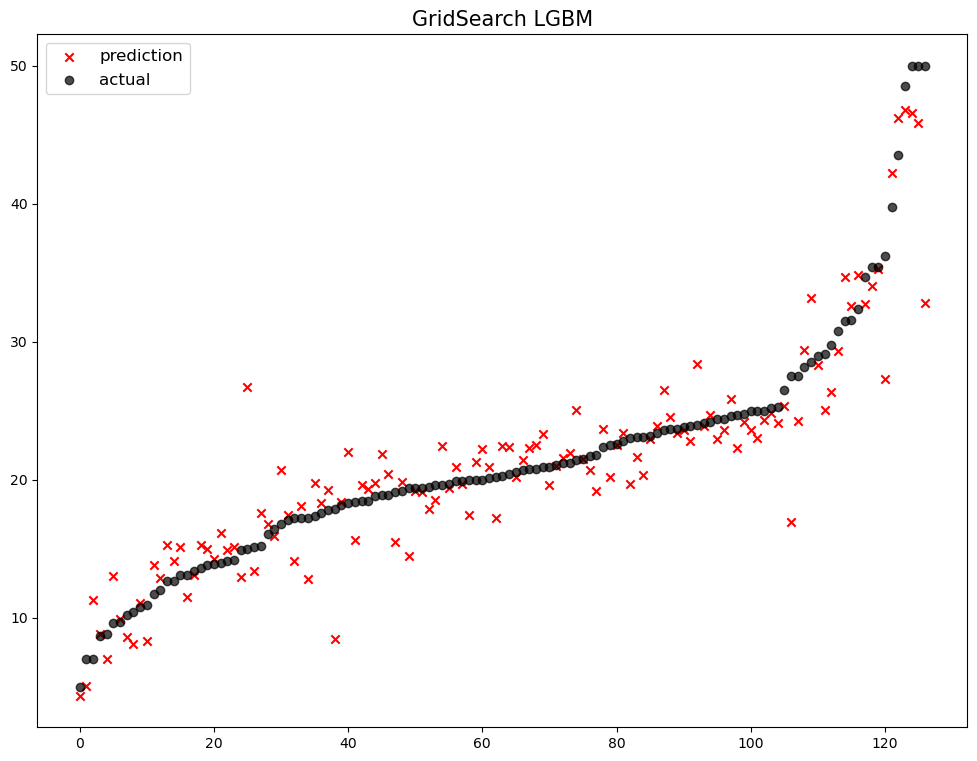

                                                model        mse
0                            ElasticNet(lr_ratio=0.8)  23.156236
1                              Standardard ElasticNet  22.694970
2                                     Ridge (alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                    GradientBoost Ensemble (lr=0.01)  21.982151
6                                     voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                                   Stacking Ensemble  11.892075
9                                                LGBM  10.937726
10                               RandomForestEnsemble  10.536140
11                                            XGBOOST  10.518450
12                                     LGBM w/ Tuning  10.252945
13                     RandomForest Ensemble w/Tuning  10.196040
14                       

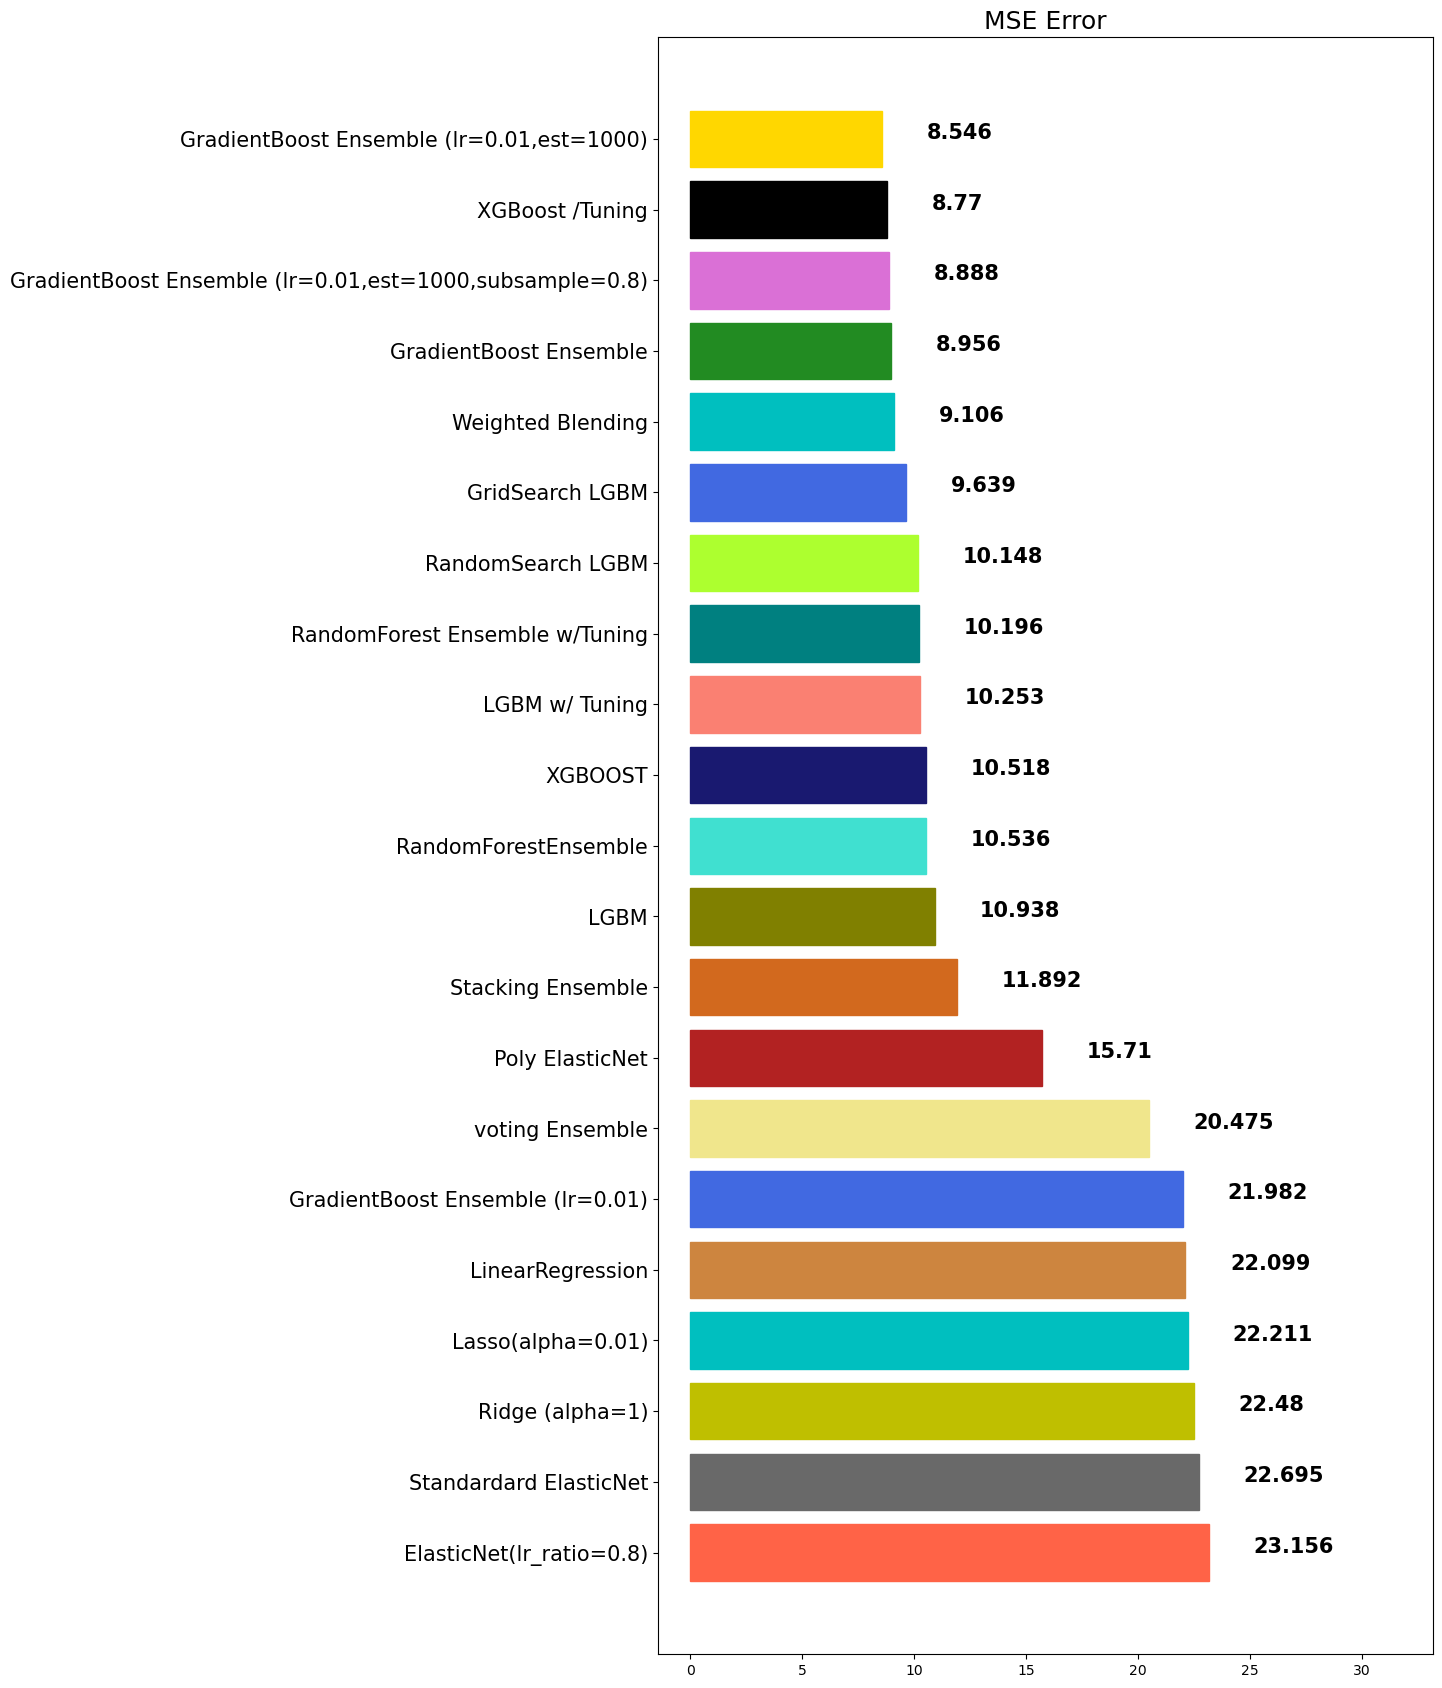

In [ ]:
# =====================================================
# 1. GridSearchCV로 찾은
#    "최적의 하이퍼파라미터"를 사용해서
#    LightGBM 회귀 모델을 직접 생성
# =====================================================

lgbm_best=LGBMRegressor(     
                        # 사용할 트리(결정나무) 개수
                        # GridSearchCV 결과로 선택된 값
                        # 많을수록 표현력은 좋아지지만 학습 시간 증가
                        n_estimators=500,
                        # 학습에 사용할 데이터 비율
                        # 전체 데이터의 80%만 사용
                        # 과적합을 줄이는 효과
                        subsample=0.8,
                        # 트리의 최대 깊이
                        # 너무 깊으면 과적합, 너무 얕으면 성능 부족
                        max_depth=7,
                        # 학습률
                        # 한 번에 얼마나 반영할지 결정
                        # 중간 정도로 안정성과 속도 균형
                        learning_rate=0.05,
                        # 각 트리를 만들 때 사용할 feature 비율
                        # 일부 feature만 사용해서 일반화 성능 향상
                        colsample_bytree=0.8)

# =====================================================
# 2. 모델 학습 + 예측 (체이닝 방식)
# =====================================================


    # 1️⃣ 학습 단계
    # x_train, y_train으로 모델을 학습
        
    # 2️⃣ 예측 단계
    # 학습이 끝난 모델로 테스트 데이터 예측
lgbm_best_pred=lgbm_best.fit(x_train,y_train).predict(x_test)


# =====================================================
# 3. 모델 성능 평가
# =====================================================

# mse_eval 함수는
# 실제 정답값(y_test)과
# 모델 예측값(lgbm_best_pred)을 비교해서
# 평균제곱오차(MSE)를 계산하고 출력하는 함수
mse_eval('GridSearch LGBM',# 결과를 구분하기 위한 모델 이름
         lgbm_best_pred, # 모델이 예측한 값
         y_test) # 실제 정답 값



---

## 결론부터 한 줄로 말하면

> **“작을 때만” =
> 파라미터 개수도 적고, 데이터도 작고, 조합 수도 적을 때만 GridSearchCV를 쓴다**

---

## 왜 “작을 때만” 이라는 말을 썼냐면

GridSearchCV는 **모든 경우를 전부 다 해보는 방식**이에요.

👉 그래서 **조합 수가 조금만 커져도 계산량이 폭발**합니다.

---

## 숫자로 보면 바로 이해돼요

### ✅ 지금 네 예제 (작은 경우)

```python
n_estimators: 2
learning_rate: 3
max_depth: 2
colsample_bytree: 2
subsample: 2
```

👉 전체 조합 수:

```
2 × 3 × 2 × 2 × 2 = 48가지
```

* 48번 학습
* cv=3 → 실제로는 **144번 모델 학습**

👉 이 정도는 **괜찮음**
➡️ 그래서 **“작을 때는 GridSearchCV 가능”**

---

## ❌ 조금만 커지면 바로 지옥됨

예를 들어:

```python
n_estimators: 6
learning_rate: 6
max_depth: 6
colsample_bytree: 6
subsample: 6
```

👉 조합 수:

```
6⁵ = 7,776가지
```

👉 cv=3이면?

```
7,776 × 3 = 23,328번 학습
```

⛔ 이건:

* 시간: 몇 시간~며칠
* 노트북: 팬 풀가동 🔥
* 실무: ❌❌❌

그래서 **“작을 때만”** 이라는 말을 쓰는 거예요.

---

## 그럼 “작다”의 기준은 뭐냐?

대략적인 감각 👇

### ✅ GridSearchCV 써도 되는 경우

* 파라미터 종류: **3~4개 이하**
* 각 파라미터 값: **2~3개**
* 전체 조합 수: **100개 이하**
* 데이터 크기: 작거나 중간

👉 **공부용 / 실험용 / 소규모 데이터**

---

### ❌ GridSearchCV 쓰면 안 되는 경우

* 파라미터 많음
* 값 범위 넓음
* 데이터 큼
* 모델 무거움 (XGBoost, LGBM)

👉 이때는 **무조건 RandomizedSearchCV**

---

## 그래서 표의 의미를 다시 풀면

| 항목 | GridSearchCV | RandomizedSearchCV |
| -- | ------------ | ------------------ |
| 실무 | ❌(작을 때만)     | ✅                  |

이 말의 진짜 뜻 👇

> **GridSearchCV는
> 실험 규모가 작을 때만 쓰고
> 실무나 큰 문제에서는 거의 안 쓴다**

---

## 비유 하나로 끝내자 🎯

### 🍽️ 음식 비유

* **GridSearchCV**
  👉 메뉴판에 있는 음식 **전부 다 시켜서 먹어봄**
  👉 메뉴 5개면 가능
  👉 메뉴 100개면 파산 💸

* **RandomizedSearchCV**
  👉 대표 메뉴 몇 개만 골라서 먹어봄
  👉 빠르고 현실적

---

## 한 문장으로 완전 정리 💯

> **“GridSearchCV는
> 경우의 수가 작을 때만 쓰는 방법이다”**

이제 이 표현 나오면
👉 **“아, 계산량 문제구나”** 하고 바로 이해하면 돼요 👍
